In [1]:
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates



pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)

%matplotlib inline
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Loading & Inspecting Data

In [2]:
# Loading the tumour data

data = pd.read_csv('simulacrum_v2.1.0/data/sim_av_tumour.csv') # read in the data

# Read the head rows
data.head(3)

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,MORPH_ICD10_O2,MORPH_ICDO3REV2011,BEHAVIOUR_ICD10_O2,BEHAVIOUR_ICDO3REV2011,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,STAGE_BEST_SYSTEM,LATERALITY,SCREENINGSTATUSFULL_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,QUINTILE_2019,DATE_FIRST_SURGERY,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CHRL_TOT_27_03,COMORBIDITIES_27_03,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED
0,10399610,1,10000001,2017-03-31,C44,C444,C44,C444,C444,C44,8070,8070.0,3,3,NaN,NaN,NaN,?,G3,84,L1201,NaN,9,NaN,NaN,NaN,NaN,4,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN
1,10694862,1,10000002,2016-01-14,C44,C449,C44,C449,C449,C44,8090,8090.0,3,3,NaN,NaN,NaN,?,GX,67,L1701,NaN,9,NaN,NaN,NaN,NaN,5 - least deprived,2016-01-14,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,11938715,2,10000003,2018-12-10,C44,C442,C44,C442,C442,C44,8070,8070.0,3,3,NaN,NaN,NaN,?,G2,79,L0801,UICC 8,R,NaN,NaN,NaN,NaN,3,2018-12-10,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check the shape

print(data.shape)

(1995570, 37)


# Filtering the sim_av_tumour data for Breast Cancer Patients Only

In [4]:
# Define the ICD codes corresponding to breast cancer diseases

breast_cancer = ['C500', 'C501', 'C502', 'C503', 'C504', 'C505', 'C506', 'C507', 'C508', 'C509']

# Filter the dataset to include only patients with the selected breast cancer disease
patients_with_breast_cancer = data[data['SITE_ICD10_O2'].isin(breast_cancer)]

# Display the resulting dataset
patients_with_breast_cancer.head(5)

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,MORPH_ICD10_O2,MORPH_ICDO3REV2011,BEHAVIOUR_ICD10_O2,BEHAVIOUR_ICDO3REV2011,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,STAGE_BEST_SYSTEM,LATERALITY,SCREENINGSTATUSFULL_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,QUINTILE_2019,DATE_FIRST_SURGERY,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CHRL_TOT_27_03,COMORBIDITIES_27_03,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED
503240,11340118,1,10300617,2019-11-02,C50,C504,C50,C504,C504,C50,8520,8520.0,3,3,2,0,1b,3A,G3,46,L0401,UICC 8,L,6021.0,P,P,N,2,2019-11-30,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
503242,11623395,1,10300637,2018-06-05,C50,C504,C50,C504,C504,C50,8500,8500.0,3,3,NaN,NaN,NaN,?,G1,87,L0301,UICC 7,L,NaN,P,NaN,N,4,NaN,Z,NaN,0.0,NaN,NaN,NaN,NaN,NaN
503243,10644390,1,10300641,2019-01-26,C50,C508,C50,C508,C508,C50,8140,8140.0,3,3,1c,0,0,1A,G2,87,L0901,UICC 8,9,NaN,NaN,NaN,NaN,1 - most deprived,NaN,Z,4.0,0.0,NaN,NaN,NaN,NaN,NaN
503245,10138135,1,10300713,2017-12-09,C50,C509,C50,C509,C509,C50,8500,8500.0,3,3,2,0,0,2A,G2,74,L1201,UICC 7,R,6021.0,U,NaN,N,5 - least deprived,2018-02-13,C,9.0,0.0,NaN,NaN,NaN,NaN,NaN
503247,11022873,1,10300729,2019-07-21,C50,C505,C50,C505,C505,C50,8500,8500.0,3,5,3,1,0,2B,G3,71,L0401,UICC 8,R,6035.0,NaN,NaN,P,3,2019-08-19,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check the shape of the patients with breast cancer

print(patients_with_breast_cancer.shape)

(187204, 37)


In [6]:
# Checking for missing values
missing_tumourid = patients_with_breast_cancer['TUMOURID'].isnull().sum()
missing_patientid = patients_with_breast_cancer['PATIENTID'].isnull().sum()

print(f"Number of missing items in 'TUMOURID': {missing_tumourid}")
print(f"Number of missing items in 'PATIENTID': {missing_patientid}")

Number of missing items in 'TUMOURID': 0
Number of missing items in 'PATIENTID': 0


In [7]:
# check for duplicates in the entire dataframe

print(data.duplicated().sum())

0


In [8]:
# Patients with breast_cancer is the filtered tumour dataset
sim_av_tumour_filtered = patients_with_breast_cancer

In [9]:
# Unique number of patients with breast cancer

total_unique_patientid = sim_av_tumour_filtered['PATIENTID'].nunique()

# Display the total number of unique PATIENTID
print(f'Total unique PATIENTID: {total_unique_patientid}')

Total unique PATIENTID: 181241


In [10]:
# Check for missing values in the data set

print(sim_av_tumour_filtered.isnull().sum())

TUMOURID                               0
GENDER                                 0
PATIENTID                              0
DIAGNOSISDATEBEST                      0
SITE_ICD10_O2_3CHAR                    0
SITE_ICD10_O2                          0
SITE_ICD10R4_O2_3CHAR_FROM2013         0
SITE_ICD10R4_O2_FROM2013               0
SITE_ICDO3REV2011                      0
SITE_ICDO3REV2011_3CHAR                0
MORPH_ICD10_O2                         0
MORPH_ICDO3REV2011                     0
BEHAVIOUR_ICD10_O2                     0
BEHAVIOUR_ICDO3REV2011                 0
T_BEST                             15822
N_BEST                             18166
M_BEST                             54278
STAGE_BEST                             1
GRADE                                  0
AGE                                    0
CREG_CODE                              0
STAGE_BEST_SYSTEM                  11447
LATERALITY                             0
SCREENINGSTATUSFULL_CODE           38965
ER_STATUS       

In [11]:
# Drop the columns not needed and read the first few rows of the dataframe

sim_av_tumour_filtered_2 = sim_av_tumour_filtered[[
    'TUMOURID', 'PATIENTID', 'DIAGNOSISDATEBEST', 'SITE_ICD10_O2', 'MORPH_ICD10_O2', 'BEHAVIOUR_ICD10_O2', 'STAGE_BEST', 'GRADE',
    'AGE'
]]

sim_av_tumour_filtered_2.head(3)

,TUMOURID,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
503240,11340118,10300617,2019-11-02,C504,8520,3,3A,G3,46
503242,11623395,10300637,2018-06-05,C504,8500,3,?,G1,87
503243,10644390,10300641,2019-01-26,C508,8140,3,1A,G2,87


## Understanding the content of the tumour table

1. sim_av_tumour_filtered

This table appears to contain detailed information about tumor characteristics, which is critical for 
understanding the nature and progression of breast cancer.

Essential Columns:

    TUMOURID: Unique identifier for each tumor.

    PATIENTID: Unique identifier for each patient.

    DIAGNOSISDATEBEST: Date of diagnosis, important for survival analysis.

    SITE_ICD10_O2: Site of the tumor, coded in various classification systems.

    MORPH_ICD10_O2: Morphology codes, indicating the type of cancer cells.

    BEHAVIOUR_ICD10_O2, BEHAVIOUR_ICDO3REV2011: Behavior of the tumor, such as benign or malignant.

    T_BEST, N_BEST, M_BEST, STAGE_BEST, STAGE_BEST_SYSTEM: Tumor staging information, critical for treatment planning and   
    prognosis.

    STAGE_BEST: Overall cancer stage

    GRADE: Grade of the tumor, indicating aggressiveness.

    AGE: Age at diagnosis, an important demographic variable.

Relevance of the tumour columns:
    
These columns provide comprehensive details about tumor characteristics, patient demographics, treatment intent, 
and tumor biology, all of which are essential for analyzing breast cancer patterns, outcomes, and treatment efficacy.

# Filtering the sim_av_gene data for Breast Cancer Patients Only

In [12]:
# Loading the data
sim_av_gene = pd.read_csv('simulacrum_v2.1.0/data/sim_av_gene.csv') # read in the data

# Read the head rows
sim_av_gene.head(3)

,GENEID,TUMOURID,PATIENTID,GENE_DESC,GENE,COUNT_TESTS,COUNT_RESULTS,COUNT_DATE,ALL_TESTSTATUSES,OVERALL_TS,NO_OF_AB_GATS,DNASEQ_GAT,METHYL_GAT,EXP_GAT,COPYNO_GAT,FUS_TRANS_GAT,ABNORMAL_GAT,NO_OF_SEQ_VARS,ALL_SEQ_VARS,SEQ_VAR,DATE_OVERALL_TS,BEST_DATE_SOURCE_OVERALL_TS,MIN_DATE,MAX_DATE,ALL_PRO_IMPS,NO_OF_PRO_IMPS,PRO_IMP,METHODS,LAB_NAME
0,10030620,10090743,10403207,CD274 (PD-L1),4842,1,2,1,"b:normal,b:normal",b:normal,0,n:not_applicable_null,n:not_applicable_null,b:normal_exp,n:not_applicable_null,n:not_applicable_null,NaN,0,NaN,NaN,2018-03-14,3)receiveddate,2018-03-14,2018-10-16,NaN,0,NaN,Immunochemistry,Birmingham (molecular lab)
1,10030623,10754688,10403230,PMS2,3394,1,1,1,b:normal,b:normal,0,n:not_applicable_null,n:not_applicable_null,b:normal_exp,n:not_applicable_null,n:not_applicable_null,NaN,0,NaN,NaN,2019-11-13,1)authoriseddate,2019-11-15,2019-12-03,NaN,0,NaN,Immunochemistry,Unknown
2,10030624,11495342,10403261,PMS2,3394,1,1,1,b:normal,b:normal,0,n:not_applicable_null,n:not_applicable_null,b:normal_exp,n:not_applicable_null,n:not_applicable_null,NaN,0,NaN,NaN,2018-08-02,1)authoriseddate,2018-08-02,NaN,NaN,0,NaN,Immunochemistry,Pathology lab


In [13]:
# Check the shape of the gene data
print(sim_av_gene.shape)

(255728, 29)


In [14]:
# Filter the sim_av_gene dataset to include only patients with breast cancer
sim_av_gene_filtered = sim_av_gene[sim_av_gene['PATIENTID'].isin(patients_with_breast_cancer['PATIENTID'])]

# Display the head rows of filtered dataset
sim_av_gene_filtered.head(3)

,GENEID,TUMOURID,PATIENTID,GENE_DESC,GENE,COUNT_TESTS,COUNT_RESULTS,COUNT_DATE,ALL_TESTSTATUSES,OVERALL_TS,NO_OF_AB_GATS,DNASEQ_GAT,METHYL_GAT,EXP_GAT,COPYNO_GAT,FUS_TRANS_GAT,ABNORMAL_GAT,NO_OF_SEQ_VARS,ALL_SEQ_VARS,SEQ_VAR,DATE_OVERALL_TS,BEST_DATE_SOURCE_OVERALL_TS,MIN_DATE,MAX_DATE,ALL_PRO_IMPS,NO_OF_PRO_IMPS,PRO_IMP,METHODS,LAB_NAME
986,10038958,11206350,10301209,ROS1,67,1,1,1,b:normal,b:normal,0,n:not_applicable_null,n:not_applicable_null,n:not_applicable_null,n:not_applicable_null,b:normal_fusion/trans,NaN,0,NaN,NaN,2019-05-14,NaN,NaN,NaN,NaN,0,NaN,Immunochemistry,Birmingham (molecular lab)
988,10038995,11699916,10302483,ROS1,67,1,1,1,NaN,g:unknown/null,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2019-10-07,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
989,10039003,10365559,10302734,ROS1,67,1,1,1,NaN,g:unknown/null,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2017-03-12,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [15]:
# Check the shape of the gene data
print(sim_av_gene_filtered.shape)

(6198, 29)


In [16]:
# check for duplicates in the sim_av_gene_filtered dataframe
print(sim_av_gene_filtered.duplicated().sum())

0


In [17]:
# Display the total number of unique PATIENTID
gene_unique_patientid = sim_av_gene_filtered['PATIENTID'].nunique()

print(f'Total unique PATIENTID: {gene_unique_patientid}')

Total unique PATIENTID: 4550


In [18]:
# Check for missing values in the data set

print(sim_av_gene_filtered.isnull().sum())

GENEID                            0
TUMOURID                          0
PATIENTID                         0
GENE_DESC                         0
GENE                              0
COUNT_TESTS                       0
COUNT_RESULTS                     0
COUNT_DATE                        0
ALL_TESTSTATUSES               2698
OVERALL_TS                        0
NO_OF_AB_GATS                     0
DNASEQ_GAT                     1889
METHYL_GAT                     1889
EXP_GAT                        1889
COPYNO_GAT                     1889
FUS_TRANS_GAT                  1889
ABNORMAL_GAT                   5550
NO_OF_SEQ_VARS                    0
ALL_SEQ_VARS                   6133
SEQ_VAR                        6133
DATE_OVERALL_TS                   6
BEST_DATE_SOURCE_OVERALL_TS    1901
MIN_DATE                       2277
MAX_DATE                       2043
ALL_PRO_IMPS                   6086
NO_OF_PRO_IMPS                    0
PRO_IMP                        6086
METHODS                     

In [19]:
# Drop the columns not needed and read the first few rows of the dataframe

sim_av_gene_filtered_2 = sim_av_gene_filtered[['GENEID', 'TUMOURID', 'PATIENTID', 'GENE_DESC', 'GENE', 'OVERALL_TS']]

sim_av_gene_filtered_2.head(3)

,GENEID,TUMOURID,PATIENTID,GENE_DESC,GENE,OVERALL_TS
986,10038958,11206350,10301209,ROS1,67,b:normal
988,10038995,11699916,10302483,ROS1,67,g:unknown/null
989,10039003,10365559,10302734,ROS1,67,g:unknown/null


## Understanding the content of the tumour table

2. The sim_av_gene_filtered

This table contains genetic information, which can provide insights into genetic predispositions and mutations 
associated with breast cancer.

Essential Columns:

    GENEID: Unique identifier for each gene test.
    TUMOURID: Links to the specific tumor.
    PATIENTID: Links to the specific patient.
    GENE_DESC, GENE: Description and name of the gene tested.
    ALL_TESTSTATUSES, OVERALL_TS: Overall test status, indicating whether the gene test showed normal or abnormal results.
    SEQ_VAR: Specific sequence variations detected.
    ABNORMAL_GAT: Abnormal genetic alterations.
    ALL_SEQ_VARS, SEQ_VAR: Sequence variations; relevant for mutation analysis.
    METHODS: Methods used for genetic testing.

Relevance:
    
Genetic data is crucial for understanding mutations that may drive cancer development, influence prognosis, 
and determine the suitability of targeted therapies.

# Filtering the sim_av_patient data for Breast Cancer Patients Only

In [20]:
# Loading the data

sim_av_patient = pd.read_csv('simulacrum_v2.1.0/data/sim_av_patient.csv') # read in the data

# Read the head row
sim_av_patient.head(3)

,PATIENTID,GENDER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
0,10000001,1,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101610884
1,10000002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101343783
2,10000003,2,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101560124


In [21]:
# Let's check the shape of the data
print(sim_av_patient.shape)

(1871605, 12)


In [22]:
# Filter the sim_av_patient dataset to include only patients with breast cancer
sim_av_patient_filtered = sim_av_patient[sim_av_patient['PATIENTID'].isin(patients_with_breast_cancer['PATIENTID'])]

# Display the filtered dataset
sim_av_patient_filtered.head(3)

,PATIENTID,GENDER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
273710,10273711,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100906653
275817,10275818,1,A,K566,NaN,NaN,"G309,C449",C56,4,D,2021-10-20,100891855
276181,10276182,1,A,J189,NaN,NaN,I259,F019,1,D,2020-07-18,100867002


In [23]:
# Read the shape of the filtered patient data
print(sim_av_patient_filtered.shape)

(181241, 12)


In [24]:
# check for duplicates in the entire dataframe

print(sim_av_patient_filtered.duplicated().sum())

0


In [25]:
# Display the total number of unique PATIENTID
patient_unique_patientid = sim_av_patient_filtered['PATIENTID'].nunique()

print(f'Total unique PATIENTID: {patient_unique_patientid}')

Total unique PATIENTID: 181241


In [26]:
# Drop the columns not needed and read the first few rows of the dataframe

sim_av_patient_filtered_2 = sim_av_patient_filtered[['PATIENTID', 'GENDER', 'ETHNICITY', 'DEATHCAUSECODE_UNDERLYING', 'VITALSTATUS', 'VITALSTATUSDATE']]

sim_av_patient_filtered_2.head(3)

,PATIENTID,GENDER,ETHNICITY,DEATHCAUSECODE_UNDERLYING,VITALSTATUS,VITALSTATUSDATE
273710,10273711,1,NaN,NaN,A,2022-07-05
275817,10275818,1,A,C56,D,2021-10-20
276181,10276182,1,A,F019,D,2020-07-18


In [27]:
# Check for missing values in the data set

print(sim_av_patient_filtered.isnull().sum())

PATIENTID                         0
GENDER                            0
ETHNICITY                      2595
DEATHCAUSECODE_1A            149252
DEATHCAUSECODE_1B            172959
DEATHCAUSECODE_1C            180765
DEATHCAUSECODE_2             165056
DEATHCAUSECODE_UNDERLYING    149252
DEATHLOCATIONCODE            149257
VITALSTATUS                       0
VITALSTATUSDATE                  31
LINKNUMBER                        0
dtype: int64


## Understanding the content of the patient table

3. The sim_av_patient_filtered

This table provides demographic and vital status information, which is necessary for understanding patient 
populations and survival analysis.

Essential Columns:

    PATIENTID: Unique identifier for each patient.
    GENDER: Gender of the patient, important for demographic analysis.
    ETHNICITY: Ethnicity, relevant for understanding disparities in cancer incidence and outcomes.
    DEATHCAUSECODE_1A, DEATHCAUSECODE_UNDERLYING: Cause of death, relevant for mortality analysis.
    VITALSTATUS: Vital status of the patient, indicating if they are alive or deceased.
    VITALSTATUSDATE: Date of the last known vital status.

Relevance:
    
These columns provide demographic context, survival status, and cause of death information, all of which are 
essential for survival analysis and understanding population-level trends.

# Filtering the sim_rtds_episode data for Breast Cancer Patients Only

In [28]:
# Loading the data
sim_rtds_episode = pd.read_csv('simulacrum_v2.1.0/data/sim_rtds_episode.csv') # read in the data

# Read the head rows
sim_rtds_episode.head(3)

,PATIENTID,RADIOTHERAPYEPISODEID,ATTENDID,APPTDATE,LINKCODE,DECISIONTOTREATDATE,EARLIESTCLINAPPROPDATE,RADIOTHERAPYPRIORITY,RADIOTHERAPYINTENT
0,10000008,1181234,10000001.20180811,2018-08-11,LKY,2018-07-28,2018-07-28,R,2.0
1,10000008,1181234,10000001.20180812,2018-08-12,LKY,2018-07-28,2018-07-28,R,2.0
2,10000008,1181234,10000001.20180813,2018-08-13,LKY,2018-07-28,2018-07-28,R,2.0


In [30]:
# Check the shape
print(sim_rtds_episode.shape)

(5843642, 9)


In [31]:
# Filter the sim_rtds_episode dataset to include only patients with breast cancer
sim_rtds_episode_filtered = sim_rtds_episode[sim_rtds_episode['PATIENTID'].isin(patients_with_breast_cancer['PATIENTID'])]

# Display the filtered dataset
sim_rtds_episode_filtered.head(3)

,PATIENTID,RADIOTHERAPYEPISODEID,ATTENDID,APPTDATE,LINKCODE,DECISIONTOTREATDATE,EARLIESTCLINAPPROPDATE,RADIOTHERAPYPRIORITY,RADIOTHERAPYINTENT
240530,10285735,1146506,10021739.20160731,2016-07-31,LBD,NaN,2016-07-06,R,2.0
240531,10285735,1146506,10021739.20160801,2016-08-01,LBD,NaN,2016-07-06,R,2.0
240532,10285735,1146506,10021739.20160802,2016-08-02,LBD,NaN,2016-07-06,R,2.0


In [32]:
# Check the shape of the filtered data
print(sim_rtds_episode_filtered.shape)

(2013029, 9)


In [33]:
# check for duplicates in the entire dataframe

print(sim_rtds_episode_filtered.duplicated().sum())

0


In [34]:
# Display the total number of unique PATIENTID
episode_unique_patientid = sim_rtds_episode_filtered['PATIENTID'].nunique()

print(f'Total unique PATIENTID: {episode_unique_patientid}')

Total unique PATIENTID: 107983


In [35]:
# Drop the columns not needed and read the first few rows of the dataframe

sim_rtds_episode_filtered_2 = sim_rtds_episode_filtered[['PATIENTID', 'RADIOTHERAPYEPISODEID', 'ATTENDID', 'APPTDATE', 'LINKCODE', 'DECISIONTOTREATDATE', 'RADIOTHERAPYINTENT' ]]

sim_rtds_episode_filtered_2.head(3)

,PATIENTID,RADIOTHERAPYEPISODEID,ATTENDID,APPTDATE,LINKCODE,DECISIONTOTREATDATE,RADIOTHERAPYINTENT
240530,10285735,1146506,10021739.20160731,2016-07-31,LBD,NaN,2.0
240531,10285735,1146506,10021739.20160801,2016-08-01,LBD,NaN,2.0
240532,10285735,1146506,10021739.20160802,2016-08-02,LBD,NaN,2.0


In [36]:
# Check for missing values in the data set

print(sim_rtds_episode_filtered.isnull().sum())

PATIENTID                      0
RADIOTHERAPYEPISODEID          0
ATTENDID                       0
APPTDATE                     240
LINKCODE                       0
DECISIONTOTREATDATE        30919
EARLIESTCLINAPPROPDATE    169506
RADIOTHERAPYPRIORITY      155022
RADIOTHERAPYINTENT          5678
dtype: int64


## Understanding the content of the episode table

4. The sim_rtds_episode_filtered

This table  provides details on radiotherapy episodes, which are essential for tracking treatment courses.

Essential Columns:

    PATIENTID: Unique identifier for each patient.
    RADIOTHERAPYEPISODEID: Unique identifier for each radiotherapy episode.
    DECISIONTOTREATDATE, APPTDATE: Dates related to the treatment decision and appointments.
    RADIOTHERAPYPRIORITY, RADIOTHERAPYINTENT: Priority and intent of the radiotherapy.

Relevance:
These columns help in understanding the sequence and priority of radiotherapy treatments, which is important for 
analyzing treatment strategies and outcomes.

# Filtering the sim_rtds_combined data for Breast Cancer Patients Only

Due to the large size of the combined table we will load and filter it with PostgreSQL

--First put the 'patients_with_breast_cancer' into a csv to be used in PostgreSQL

--Save the dataframe to a CSV file
patients_with_breast_cancer.to_csv('patients_with_breast_cancer.csv', index=False)

-- Step 1: Create the Table on PostgreSQL
    
CREATE TABLE patients_with_breast_cancer (
    TUMOURID VARCHAR(20),
    GENDER VARCHAR(20),
    PATIENTID VARCHAR(20),
    DIAGNOSISDATEBEST VARCHAR(20),
    SITE_ICD10_O2_3CHAR VARCHAR(20),
    SITE_ICD10_O2 VARCHAR(20),
    SITE_ICD10R4_O2_3CHAR_FROM2013 VARCHAR(20),
    SITE_ICD10R4_O2_FROM2013 VARCHAR(20),
    SITE_ICDO3REV2011 VARCHAR(20),
    SITE_ICDO3REV2011_3CHAR VARCHAR(20),
    MORPH_ICD10_O2 VARCHAR(20),
    MORPH_ICDO3REV2011 VARCHAR(20),
    BEHAVIOUR_ICD10_O2 VARCHAR(20),
    BEHAVIOUR_ICDO3REV2011 VARCHAR(20),
    T_BEST VARCHAR(20),
    N_BEST VARCHAR(20),
    M_BEST VARCHAR(50),
    STAGE_BEST VARCHAR(20),
    GRADE VARCHAR(20),
    AGE VARCHAR(20),
    CREG_CODE VARCHAR(20),
    STAGE_BEST_SYSTEM VARCHAR(20),
    LATERALITY VARCHAR(20),
    SCREENINGSTATUSFULL_CODE VARCHAR(20),
    ER_STATUS VARCHAR(20),
    PR_STATUS VARCHAR(20),
    HER2_STATUS VARCHAR(20),
    QUINTILE_2019 VARCHAR(20),
    DATE_FIRST_SURGERY VARCHAR(20),
    CANCERCAREPLANINTENT VARCHAR(20),
    PERFORMANCESTATUS VARCHAR(20),
    CHRL_TOT_27_03 VARCHAR(20),
    COMORBIDITIES_27_03 VARCHAR(20),
    GLEASON_PRIMARY VARCHAR(20),
    GLEASON_SECONDARY VARCHAR(20),
    GLEASON_TERTIARY VARCHAR(20),
    GLEASON_COMBINED VARCHAR(20),
);


-- Create a new table with filtered data
CREATE TABLE sim_rtds_combined_filtered AS
SELECT a.*
FROM sim_rtds_combined a
JOIN patients_with_breast_cancer b
ON a.PATIENTID = b.PATIENTID;

-- Display the first 3 rows of the filtered dataset
SELECT *
FROM sim_rtds_combined_filtered
LIMIT 3;

In [37]:
# Transfer the sim_rtds_combined_filtered from PostgreSQL & Load the data

sim_rtds_combined_filtered = pd.read_csv('simulacrum_v2.1.0/data/sim_rtds_combined_filtered.csv') # read in the data

# Display the filtered dataset
sim_rtds_combined_filtered.head(3)

,patientid,prescriptionid,rttreatmentmodality,radiotherapypriority,radiotherapyintent,rtprescribeddose,rtprescribedfractions,rtactualdose,rtactualfractions,rttreatmentregion,rttreatmentanatomicalsite,decisiontotreatdate,earliestclinappropdate,radiotherapyepisodeid,linkcode,radioisotope,radiotherapybeamtype,radiotherapybeamenergy,timeofexposure,apptdate,attendid
0,20115896,20105117,5.0,R,1.0,30.0,10.0,27.0,10.0,M,Z619,2018-10-23,2018-10-22,1320017,LCH,NaN,T1,6.0,15:47,2018-10-23,20105117.20181
1,20115896,20105117,5.0,R,1.0,30.0,10.0,27.0,10.0,M,Z619,2018-10-23,2018-10-22,1320017,LCH,NaN,T1,6.0,15:48,2018-10-23,20105117.20181
2,20116066,20105139,5.0,R,1.0,8.0,1.0,8.0,1.0,M,Z019,2020-05-16,2020-05-19,1639114,LCF,NaN,T1,6.0,15:40,2020-05-30,20105139.202005


In [38]:
# Check the shape of the filtered data
print(sim_rtds_combined_filtered.shape)

(5723243, 21)


In [39]:
# Convert columns to upper case

sim_rtds_combined_filtered.columns = sim_rtds_combined_filtered.columns.str.upper()

# Display the filtered dataset
sim_rtds_combined_filtered.head(3)

,PATIENTID,PRESCRIPTIONID,RTTREATMENTMODALITY,RADIOTHERAPYPRIORITY,RADIOTHERAPYINTENT,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RTTREATMENTREGION,RTTREATMENTANATOMICALSITE,DECISIONTOTREATDATE,EARLIESTCLINAPPROPDATE,RADIOTHERAPYEPISODEID,LINKCODE,RADIOISOTOPE,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,TIMEOFEXPOSURE,APPTDATE,ATTENDID
0,20115896,20105117,5.0,R,1.0,30.0,10.0,27.0,10.0,M,Z619,2018-10-23,2018-10-22,1320017,LCH,NaN,T1,6.0,15:47,2018-10-23,20105117.20181
1,20115896,20105117,5.0,R,1.0,30.0,10.0,27.0,10.0,M,Z619,2018-10-23,2018-10-22,1320017,LCH,NaN,T1,6.0,15:48,2018-10-23,20105117.20181
2,20116066,20105139,5.0,R,1.0,8.0,1.0,8.0,1.0,M,Z019,2020-05-16,2020-05-19,1639114,LCF,NaN,T1,6.0,15:40,2020-05-30,20105139.202005


In [40]:
# check for duplicates in the entire dataframe

print(sim_rtds_combined_filtered.duplicated().sum())

286379


In [41]:
# Remove duplicates from the 'sim_rtds_combined_filtered' dataframe
sim_rtds_combined_filtered = sim_rtds_combined_filtered.drop_duplicates()

In [42]:
# Re-confirm the shape
print(sim_rtds_combined_filtered.shape)

(5436864, 21)


In [43]:
# Display the total number of unique PATIENTID
combined_unique_patientid = sim_rtds_combined_filtered['PATIENTID'].nunique()

print(f'Total unique PATIENTID: {combined_unique_patientid}')

Total unique PATIENTID: 107983


In [44]:
# Drop the columns not needed and read the first few rows of the dataframe

sim_rtds_combined_filtered_2 = sim_rtds_combined_filtered[[
    'PATIENTID', 'PRESCRIPTIONID', 'RTTREATMENTMODALITY', 'RADIOTHERAPYINTENT', 'RTPRESCRIBEDDOSE', 'RTPRESCRIBEDFRACTIONS', 'RTACTUALDOSE',
    'RTACTUALFRACTIONS', 'RADIOTHERAPYEPISODEID', 'LINKCODE', 'RADIOTHERAPYBEAMTYPE', 'RADIOTHERAPYBEAMENERGY', 'APPTDATE'
    
]]

sim_rtds_combined_filtered_2.head(3)

,PATIENTID,PRESCRIPTIONID,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYEPISODEID,LINKCODE,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,APPTDATE
0,20115896,20105117,5.0,1.0,30.0,10.0,27.0,10.0,1320017,LCH,T1,6.0,2018-10-23
1,20115896,20105117,5.0,1.0,30.0,10.0,27.0,10.0,1320017,LCH,T1,6.0,2018-10-23
2,20116066,20105139,5.0,1.0,8.0,1.0,8.0,1.0,1639114,LCF,T1,6.0,2020-05-30


In [45]:
# Remove duplicates from the 'sim_rtds_combined_filtered' dataframe
sim_rtds_combined_filtered_2 = sim_rtds_combined_filtered_2.drop_duplicates()

In [46]:
# Check for missing values in the data set

print(sim_rtds_combined_filtered_2.isnull().sum())

PATIENTID                     0
PRESCRIPTIONID                0
RTTREATMENTMODALITY       20230
RADIOTHERAPYINTENT         8161
RTPRESCRIBEDDOSE          20091
RTPRESCRIBEDFRACTIONS     23035
RTACTUALDOSE              67912
RTACTUALFRACTIONS         28958
RADIOTHERAPYEPISODEID         0
LINKCODE                      0
RADIOTHERAPYBEAMTYPE       1371
RADIOTHERAPYBEAMENERGY      569
APPTDATE                    679
dtype: int64


## Understanding the content of the combined table

5. The sim_rtds_combined_filtered

This table contains details about radiotherapy treatments, which are key to analyzing treatment patterns 
and outcomes.

Essential Columns:

    PATIENTID: Unique identifier for each patient.
    PRESCRIPTIONID: Unique identifier for each radiotherapy prescription.
    RTTREATMENTMODALITY: Type of radiotherapy treatment.
    RADIOTHERAPYPRIORITY: Priority of the radiotherapy.
    RADIOTHERAPYINTENT: Intent of the radiotherapy (curative, palliative, etc.).
    RTPRESCRIBEDDOSE, RTPRESCRIBEDFRACTIONS: Prescribed dose and number of fractions.
    RTACTUALDOSE, RTACTUALFRACTIONS: Actual dose delivered and number of fractions.
    DECISIONTOTREATDATE: Decision date to start treatment.
    APPTDATE: Appointment date for radiotherapy.

Relevance:
These columns provide insights into the types of radiotherapy administered, dosages, and adherence to 
prescribed treatments, all of which are critical for treatment outcome analysis.

# Filtering the sim_rtds_exposure data for Breast Cancer Patients Only

In [47]:
# Loading the data

sim_rtds_exposure = pd.read_csv('simulacrum_v2.1.0/data/sim_rtds_exposure.csv') # read in the data

# Read the head rows
sim_rtds_exposure.head(3)

,PRESCRIPTIONID,RADIOISOTOPE,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,TIMEOFEXPOSURE,APPTDATE,ATTENDID,PATIENTID,RADIOTHERAPYEPISODEID,LINKCODE
0,10000001,NaN,T1,6.0,10:09,2018-08-11,10000001.20180811,10000008,1181234,LKY
1,10000001,NaN,T1,6.0,10:10,2018-08-11,10000001.20180811,10000008,1181234,LKY
2,10000002,NaN,T1,10.0,11:13,2015-05-18,10000002.20150518,10000011,1911727,LFW


In [48]:
# Check the shape

print(sim_rtds_exposure.shape)

(13201531, 10)


In [49]:
# Filter the sim_rtds_episode dataset to include only patients with breast cancer
sim_rtds_exposure_filtered = sim_rtds_exposure[sim_rtds_exposure['PATIENTID'].isin(patients_with_breast_cancer['PATIENTID'])]

# Display the filtered dataset
sim_rtds_exposure_filtered.head(3)

,PRESCRIPTIONID,RADIOISOTOPE,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,TIMEOFEXPOSURE,APPTDATE,ATTENDID,PATIENTID,RADIOTHERAPYEPISODEID,LINKCODE
33674,10021739,NaN,T1,6.0,10:11,2016-07-31,10021739.20160731,10285735,1146506,LBD
33675,10021739,NaN,T1,6.0,10:12,2016-07-31,10021739.20160731,10285735,1146506,LBD
34412,10022205,NaN,T1,6.0,11:40,2018-12-22,10022205.20181222,10291706,1232245,LHB


In [50]:
# Check the shape of the data
sim_rtds_exposure_filtered.shape

(5499695, 10)

In [51]:
# check for duplicates in the entire dataframe

print(sim_rtds_exposure_filtered.duplicated().sum())

62835


In [52]:
# Remove duplicates from the 'sim_rtds_exposure_filtered' dataframe
sim_rtds_exposure_filtered = sim_rtds_exposure_filtered.drop_duplicates()

In [53]:
# Check the new shape
sim_rtds_exposure_filtered.shape

(5436860, 10)

In [54]:
exposure_unique_patientid = sim_rtds_exposure_filtered['PATIENTID'].nunique()

# Display the total number of unique PATIENTID
print(f'Total unique PATIENTID: {exposure_unique_patientid}')

Total unique PATIENTID: 107983


In [55]:
# Drop the columns not needed and read the first few rows of the dataframe

sim_rtds_exposure_filtered_2 = sim_rtds_exposure_filtered[[
    'PRESCRIPTIONID', 'RADIOTHERAPYBEAMTYPE', 'RADIOTHERAPYBEAMENERGY', 'TIMEOFEXPOSURE', 'APPTDATE', 'ATTENDID', 
    'PATIENTID', 'RADIOTHERAPYEPISODEID', 'LINKCODE'
]]

sim_rtds_exposure_filtered_2.head(3)

,PRESCRIPTIONID,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,TIMEOFEXPOSURE,APPTDATE,ATTENDID,PATIENTID,RADIOTHERAPYEPISODEID,LINKCODE
33674,10021739,T1,6.0,10:11,2016-07-31,10021739.20160731,10285735,1146506,LBD
33675,10021739,T1,6.0,10:12,2016-07-31,10021739.20160731,10285735,1146506,LBD
34412,10022205,T1,6.0,11:40,2018-12-22,10022205.20181222,10291706,1232245,LHB


In [56]:
# Check for missing values in the data set

print(sim_rtds_exposure_filtered.isnull().sum())

PRESCRIPTIONID                  0
RADIOISOTOPE              5436515
RADIOTHERAPYBEAMTYPE         1382
RADIOTHERAPYBEAMENERGY        570
TIMEOFEXPOSURE                  0
APPTDATE                     6263
ATTENDID                        0
PATIENTID                       0
RADIOTHERAPYEPISODEID           0
LINKCODE                        0
dtype: int64


## Understanding the content of the exposure table

6. sim_rtds_exposure_filtered
This table contains exposure details during radiotherapy sessions.

Essential Columns:

    PRESCRIPTIONID: Identifies the prescription.
    PATIENTID: Identifies the patient.
    RADIOTHERAPYBEAMTYPE: Type of radiotherapy beam.
    RADIOTHERAPYBEAMENERGY: Energy of the radiotherapy beam.
    TIMEOFEXPOSURE: Time of exposure to radiotherapy.
    APPTDATE: Date of the appointment.

Relevance:
Exposure details are crucial for understanding the delivery and timing of radiotherapy sessions, 
which can influence treatment effectiveness and side effects.

# Filtering the sim_rtds_prescription data for Breast Cancer Patients Only

In [57]:
# Loading the data
sim_rtds_prescription = pd.read_csv('simulacrum_v2.1.0/data/sim_rtds_prescription.csv') # read in the data

# Read the head data
sim_rtds_prescription.head(3)

,PATIENTID,PRESCRIPTIONID,RTTREATMENTMODALITY,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RTTREATMENTREGION,RTTREATMENTANATOMICALSITE,RADIOTHERAPYEPISODEID,LINKCODE,ATTENDID,APPTDATE
0,10000008,10000001,5.0,35.0,5.0,35.0,5.0,A,Z501,1181234,LKY,10000001.20180811,2018-08-11
1,10000008,10000001,5.0,35.0,5.0,35.0,5.0,A,Z501,1181234,LKY,10000001.20180812,2018-08-12
2,10000008,10000001,5.0,35.0,5.0,35.0,5.0,A,Z501,1181234,LKY,10000001.20180813,2018-08-13


In [58]:
# Check the shape
print(sim_rtds_prescription.shape)

(5843642, 13)


In [59]:
# Filter the sim_rtds_prescription dataset to include only patients with breast cancer
sim_rtds_prescription_filtered = sim_rtds_prescription[sim_rtds_prescription['PATIENTID'].isin(patients_with_breast_cancer['PATIENTID'])]

# Display the filtered dataset
sim_rtds_prescription_filtered.head(3)

,PATIENTID,PRESCRIPTIONID,RTTREATMENTMODALITY,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RTTREATMENTREGION,RTTREATMENTANATOMICALSITE,RADIOTHERAPYEPISODEID,LINKCODE,ATTENDID,APPTDATE
240530,10285735,10021739,5.0,55.0,20.0,55.0,20.0,P,NaN,1146506,LBD,10021739.20160731,2016-07-31
240531,10285735,10021739,5.0,55.0,20.0,55.0,20.0,P,NaN,1146506,LBD,10021739.20160801,2016-08-01
240532,10285735,10021739,5.0,55.0,20.0,55.0,20.0,P,NaN,1146506,LBD,10021739.20160802,2016-08-02


In [60]:
# Display the filtered dataset
sim_rtds_prescription_filtered.shape

(2013029, 13)

In [61]:
# check for duplicates in the entire dataframe

print(sim_rtds_prescription_filtered.duplicated().sum())

0


In [62]:
prescription_unique_patientid = sim_rtds_prescription_filtered['PATIENTID'].nunique()

# Display the total number of unique PATIENTID
print(f'Total unique PATIENTID: {prescription_unique_patientid}')

Total unique PATIENTID: 107983


In [63]:
# Drop the columns not needed and read the first few rows of the dataframe

sim_rtds_prescription_filtered_2 = sim_rtds_prescription_filtered[[
    'PATIENTID', 'PRESCRIPTIONID', 'RTTREATMENTMODALITY', 'RTPRESCRIBEDDOSE', 'RTPRESCRIBEDFRACTIONS', 'RTACTUALDOSE', 'RTACTUALFRACTIONS',
    'RADIOTHERAPYEPISODEID', 'LINKCODE', 'ATTENDID', 'APPTDATE'
]]

sim_rtds_prescription_filtered_2.head(3)

,PATIENTID,PRESCRIPTIONID,RTTREATMENTMODALITY,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYEPISODEID,LINKCODE,ATTENDID,APPTDATE
240530,10285735,10021739,5.0,55.0,20.0,55.0,20.0,1146506,LBD,10021739.20160731,2016-07-31
240531,10285735,10021739,5.0,55.0,20.0,55.0,20.0,1146506,LBD,10021739.20160801,2016-08-01
240532,10285735,10021739,5.0,55.0,20.0,55.0,20.0,1146506,LBD,10021739.20160802,2016-08-02


In [64]:
# Check for missing values in the data set

print(sim_rtds_prescription_filtered.isnull().sum())

PATIENTID                          0
PRESCRIPTIONID                     0
RTTREATMENTMODALITY            14187
RTPRESCRIBEDDOSE               14064
RTPRESCRIBEDFRACTIONS          16160
RTACTUALDOSE                   47548
RTACTUALFRACTIONS              20306
RTTREATMENTREGION              75264
RTTREATMENTANATOMICALSITE    1580195
RADIOTHERAPYEPISODEID              0
LINKCODE                           0
ATTENDID                           0
APPTDATE                         240
dtype: int64


## Understanding the content of the prescription table

7. sim_rtds_prescription_filtered

The sim_rtds_prescription table provides details on radiotherapy prescriptions, which are important for
analyzing prescribed treatments.

Essential Columns:

    PATIENTID: Identifies the patient.
    PRESCRIPTIONID: Identifies the prescription.
    RTTREATMENTMODALITY: Type of radiotherapy treatment.
    RTPRESCRIBEDDOSE, RTPRESCRIBEDFRACTIONS: Prescribed radiotherapy dose and fractions.
    RTACTUALDOSE, RTACTUALFRACTIONS: Actual radiotherapy dose and fractions received.
    APPTDATE: Appointment date for radiotherapy.

Relevance:
    
These columns provide comprehensive details about the prescribed and delivered radiotherapy treatments, 
which are essential for treatment adherence and outcome analysis.

# Filtering the sim_sact_regimen data for Breast Cancer Patients Only

In [65]:
# Loading the data

sim_sact_regimen = pd.read_csv('simulacrum_v2.1.0/data/sim_sact_regimen.csv') # read in the data

sim_sact_regimen.head(3)

,ENCORE_PATIENT_ID,MERGED_REGIMEN_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,MAPPED_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP,LINK_NUMBER
0,10403208,10030621,0.0,NaN,P,2020-04-28,2020-04-28,Hydroxycarbamide,02,N,HYDROXYCARBAMIDE,100798414
1,10403217,10030622,NaN,60.5,A,2022-02-04,2022-02-08,Enzalutamide,N,N,ENZALUTAMIDE,100771105
2,10403309,10030627,0.0,0.0,03,2021-12-29,2022-01-13,Enzalutamide,02,N,ENZALUTAMIDE,101097221


In [66]:
# Check the shape
print(sim_sact_regimen.shape)

(781389, 12)


In [67]:
# Filter the sim_rtds_episode dataset to include only patients with breast cancer
sim_sact_regimen_filtered = sim_sact_regimen[sim_sact_regimen['ENCORE_PATIENT_ID'].isin(patients_with_breast_cancer['PATIENTID'])]

# Display the filtered dataset
sim_sact_regimen_filtered.head(3)

,ENCORE_PATIENT_ID,MERGED_REGIMEN_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,MAPPED_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP,LINK_NUMBER
5945,10282626,10038661,1.60,NaN,C,NaN,2017-09-18,NaN,NaN,NaN,CISPLATIN + GEMCITABINE,101568052
6056,10291762,10038800,1.53,46.95,C,NaN,2020-03-08,NaN,NaN,NaN,CAPECITABINE + MITOMYCIN,101085235
6066,10292545,10038811,NaN,72.20,03,NaN,2017-12-09,NaN,NaN,N,IMATINIB,101712044


In [68]:
# Rename the column 'ENCORE_PATIENT_ID' to 'PATIENTID' in the 'sim_sact_regimen_filtered' dataframe
sim_sact_regimen_filtered = sim_sact_regimen_filtered.rename(columns={'ENCORE_PATIENT_ID': 'PATIENTID'})

# Display the dataframe to verify the change
sim_sact_regimen_filtered.head(3)

,PATIENTID,MERGED_REGIMEN_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,MAPPED_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP,LINK_NUMBER
5945,10282626,10038661,1.60,NaN,C,NaN,2017-09-18,NaN,NaN,NaN,CISPLATIN + GEMCITABINE,101568052
6056,10291762,10038800,1.53,46.95,C,NaN,2020-03-08,NaN,NaN,NaN,CAPECITABINE + MITOMYCIN,101085235
6066,10292545,10038811,NaN,72.20,03,NaN,2017-12-09,NaN,NaN,N,IMATINIB,101712044


In [69]:
# Check the shape of the filtered data
sim_sact_regimen_filtered.shape

(147805, 12)

In [70]:
# check for duplicates in the entire dataframe

print(sim_sact_regimen_filtered.duplicated().sum())

0


In [72]:
regimen_unique_patientid = sim_sact_regimen_filtered['PATIENTID'].nunique()

# Display the total number of unique PATIENTID
print(f'Total unique PATIENTID: {regimen_unique_patientid}')

Total unique PATIENTID: 58920


In [73]:
# Drop the columns not needed and read the first few rows of the dataframe

sim_sact_regimen_filtered_2 = sim_sact_regimen_filtered[[
    'PATIENTID', 'MERGED_REGIMEN_ID', 'INTENT_OF_TREATMENT', 'START_DATE_OF_REGIMEN', 'CHEMO_RADIATION', 
    'BENCHMARK_GROUP', 'LINK_NUMBER'
]]

sim_sact_regimen_filtered_2.head(3)

,PATIENTID,MERGED_REGIMEN_ID,INTENT_OF_TREATMENT,START_DATE_OF_REGIMEN,CHEMO_RADIATION,BENCHMARK_GROUP,LINK_NUMBER
5945,10282626,10038661,C,2017-09-18,NaN,CISPLATIN + GEMCITABINE,101568052
6056,10291762,10038800,C,2020-03-08,NaN,CAPECITABINE + MITOMYCIN,101085235
6066,10292545,10038811,03,2017-12-09,N,IMATINIB,101712044


In [74]:
# Check for missing values in the data set

print(sim_sact_regimen_filtered.isnull().sum())

PATIENTID                         0
MERGED_REGIMEN_ID                 0
HEIGHT_AT_START_OF_REGIMEN     8074
WEIGHT_AT_START_OF_REGIMEN     7457
INTENT_OF_TREATMENT           34601
DATE_DECISION_TO_TREAT        10260
START_DATE_OF_REGIMEN           188
MAPPED_REGIMEN                 5041
CLINICAL_TRIAL                 6066
CHEMO_RADIATION               37829
BENCHMARK_GROUP                   0
LINK_NUMBER                       0
dtype: int64


## Understanding the content of the regimen table

8. sim_sact_regimen_filtered

This table provides information on the chemotherapy regimens.

Essential Columns:

    MERGED_REGIMEN_ID: Unique identifier for each regimen.
    ENCORE_PATIENTID: Unique identifier for each patient.
    START_DATE_OF_REGIMEN: Start date of the regimen.
    INTENT_OF_TREATMENT: Intent of the treatment (curative, palliative, etc.).

Relevance:
    
These columns provide an overview of the chemotherapy regimens, including start dates and treatment intent, 
which are essential for analyzing treatment strategies and outcomes.

# Filtering the sim_sact_cycle data for Breast Cancer Patients Only

In [75]:
# Loading the data
sim_sact_cycle = pd.read_csv('simulacrum_v2.1.0/data/sim_sact_cycle.csv') # read in the data

# Read the head row
sim_sact_cycle.head(3)

,MERGED_REGIMEN_ID,MERGED_CYCLE_ID,CYCLE_NUMBER,START_DATE_OF_CYCLE,OPCS_PROCUREMENT_CODE,PERF_STATUS_START_OF_CYCLE
0,10030621,10000001,1,2020-04-28,X713,NaN
1,10030622,10000002,1,2022-03-27,NaN,0
2,10030627,10000003,2,2022-01-26,X701,1


In [76]:
# Check the shape
print(sim_sact_cycle.shape)

(2741674, 6)


In [77]:
# Filter the sim_rtds_episode dataset to include only patients with breast cancer
sim_sact_cycle_filtered = sim_sact_cycle[sim_sact_cycle['MERGED_REGIMEN_ID'].isin(sim_sact_regimen_filtered['MERGED_REGIMEN_ID'])]

# Display the filtered dataset
sim_sact_cycle_filtered.head(3)

,MERGED_REGIMEN_ID,MERGED_CYCLE_ID,CYCLE_NUMBER,START_DATE_OF_CYCLE,OPCS_PROCUREMENT_CODE,PERF_STATUS_START_OF_CYCLE
5694,10038661,10006185,2,2017-09-18,X715,1
5803,10038800,10006310,1,2020-03-08,X712,0
5813,10038811,10006321,1,2017-12-09,X711,1


In [78]:
# Check the shape
sim_sact_cycle_filtered.shape

(528443, 6)

In [79]:
# check for duplicates in the entire dataframe

print(sim_sact_cycle_filtered.duplicated().sum())

0


In [80]:
cycle_unique_patientid = sim_sact_cycle_filtered['MERGED_REGIMEN_ID'].nunique()

# Display the total number of unique PATIENTID
print(f'Total unique MERGED_REGIMEN_ID: {cycle_unique_patientid}')

Total unique MERGED_REGIMEN_ID: 144512


In [81]:
# Drop the columns not needed and read the first few rows of the dataframe

sim_sact_cycle_filtered_2 = sim_sact_cycle_filtered[['MERGED_REGIMEN_ID', 'MERGED_CYCLE_ID', 'CYCLE_NUMBER', 'START_DATE_OF_CYCLE', 'PERF_STATUS_START_OF_CYCLE']]

sim_sact_cycle_filtered_2.head(3)

,MERGED_REGIMEN_ID,MERGED_CYCLE_ID,CYCLE_NUMBER,START_DATE_OF_CYCLE,PERF_STATUS_START_OF_CYCLE
5694,10038661,10006185,2,2017-09-18,1
5803,10038800,10006310,1,2020-03-08,0
5813,10038811,10006321,1,2017-12-09,1


In [82]:
# Check for missing values in the data set

print(sim_sact_cycle_filtered.isnull().sum())

MERGED_REGIMEN_ID                  0
MERGED_CYCLE_ID                    0
CYCLE_NUMBER                       0
START_DATE_OF_CYCLE              733
OPCS_PROCUREMENT_CODE         298951
PERF_STATUS_START_OF_CYCLE     84054
dtype: int64


## Understanding the content of the cycle table

9. sim_sact_cycle 

This table contains information on chemotherapy cycles.

Essential Columns:

    MERGED_CYCLE_ID: Unique identifier for each chemotherapy cycle.
    CYCLE_NUMBER: Number of the cycle in the treatment regimen.
    START_DATE_OF_CYCLE: Start date of the cycle.
    PERF_STATUS_START_OF_CYCLE: Performance status at the start of the cycle.

Relevance:
    
These columns help track the sequence and timing of chemotherapy cycles, as well as the patient's condition 
at the start of each cycle, which is important for assessing treatment tolerance and response.

# Filtering the sim_sact_drug_detail data for Breast Cancer Patients Only

In [84]:
# Loading the data
sim_sact_drug_detail = pd.read_csv('simulacrum_v2.1.0/data/sim_sact_drug_detail.csv') # read in the data

# Read the head row
sim_sact_drug_detail.head(3)

,MERGED_DRUG_DETAIL_ID,MERGED_CYCLE_ID,ACTUAL_DOSE_PER_ADMINISTRATION,OPCS_DELIVERY_CODE,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP
0,10000001,10000001,420.0,NaN,2.0,2020-04-28,IBRUTINIB
1,10000002,10000002,420.0,X731,2.0,2022-03-27,IBRUTINIB
2,10000003,10000003,420.0,NaN,2.0,2022-01-26,IBRUTINIB


In [85]:
# Check the shape
sim_sact_drug_detail.shape

(7662030, 7)

In [86]:
# Filter the sim_rtds_episode dataset to include only patients with breast cancer
sim_sact_drug_detail_filtered = sim_sact_drug_detail[sim_sact_drug_detail['MERGED_CYCLE_ID'].isin(sim_sact_cycle_filtered['MERGED_CYCLE_ID'])]

# Display the filtered dataset
sim_sact_drug_detail_filtered.head(3)

,MERGED_DRUG_DETAIL_ID,MERGED_CYCLE_ID,ACTUAL_DOSE_PER_ADMINISTRATION,OPCS_DELIVERY_CODE,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP
5669,10006159,10006185,160.0,NaN,2.0,2017-09-18,ENZALUTAMIDE
5778,10006284,10006310,160.0,NaN,2.0,2020-03-08,ENZALUTAMIDE
5787,10006294,10006321,160.0,NaN,2.0,2017-12-09,ENZALUTAMIDE


In [87]:
# Check the shape
sim_sact_drug_detail_filtered.shape

(1338112, 7)

In [88]:
# check for duplicates in the entire dataframe

print(sim_sact_drug_detail_filtered.duplicated().sum())

0


In [89]:
# Drop the columns not needed and read the first few rows of the dataframe

sim_sact_drug_detail_filtered_2 = sim_sact_drug_detail_filtered[[
    'MERGED_DRUG_DETAIL_ID', 'MERGED_CYCLE_ID', 'ACTUAL_DOSE_PER_ADMINISTRATION', 'ADMINISTRATION_ROUTE', 
    'ADMINISTRATION_DATE', 'DRUG_GROUP',
]]

sim_sact_drug_detail_filtered_2.head(3)

,MERGED_DRUG_DETAIL_ID,MERGED_CYCLE_ID,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP
5669,10006159,10006185,160.0,2.0,2017-09-18,ENZALUTAMIDE
5778,10006284,10006310,160.0,2.0,2020-03-08,ENZALUTAMIDE
5787,10006294,10006321,160.0,2.0,2017-12-09,ENZALUTAMIDE


In [90]:
# Check for missing values in the data set

print(sim_sact_drug_detail_filtered.isnull().sum())

MERGED_DRUG_DETAIL_ID                  0
MERGED_CYCLE_ID                        0
ACTUAL_DOSE_PER_ADMINISTRATION      8631
OPCS_DELIVERY_CODE                923911
ADMINISTRATION_ROUTE               19700
ADMINISTRATION_DATE                 1803
DRUG_GROUP                             7
dtype: int64


## Understanding the content of the drug table

10. sim_sact_drug 

This table provides detailed information on drug administration during chemotherapy.

Essential Columns:

    MERGED_DRUG_DETAIL_ID: Unique identifier for each drug detail.
    MERGED_CYCLE_ID: Links to the specific chemotherapy cycle.
    ACTUAL_DOSE_PER_ADMINISTRATION: Dose of the drug administered.
    ADMINISTRATION_DATE: Date of administration.
    DRUG_GROUP: Group or type of drug administered.

Relevance:
    
These columns provide detailed information on the drugs used in chemotherapy, their doses, and administration dates, 
which are crucial for analyzing treatment regimens and outcomes.

# Filtering the sim_sact_outcome data for Breast Cancer Patients Only

In [91]:
# Loading the data and read the head data

sim_sact_outcome = pd.read_csv('simulacrum_v2.1.0/data/sim_sact_outcome.csv') # read in the data

sim_sact_outcome.head(3)

,MERGED_REGIMEN_ID,DATE_OF_FINAL_TREATMENT,REGIMEN_MOD_DOSE_REDUCTION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY
0,10030622,NaN,N,NaN,NaN,NaN
1,10030627,NaN,N,NaN,NaN,NaN
2,10030628,2019-03-12,N,N,Y,NaN


In [92]:
# Check the shape
sim_sact_outcome.shape

(784135, 6)

In [93]:
# Filter the sim_rtds_episode dataset to include only patients with breast cancer
sim_sact_outcome_filtered = sim_sact_outcome[sim_sact_outcome['MERGED_REGIMEN_ID'].isin(sim_sact_regimen_filtered['MERGED_REGIMEN_ID'])]

# Display the filtered dataset
sim_sact_outcome_filtered.head(3)

,MERGED_REGIMEN_ID,DATE_OF_FINAL_TREATMENT,REGIMEN_MOD_DOSE_REDUCTION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY
5992,10038661,NaN,N,NaN,NaN,0
6117,10038800,NaN,N,N,NaN,NaN
6128,10038811,2021-09-09,Y,Y,N,NaN


In [94]:
# Check the shape
sim_sact_outcome_filtered.shape

(145948, 6)

In [95]:
# check for duplicates in the entire dataframe

print(sim_sact_outcome_filtered.duplicated().sum())

0


In [96]:
# Check the unique number of outcome_unique_patientid
outcome_unique_patientid = sim_sact_outcome_filtered['MERGED_REGIMEN_ID'].nunique()

# Display the total number of unique PATIENTID
print(f'Total unique MERGED_REGIMEN_ID: {outcome_unique_patientid}')

Total unique MERGED_REGIMEN_ID: 145948


In [97]:
# Check for missing values in the data set

print(sim_sact_outcome_filtered.isnull().sum())

MERGED_REGIMEN_ID                  0
DATE_OF_FINAL_TREATMENT        78746
REGIMEN_MOD_DOSE_REDUCTION     20583
REGIMEN_MOD_TIME_DELAY         54335
REGIMEN_MOD_STOPPED_EARLY      46656
REGIMEN_OUTCOME_SUMMARY       124492
dtype: int64


## Understanding the content of the outcome table

11. sim_sact_outcome 

The table contains outcomes of chemotherapy regimens.

Essential Columns:

MERGED_REGIMEN_ID: Identifies the regimen.
DATE_OF_FINAL_TREATMENT: Date of final treatment.
REGIMEN_MOD_DOSE_REDUCTION: Indicates if the dose was reduced.
REGIMEN_MOD_TIME_DELAY: Indicates if there was a time delay.
REGIMEN_MOD_STOPPED_EARLY: Indicates if the treatment was stopped early.
REGIMEN_OUTCOME_SUMMARY: Summary of the treatment outcome.

Relevance:
    
These columns provide insights into the completion and modification of chemotherapy regimens, which are important 
for evaluating treatment effectiveness and patient adherence.

# Visualizations of Demographics & Vital Status

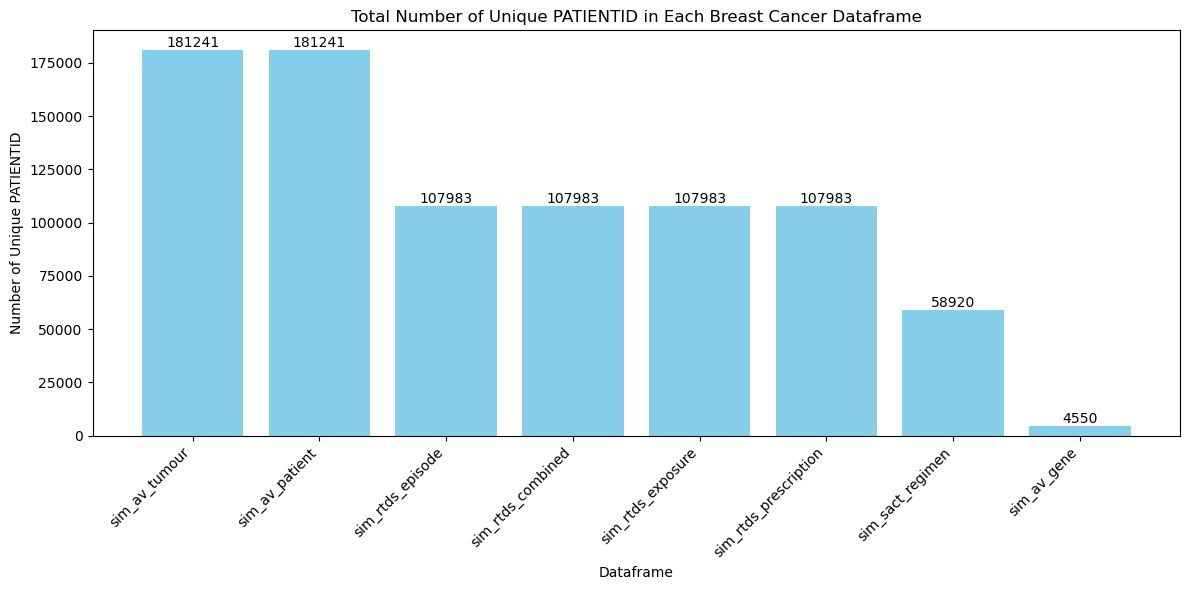

In [98]:
# Dataframes
dataframes = {
    'sim_av_tumour': sim_av_tumour_filtered,
    'sim_av_patient': sim_av_patient_filtered,
    'sim_rtds_episode': sim_rtds_episode_filtered,
    'sim_rtds_combined': sim_rtds_combined_filtered,
    'sim_rtds_exposure': sim_rtds_exposure_filtered,
    'sim_rtds_prescription': sim_rtds_prescription_filtered,
    'sim_sact_regimen': sim_sact_regimen_filtered,
    'sim_av_gene': sim_av_gene_filtered,
}

# Calculate the number of unique PATIENTID in each dataframe
unique_patient_counts = {name: df['PATIENTID'].nunique() for name, df in dataframes.items()}

# Plotting the results
plt.figure(figsize=(12, 6))
bars = plt.bar(unique_patient_counts.keys(), unique_patient_counts.values(), color='skyblue')

# Add text labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.xlabel('Dataframe')
plt.ylabel('Number of Unique PATIENTID')
plt.title('Total Number of Unique PATIENTID in Each Breast Cancer Dataframe')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [101]:
# Define the mapping dictionaries
gender_mapping = {
    1: 'Male',
    2: 'Female',
    9: 'Indeterminate'
}

# Mapping VITALSTATUS to new categories
vitalstatus_mapping = {
    'A': 'Alive',
    'D': 'Dead',
    'D3': 'Died before diagnosis',
    'D4': 'Died before treatment',
    'D5': 'Lost or Unknown',
    'X': 'Lost or Unknown',
    'X2': 'Lost or Unknown',
    'X4': 'Lost or Unknown',
    'X5': 'Lost or Unknown'
}


# Map the codes to descriptions in the DataFrame
sim_av_patient_filtered_2['GENDER'] = sim_av_patient_filtered_2['GENDER'].map(gender_mapping)
sim_av_patient_filtered_2['VITALSTATUS'] = sim_av_patient_filtered_2['VITALSTATUS'].map(vitalstatus_mapping)


# Map ETHNICITY codes to descriptions
sim_av_patient_filtered_2['ETHNICITY'] = sim_av_patient_filtered_2['ETHNICITY'].map(ethnicity_mapping)

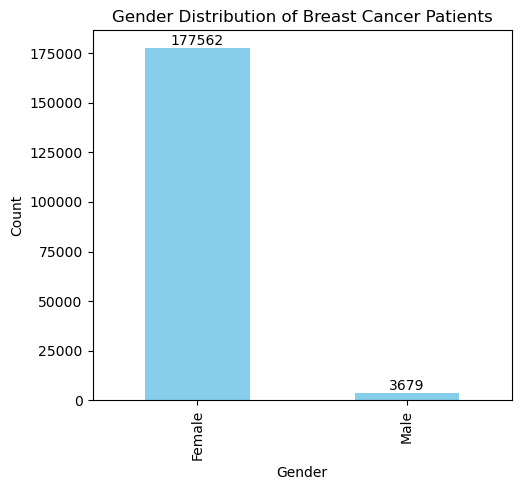

In [102]:
# Plot Gender Distribution
plt.figure(figsize=(14, 5))

# Create the bar plot
ax = plt.subplot(1, 3, 1)
gender_counts = sim_av_patient_filtered_2['GENDER'].value_counts()
bars = gender_counts.plot(kind='bar', color='skyblue', ax=ax)

# Add title and labels
plt.title('Gender Distribution of Breast Cancer Patients')
plt.xlabel('Gender')
plt.ylabel('Count')

# Annotate each bar with its value
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

# Optional: Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

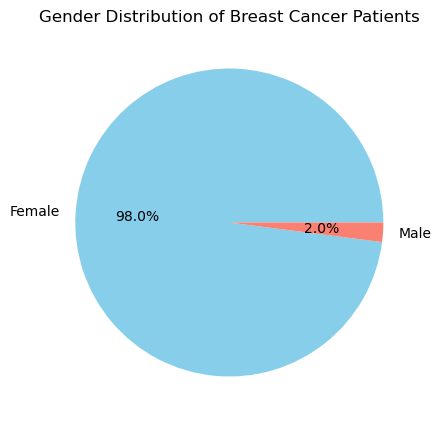

In [104]:
# Plot Gender Distribution as a Pie Chart
plt.figure(figsize=(20, 5))

# Create the pie chart
ax = plt.subplot(1, 3, 1)
gender_counts = sim_av_patient_filtered_2['GENDER'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen'], ax=ax)

# Add title
plt.title('Gender Distribution of Breast Cancer Patients')

# Add labels to the pie chart
plt.ylabel('')  # Hide the y-label for the pie chart

# Show the plot
plt.show()

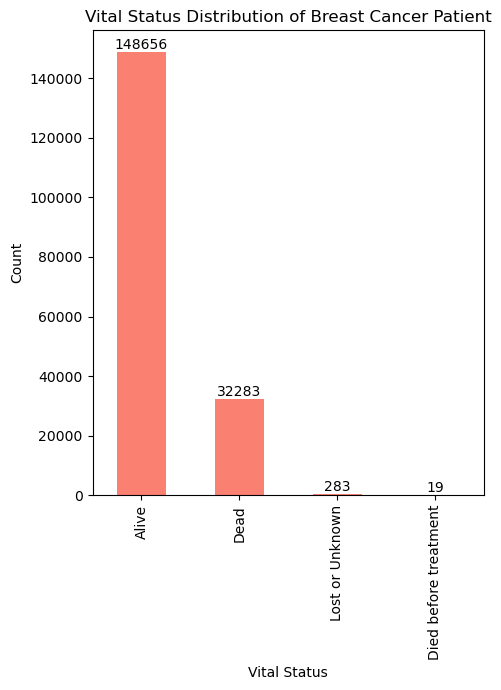

In [105]:
# Mapping VITALSTATUS to new categories
vitalstatus_mapping = {
    'A': 'Alive',
    'D': 'Dead',
    'D3': 'Died before diagnosis',
    'D4': 'Died before treatment',
    'D5': 'Lost or Unknown',
    'X': 'Lost or Unknown',
    'X2': 'Lost or Unknown',
    'X4': 'Lost or Unknown',
    'X5': 'Lost or Unknown'
}

# Plot Vital Status Distribution
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 2)
vitalstatus_counts = sim_av_patient_filtered_2['VITALSTATUS'].value_counts()
ax = vitalstatus_counts.plot(kind='bar', color='salmon')
plt.title('Vital Status Distribution of Breast Cancer Patient')
plt.xlabel('Vital Status')
plt.ylabel('Count')

# Add value labels on top of the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 5, str(int(i.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

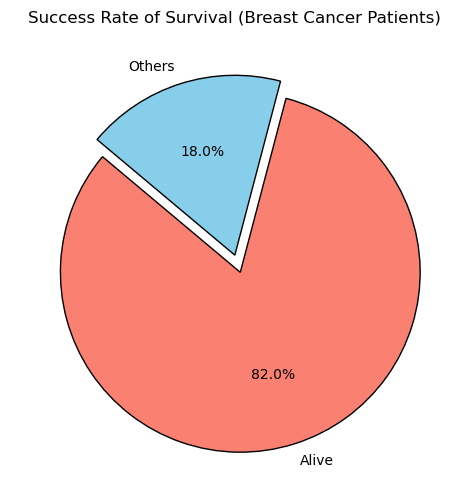

In [106]:
# Mapping VITALSTATUS to new categories, including the exact values found in the value counts
vitalstatus_mapping = {
    'Alive': 'Alive',
    'Dead': 'Others',
    'Lost or Unknown': 'Others',
    'Died before treatment': 'Others'
}

# Apply the mapping to create a new column with the simplified categories
sim_av_patient_filtered_2['Simplified_VITALSTATUS'] = sim_av_patient_filtered_2['VITALSTATUS'].map(vitalstatus_mapping)

# Count the occurrences of each category
simplified_vitalstatus_counts = sim_av_patient_filtered_2['Simplified_VITALSTATUS'].value_counts()

# Define explode to separate the slices
explode = [0.1 if label == 'Alive' else 0 for label in simplified_vitalstatus_counts.index]

# Create the pie chart
plt.figure(figsize=(10, 5))
plt.pie(simplified_vitalstatus_counts, labels=simplified_vitalstatus_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['salmon', 'skyblue'], explode=explode, wedgeprops={'edgecolor': 'black'})

plt.title('Success Rate of Survival (Breast Cancer Patients)')

plt.tight_layout()
plt.show()

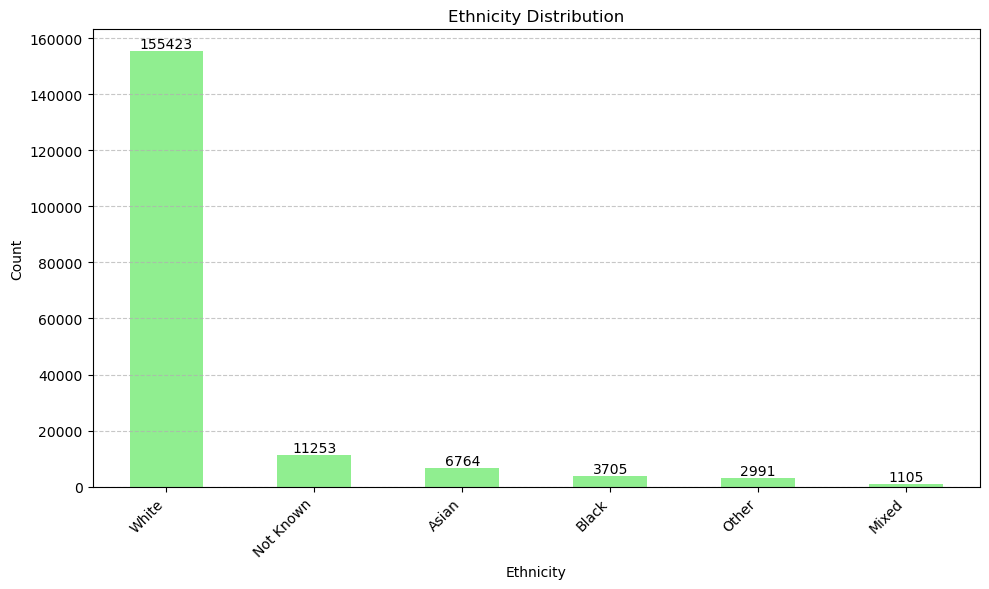

In [108]:
# Fill missing values in 'ETHNICITY' with 'X'
sim_av_patient_filtered['ETHNICITY'].fillna('X', inplace=True)

# Define a reduced mapping for broader categories
reduced_ethnicity_mapping = {
    '0': 'White',
    '8': 'Other',
    'A': 'White',
    'B': 'White',
    'C': 'White',
    'CA': 'White',  # Assuming CA represents White
    'CH': 'Asian',
    'CP': 'Asian',
    'D': 'Mixed',
    'E': 'Mixed',
    'F': 'Mixed',
    'G': 'Mixed',
    'H': 'Asian',
    'J': 'Asian',
    'K': 'Asian',
    'L': 'Asian',
    'M': 'Black',
    'N': 'Black',
    'P': 'Black',
    'R': 'Asian',
    'S': 'Other',
    'X': 'Not Known',  # Fill empty spaces with 'Not Known'
    'Z': 'Not Known'
}

# Apply the reduced mapping to your dataframe
sim_av_patient_filtered['ETHNICITY_REDUCED'] = sim_av_patient_filtered['ETHNICITY'].map(reduced_ethnicity_mapping)

# Plot Ethnicity Distribution with the reduced mapping
plt.figure(figsize=(10, 6))
ax = sim_av_patient_filtered['ETHNICITY_REDUCED'].value_counts().plot(kind='bar', color='lightgreen')

# Adding labels and title
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# Adding value labels on top of bars
for p in ax.patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.5, int(p.get_height()), 
             ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, ha='right')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

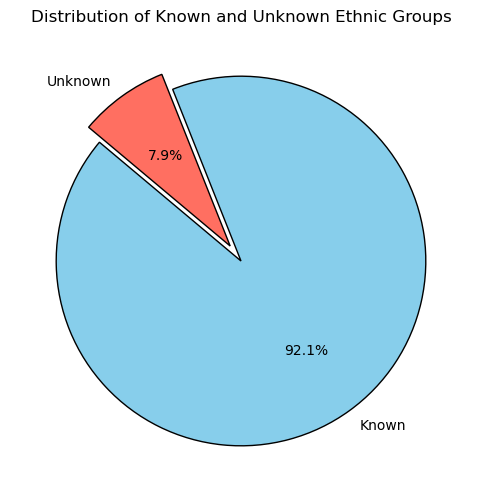

In [109]:
# Apply the reduced mapping to your dataframe
sim_av_patient_filtered['ETHNICITY_REDUCED'] = sim_av_patient_filtered['ETHNICITY'].map(reduced_ethnicity_mapping)

# Define known and unknown categories
known_categories = ['White', 'Asian', 'Black', 'Mixed']
unknown_categories = ['Not Known', 'Other']

# Count known and unknown categories
known_count = sim_av_patient_filtered['ETHNICITY_REDUCED'].isin(known_categories).sum()
unknown_count = sim_av_patient_filtered['ETHNICITY_REDUCED'].isin(unknown_categories).sum()

# Data for the pie chart
labels = ['Known', 'Unknown']
sizes = [known_count, unknown_count]
colors = ['#87CEEB', '#FF6F61']  # lightblue and lightcoral colors
explode = (0, 0.1)  # explode the second slice (Unknown)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Known and Unknown Ethnic Groups')
plt.show()

In [113]:
# Filtering the dataframe to get only the rows where VITALSTATUS is 'D'
dead_patients = sim_av_patient_filtered_2[sim_av_patient_filtered['VITALSTATUS'] == 'D']

# Displaying the first few rows of the new dataframe
dead_patients.head(3)

,PATIENTID,GENDER,ETHNICITY,DEATHCAUSECODE_UNDERLYING,VITALSTATUS,VITALSTATUSDATE,Simplified_VITALSTATUS
275817,10275818,Male,White British,C56,Dead,2021-10-20,Others
276181,10276182,Male,White British,F019,Dead,2020-07-18,Others
279279,10279280,Male,White British,C19,Dead,2022-07-31,Others


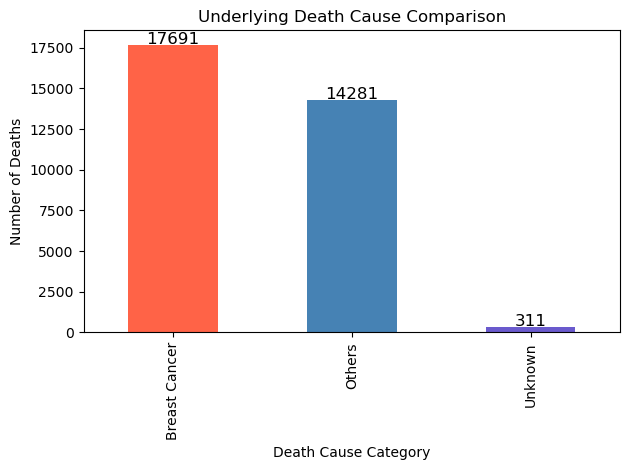

In [114]:
# Categorizing the 'DEATHCAUSECODE_UNDERLYING' column
dead_patients['CAUSE_CATEGORY'] = dead_patients['DEATHCAUSECODE_UNDERLYING'].apply(
    lambda x: 'Breast Cancer' if pd.notna(x) and 'C509' in x else ('Unknown' if pd.isna(x) else 'Others')
)

# Counting the occurrences of each category
cause_counts = dead_patients['CAUSE_CATEGORY'].value_counts()

# Plotting the data
fig, ax = plt.subplots()
bars = cause_counts.plot(kind='bar', color=['#FF6347', '#4682B4', '#6A5ACD'], ax=ax)
ax.set_title('Underlying Death Cause Comparison')
ax.set_xlabel('Death Cause Category')
ax.set_ylabel('Number of Deaths')
plt.xticks(rotation=90)
plt.tight_layout()

# Annotating the bars with the count values
for bar in bars.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                size=12, xytext=(0, 4),
                textcoords='offset points')

# Show the plot
plt.show()

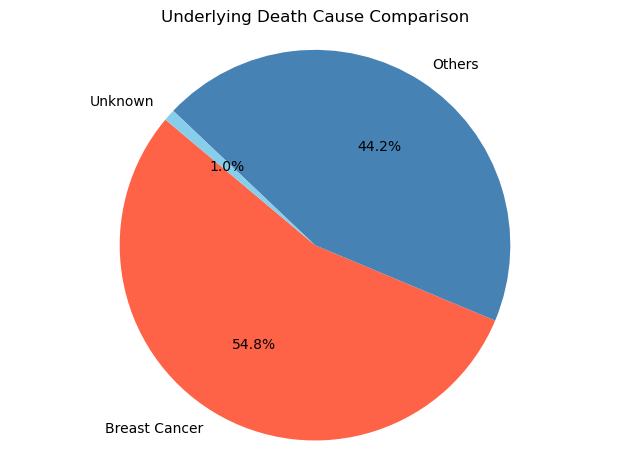

In [115]:
# Plotting the data as a pie chart
fig, ax = plt.subplots()
ax.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', colors=['#FF6347', '#4682B4', '#87CEEB'], startangle=140)
ax.set_title('Underlying Death Cause Comparison') 

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# Visualization of Tumour Analysis

In [116]:
# Merge the sim_av_patient_filtered_2 dataframe with sim_av_tumour_filtered_2 dataframe using left join
merged_data = sim_av_patient_filtered_2.merge(sim_av_tumour_filtered_2, on=['PATIENTID'], how='left')

merged_data.head(3)

,PATIENTID,GENDER,ETHNICITY,DEATHCAUSECODE_UNDERLYING,VITALSTATUS,VITALSTATUSDATE,Simplified_VITALSTATUS,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,10273711,Male,NaN,NaN,Alive,2022-07-05,Alive,11057017,2019-03-19,C504,8500,3,?,G2,82
1,10275818,Male,White British,C56,Dead,2021-10-20,Others,11162139,2019-08-14,C504,8500,3,?,G2,77
2,10276182,Male,White British,F019,Dead,2020-07-18,Others,10547204,2019-11-12,C502,8500,3,2A,GH,46


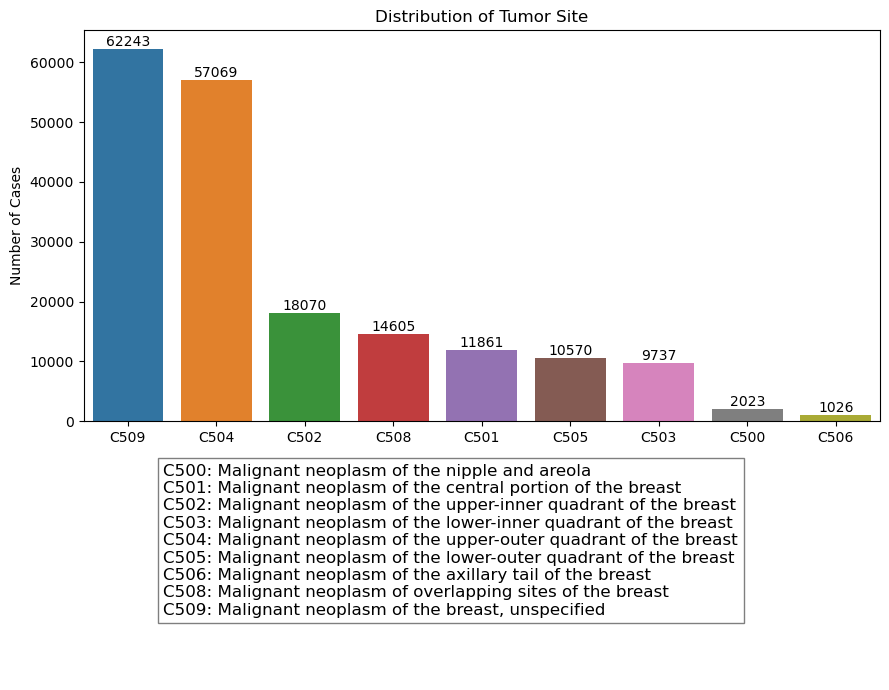

In [117]:
import seaborn as sns

# ICD-10 code descriptions
icd10_descriptions = {
    'C500': 'Malignant neoplasm of the nipple and areola',
    'C501': 'Malignant neoplasm of the central portion of the breast',
    'C502': 'Malignant neoplasm of the upper-inner quadrant of the breast',
    'C503': 'Malignant neoplasm of the lower-inner quadrant of the breast',
    'C504': 'Malignant neoplasm of the upper-outer quadrant of the breast',
    'C505': 'Malignant neoplasm of the lower-outer quadrant of the breast',
    'C506': 'Malignant neoplasm of the axillary tail of the breast',
    'C508': 'Malignant neoplasm of overlapping sites of the breast',
    'C509': 'Malignant neoplasm of the breast, unspecified'
}

# Count the occurrences of each ICD-10 code in the data
site_counts = merged_data['SITE_ICD10_O2'].value_counts()

# Sort the codes by the number of occurrences
sorted_sites = site_counts.index

# Creating a combined figure with subplots
fig, ax = plt.subplots(2, 1, figsize=(9, 7), gridspec_kw={'height_ratios': [3, 1]})

# Distribution of Tumor Characteristics, sorted by count
sns.countplot(data=merged_data, x='SITE_ICD10_O2', ax=ax[0], order=sorted_sites)
ax[0].set_title('Distribution of Tumor Site')
ax[0].set_xlabel('')
ax[0].set_ylabel('Number of Cases')

# Annotating the bars with the count values and increased font size
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 5), 
                   textcoords='offset points',
                   fontsize=10)  

# Adding the key text
key_text = "\n".join([f"{k}: {v}" for k, v in icd10_descriptions.items()])
ax[1].text(0.1, 0.5, key_text, horizontalalignment='left', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
ax[1].axis('off')  # Hide the axis for the key section

plt.tight_layout()
plt.show()


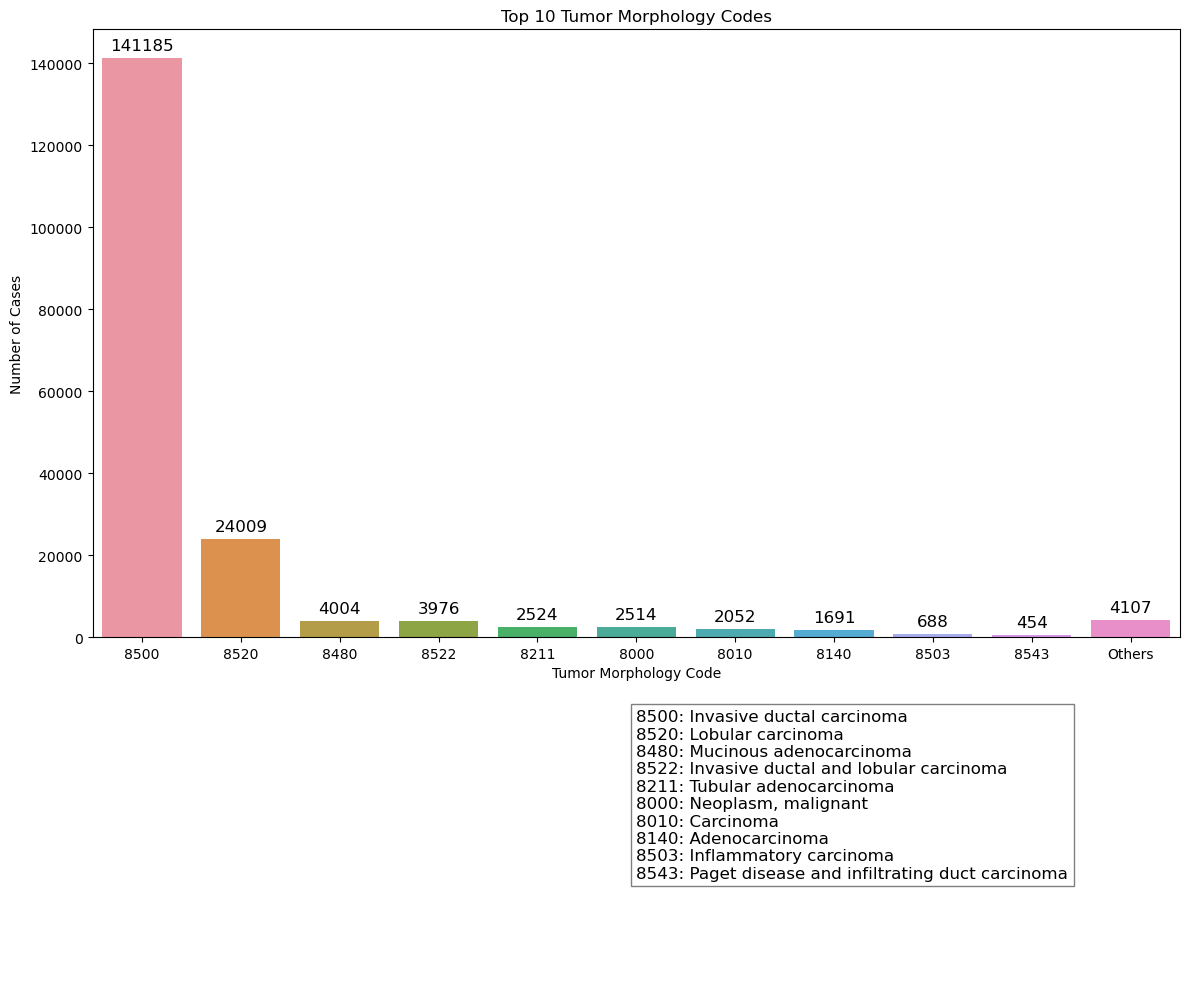

In [118]:
# MORPH_ICD10 code descriptions
morph_icd10_descriptions = {
    '8500': 'Invasive ductal carcinoma',
    '8520': 'Lobular carcinoma',
    '8480': 'Mucinous adenocarcinoma',
    '8522': 'Invasive ductal and lobular carcinoma',
    '8211': 'Tubular adenocarcinoma',
    '8000': 'Neoplasm, malignant',
    '8010': 'Carcinoma',
    '8140': 'Adenocarcinoma',
    '8503': 'Inflammatory carcinoma',
    '8543': 'Paget disease and infiltrating duct carcinoma'
}

# Count the occurrences of each morphology code
morph_counts = merged_data['MORPH_ICD10_O2'].value_counts()

# Select the top 10 most common categories
top_morphs = morph_counts.head(10)
top_morphs['Others'] = morph_counts[10:].sum()

# Convert to DataFrame for easier plotting
top_morphs_df = top_morphs.reset_index()
top_morphs_df.columns = ['MORPH_ICD10_O2', 'count']

# Setting up the GridSpec layout
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1])

# Plotting the bar chart
ax0 = fig.add_subplot(gs[0])
sns.barplot(data=top_morphs_df, x='MORPH_ICD10_O2', y='count', ax=ax0)
ax0.set_title('Top 10 Tumor Morphology Codes')
ax0.set_xlabel('Tumor Morphology Code')
ax0.set_ylabel('Number of Cases')

# Annotating the bars with the count values
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 9), 
                 textcoords='offset points',
                 fontsize=12)  

# Adding the key text
ax1 = fig.add_subplot(gs[1])
key_text = "\n".join([f"{k}: {v}" for k, v in morph_icd10_descriptions.items()])
ax1.text(0.5, 0.5, key_text, horizontalalignment='left', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
ax1.axis('off')  # Hide the axis for the key section

plt.tight_layout()
plt.show()

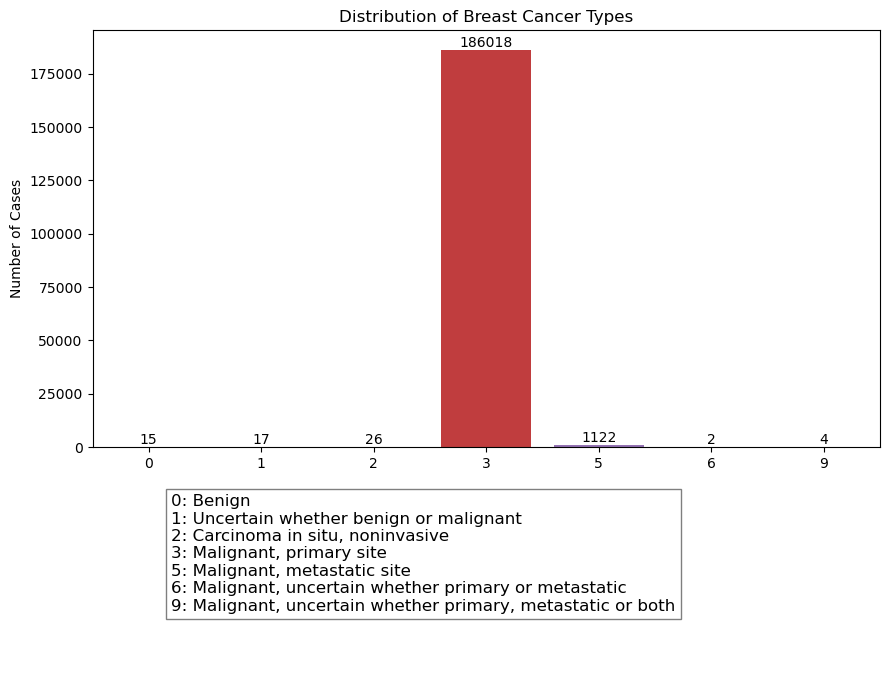

In [119]:
# BEHAVIOUR_ICD10 code descriptions
behaviour_icd10_descriptions = {
'0': 'Benign',
'1': 'Uncertain whether benign or malignant', 
'2': 'Carcinoma in situ, noninvasive',
'3': 'Malignant, primary site',
'5': 'Malignant, metastatic site',
'6': 'Malignant, uncertain whether primary or metastatic',
'9': 'Malignant, uncertain whether primary, metastatic or both'

}


# Creating a combined figure with subplots
fig, ax = plt.subplots(2, 1, figsize=(9, 7), gridspec_kw={'height_ratios': [3, 1]})

# Distribution of Behaviour Characteristics
sns.countplot(data=merged_data, x='BEHAVIOUR_ICD10_O2', ax=ax[0])
ax[0].set_title('Distribution of Breast Cancer Types')
ax[0].set_xlabel('')
ax[0].set_ylabel('Number of Cases')

# Annotating the bars with the count values and increased font size
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 5), 
                   textcoords='offset points',
                   fontsize=10)  

# Adding the key text
key_text = "\n".join([f"{k}: {v}" for k, v in behaviour_icd10_descriptions.items()])
ax[1].text(0.1, 0.5, key_text, horizontalalignment='left', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
ax[1].axis('off')  

plt.tight_layout()
plt.show()

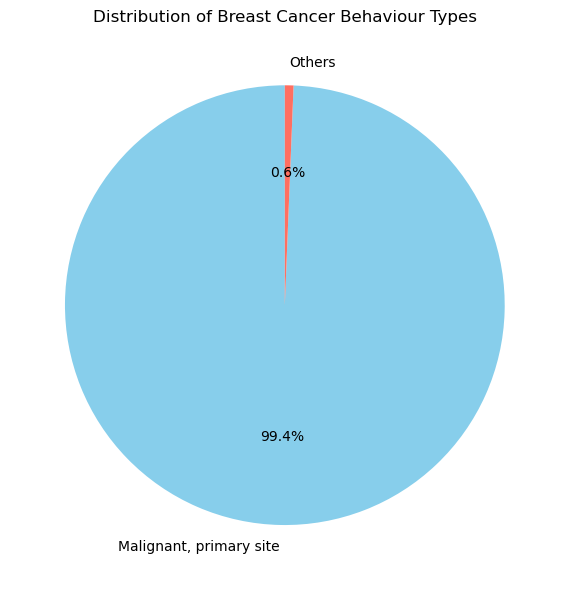

In [120]:
# Categorizing 'BEHAVIOUR_ICD10_O2'
merged_data['BEHAVIOUR_CATEGORY'] = merged_data['BEHAVIOUR_ICD10_O2'].apply(
    lambda x: 'Malignant, primary site' if x == 3 else 'Others'
)

# Counting the occurrences of each category
behaviour_counts = merged_data['BEHAVIOUR_CATEGORY'].value_counts()

# Plotting the data
fig, ax = plt.subplots(figsize=(8, 6))
behaviour_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=['#87CEEB', '#FF6F61'])
ax.set_ylabel('')
ax.set_title('Distribution of Breast Cancer Behaviour Types')

plt.tight_layout()
plt.show()


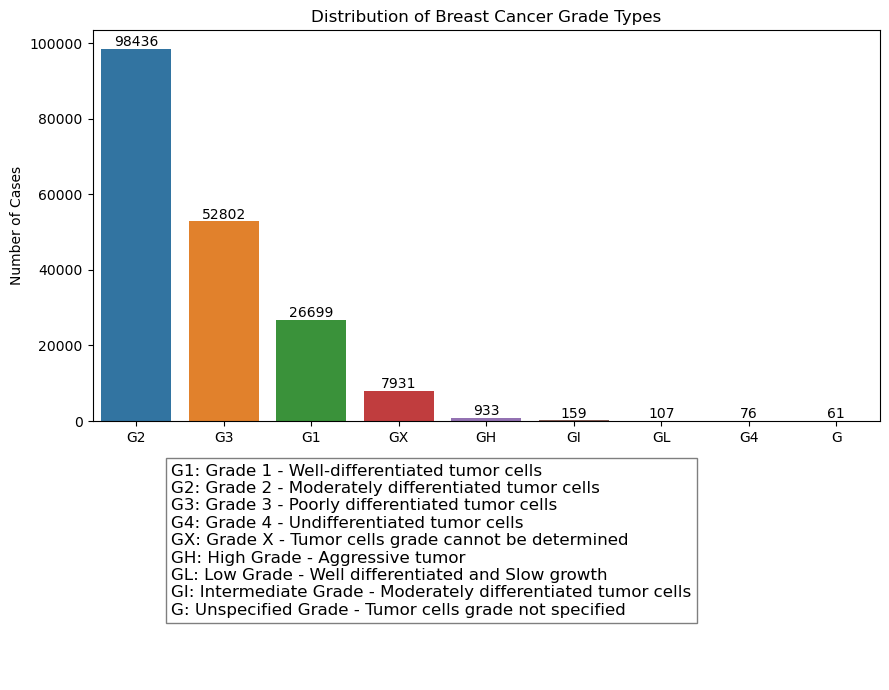

In [121]:
# GRADE code descriptions
grade_descriptions = {
    'G1': 'Grade 1 - Well-differentiated tumor cells',
    'G2': 'Grade 2 - Moderately differentiated tumor cells', 
    'G3': 'Grade 3 - Poorly differentiated tumor cells',
    'G4': 'Grade 4 - Undifferentiated tumor cells',
    'GX': 'Grade X - Tumor cells grade cannot be determined',
    'GH': 'High Grade - Aggressive tumor',
    'GL': 'Low Grade - Well differentiated and Slow growth',
    'GI': 'Intermediate Grade - Moderately differentiated tumor cells',
    'G':  'Unspecified Grade - Tumor cells grade not specified'
}

# Count the occurrences of each GRADE code in the data
grade_counts = merged_data['GRADE'].value_counts()

# Sort the codes by the number of occurrences
sorted_grades = grade_counts.index

# Creating a combined figure with subplots
fig, ax = plt.subplots(2, 1, figsize=(9, 7), gridspec_kw={'height_ratios': [3, 1]})

# Distribution of Behaviour Characteristics, sorted by count
sns.countplot(data=merged_data, x='GRADE', ax=ax[0], order=sorted_grades)
ax[0].set_title('Distribution of Breast Cancer Grade Types')
ax[0].set_xlabel('')
ax[0].set_ylabel('Number of Cases')

# Annotating the bars with the count values and increased font size
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 5), 
                   textcoords='offset points',
                   fontsize=10)  

# Adding the key text
key_text = "\n".join([f"{k}: {v}" for k, v in grade_descriptions.items()])
ax[1].text(0.1, 0.5, key_text, horizontalalignment='left', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
ax[1].axis('off')  # Hide the axis for the key section

plt.tight_layout()
plt.show()

In [126]:
# Merge the sim_av_patient_filtered_2 dataframe with sim_av_tumour_filtered_2 dataframe using left join
merged_data = sim_av_patient_filtered_2.merge(sim_av_tumour_filtered_2, on=['PATIENTID'], how='left')

merged_data.head(3)

,PATIENTID,GENDER,ETHNICITY,DEATHCAUSECODE_UNDERLYING,VITALSTATUS,VITALSTATUSDATE,Simplified_VITALSTATUS,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,10273711,Male,NaN,NaN,Alive,2022-07-05,Alive,11057017,2019-03-19,C504,8500,3,?,G2,82
1,10275818,Male,White British,C56,Dead,2021-10-20,Others,11162139,2019-08-14,C504,8500,3,?,G2,77
2,10276182,Male,White British,F019,Dead,2020-07-18,Others,10547204,2019-11-12,C502,8500,3,2A,GH,46


In [130]:
# Filtering the dataframe to get only the rows where VITALSTATUS is 'D'
dead_patients_2 = merged_data[merged_data['VITALSTATUS'] == 'Dead']

# Displaying the first few rows of the new dataframe
dead_patients_2.head(3)

,PATIENTID,GENDER,ETHNICITY,DEATHCAUSECODE_UNDERLYING,VITALSTATUS,VITALSTATUSDATE,Simplified_VITALSTATUS,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
1,10275818,Male,White British,C56,Dead,2021-10-20,Others,11162139,2019-08-14,C504,8500,3,?,G2,77
2,10276182,Male,White British,F019,Dead,2020-07-18,Others,10547204,2019-11-12,C502,8500,3,2A,GH,46
4,10279280,Male,White British,C19,Dead,2022-07-31,Others,11581924,2017-04-12,C509,8500,3,4,G1,60


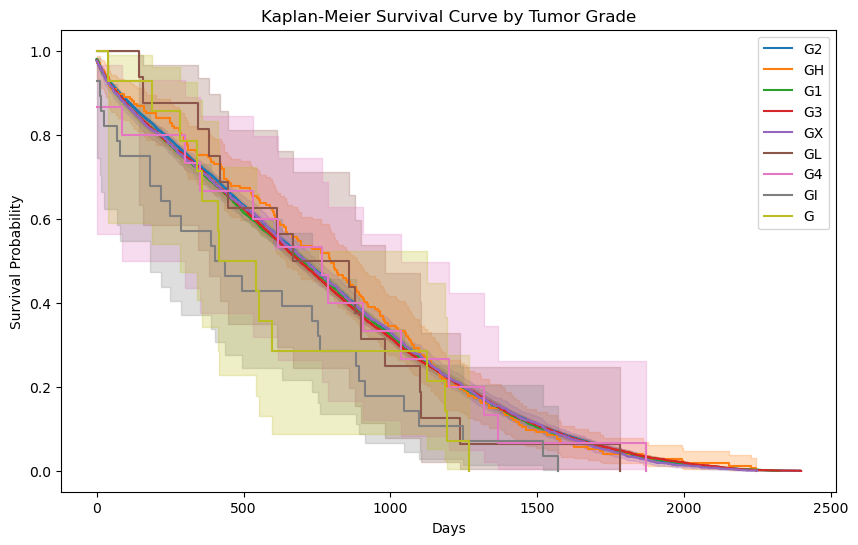

In [132]:
from lifelines import KaplanMeierFitter

# Convert dates to datetime format
dead_patients_2['VITALSTATUSDATE'] = pd.to_datetime(dead_patients_2['VITALSTATUSDATE'])
dead_patients_2['DIAGNOSISDATEBEST'] = pd.to_datetime(dead_patients_2['DIAGNOSISDATEBEST'])

# Calculating survival time
dead_patients_2['SURVIVAL_DAYS'] = (dead_patients_2['VITALSTATUSDATE'] - dead_patients_2['DIAGNOSISDATEBEST']).dt.days

# Kaplan-Meier Survival Analysis
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))
for grade in dead_patients_2['GRADE'].unique():
    grade_group = dead_patients_2[dead_patients_2['GRADE'] == grade]
    kmf.fit(grade_group['SURVIVAL_DAYS'], event_observed=(grade_group['VITALSTATUS'] == 'Dead'), label=grade)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curve by Tumor Grade')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.show()

G1 (well-differentiated) tends to have higher survival probabilities over time compared to higher-grade tumors, 
which is expected as lower-grade tumors are usually less aggressive.

G3 and G4 (poorly differentiated) tend to have lower survival probabilities, indicating more aggressive and less favorable
prognosis. Confidence Intervals: Wider shaded areas indicate greater uncertainty in the survival probability estimates. 
Narrower intervals indicate more precise estimates.

Comparative Survival:

    Curves that stay higher on the Y-axis for a longer time indicate better survival rates.
    G1 (green) and G2 (blue): Typically expected to show better survival probabilities due to lower grade.
    G3 (red) and G4 (pink): Typically expected to show worse survival probabilities due to higher grade.
        
Curves for G1 and G2 stay higher than those for G3 and G4 for most of the time, indicating better survival rates for lower-grade tumors.

The survival probability declines more rapidly for higher grades, which is consistent with clinical expectations.

# Visualizations of Treatment Pathways

In [133]:
# Merge the sim_sact_regimen_filtered dataframe with sim_av_patient_filtered dataframe using left join
merged_data_1 = sim_sact_regimen_filtered_2.merge(sim_av_patient_filtered_2, on=['PATIENTID'], how='left')

merged_data_1.head(3)

,PATIENTID,MERGED_REGIMEN_ID,INTENT_OF_TREATMENT,START_DATE_OF_REGIMEN,CHEMO_RADIATION,BENCHMARK_GROUP,LINK_NUMBER,GENDER,ETHNICITY,DEATHCAUSECODE_UNDERLYING,VITALSTATUS,VITALSTATUSDATE,Simplified_VITALSTATUS
0,10282626,10038661,C,2017-09-18,NaN,CISPLATIN + GEMCITABINE,101568052,Female,White British,NaN,Alive,2022-07-05,Alive
1,10291762,10038800,C,2020-03-08,NaN,CAPECITABINE + MITOMYCIN,101085235,Female,NaN,C61,Dead,2022-06-21,Others
2,10292545,10038811,03,2017-12-09,N,IMATINIB,101712044,Male,White British,NaN,Alive,2022-07-05,Alive


In [134]:
# Filter rows where 'VITALSTATUS' is 'A' (alive)
alive_patients = merged_data_1[merged_data_1['VITALSTATUS'] == 'Alive']

# Print the filtered rows
alive_patients.head(3)

,PATIENTID,MERGED_REGIMEN_ID,INTENT_OF_TREATMENT,START_DATE_OF_REGIMEN,CHEMO_RADIATION,BENCHMARK_GROUP,LINK_NUMBER,GENDER,ETHNICITY,DEATHCAUSECODE_UNDERLYING,VITALSTATUS,VITALSTATUSDATE,Simplified_VITALSTATUS
0,10282626,10038661,C,2017-09-18,NaN,CISPLATIN + GEMCITABINE,101568052,Female,White British,NaN,Alive,2022-07-05,Alive
2,10292545,10038811,03,2017-12-09,N,IMATINIB,101712044,Male,White British,NaN,Alive,2022-07-05,Alive
3,10293472,10038822,NaN,2017-08-25,N,TRIAL UNSPECIFIED,101495777,Male,White British,NaN,Alive,2022-07-05,Alive


In [135]:
# Check the missing items
print(alive_patients.isnull().sum())

PATIENTID                         0
MERGED_REGIMEN_ID                 0
INTENT_OF_TREATMENT           28336
START_DATE_OF_REGIMEN           154
CHEMO_RADIATION               30916
BENCHMARK_GROUP                   0
LINK_NUMBER                       0
GENDER                            0
ETHNICITY                      1540
DEATHCAUSECODE_UNDERLYING    120371
VITALSTATUS                       0
VITALSTATUSDATE                  33
Simplified_VITALSTATUS            0
dtype: int64


In [136]:
# Drop rows where 'START_DATE_OF_REGIMEN' is missing
alive_patients = alive_patients.dropna(subset=['START_DATE_OF_REGIMEN'])

In [138]:
# Drop rows where 'START_DATE_OF_REGIMEN' is missing
alive_patients = alive_patients.dropna(subset=['VITALSTATUSDATE'])

In [139]:
# Check the missing items
print(alive_patients.isnull().sum())

PATIENTID                         0
MERGED_REGIMEN_ID                 0
INTENT_OF_TREATMENT           28266
START_DATE_OF_REGIMEN             0
CHEMO_RADIATION               30848
BENCHMARK_GROUP                   0
LINK_NUMBER                       0
GENDER                            0
ETHNICITY                      1535
DEATHCAUSECODE_UNDERLYING    120184
VITALSTATUS                       0
VITALSTATUSDATE                   0
Simplified_VITALSTATUS            0
dtype: int64


In [140]:
# Ensure 'START_DATE_OF_REGIMEN' and 'VITALSTATUSDATE' are datetime objects
alive_patients['START_DATE_OF_REGIMEN'] = pd.to_datetime(alive_patients['START_DATE_OF_REGIMEN'])
alive_patients['VITALSTATUSDATE'] = pd.to_datetime(alive_patients['VITALSTATUSDATE'])

# Calculate treatment duration
alive_patients['TREATMENT_DURATION_DAYS'] = (alive_patients['VITALSTATUSDATE'] - alive_patients['START_DATE_OF_REGIMEN']).dt.days

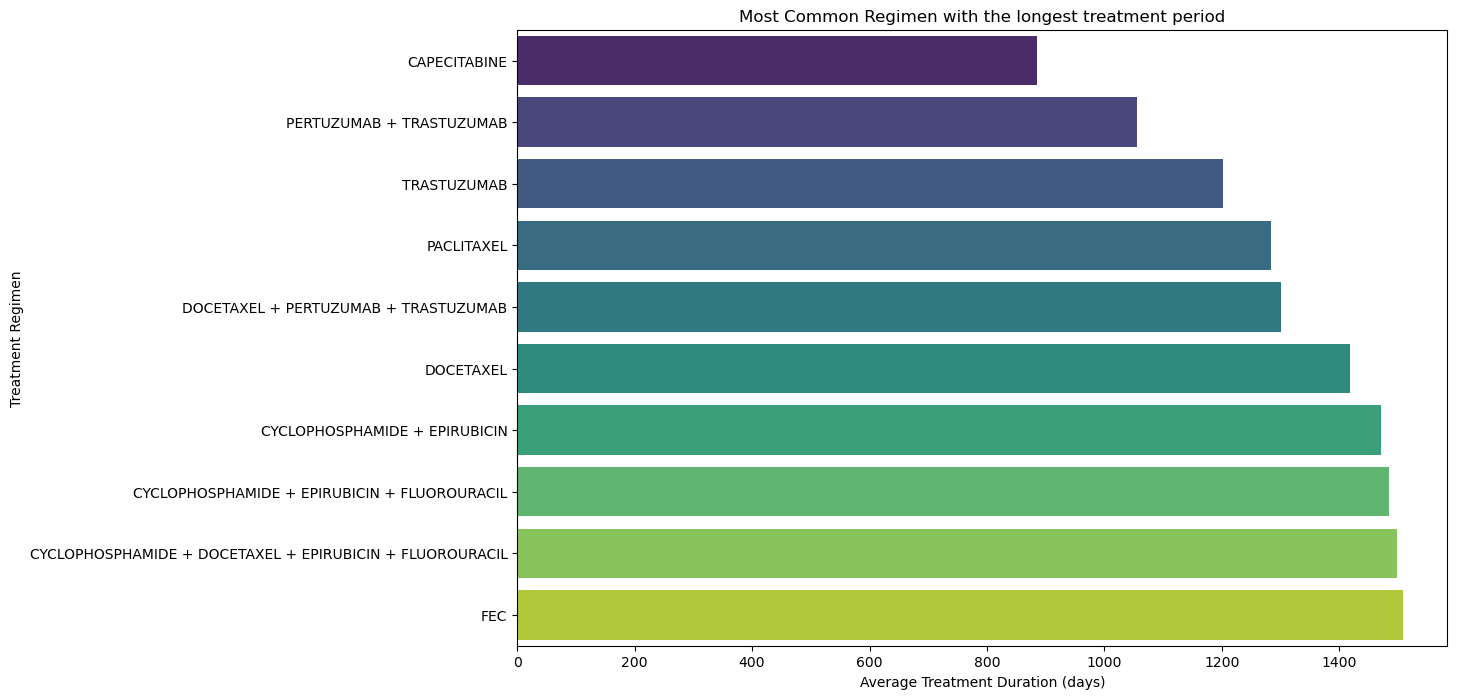

In [141]:
# Top 10 treatment regimens by count
top_10_treatments = alive_patients['BENCHMARK_GROUP'].value_counts().head(10).index

# Filter the dataframe to include only the top 10 treatment regimens
filtered_data = alive_patients[alive_patients['BENCHMARK_GROUP'].isin(top_10_treatments)]

# Calculate average treatment duration for the top 10 treatment regimens
avg_duration = filtered_data.groupby('BENCHMARK_GROUP')['TREATMENT_DURATION_DAYS'].mean().sort_values()

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_duration, y=avg_duration.index, palette='viridis')
plt.title('Most Common Regimen with the longest treatment period')
plt.xlabel('Average Treatment Duration (days)')
plt.ylabel('Treatment Regimen')
plt.show()

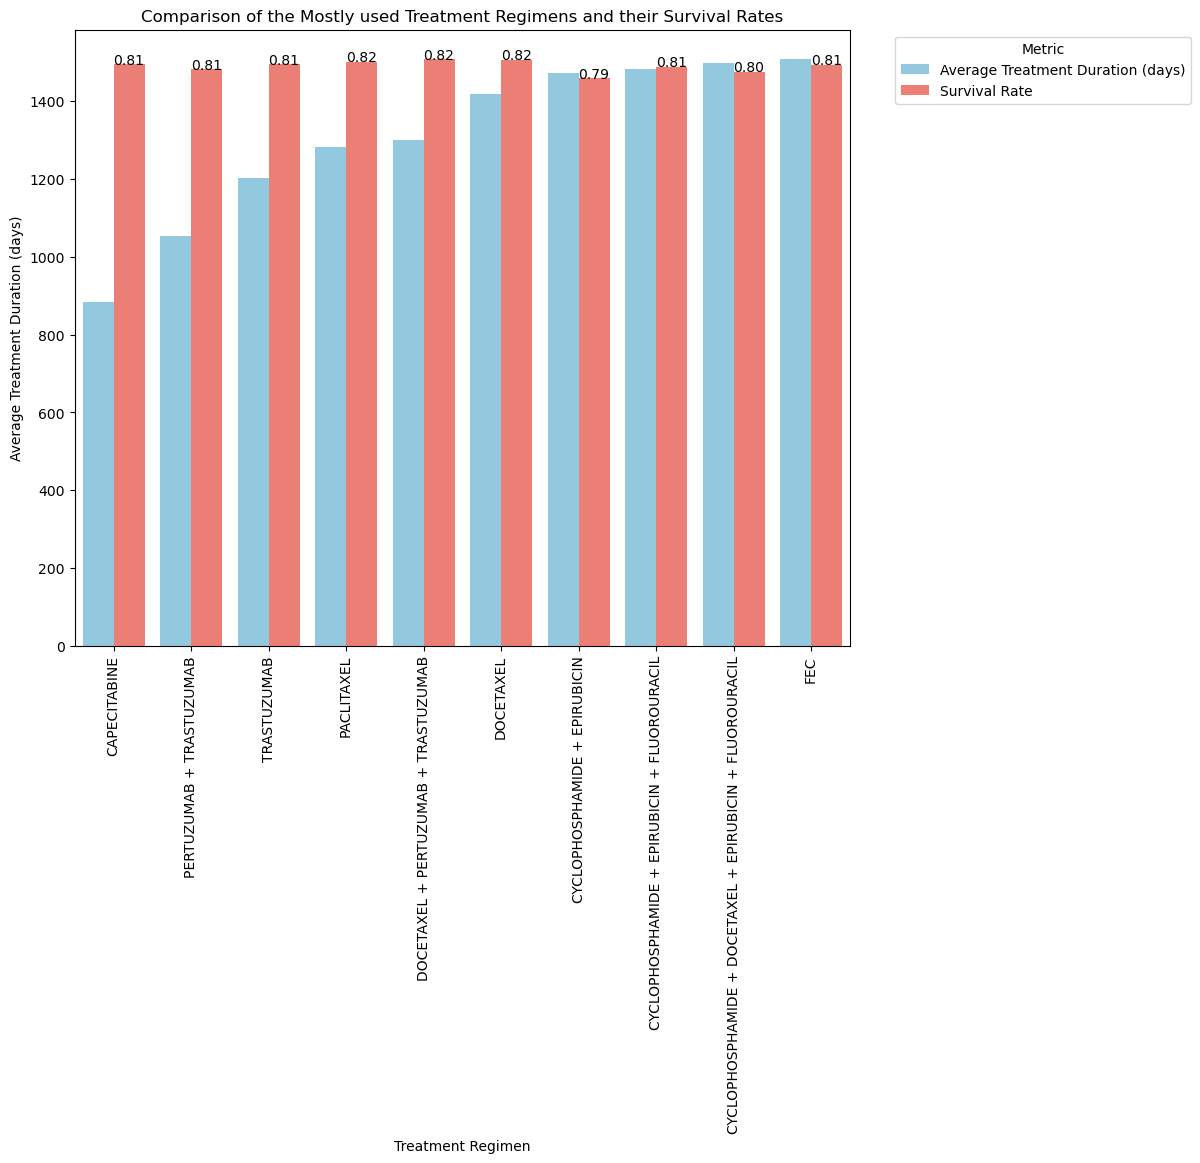

In [142]:
# Ensure the 'BENCHMARK_GROUP' column exists and calculate average treatment duration for the top 10 treatment regimens
if 'BENCHMARK_GROUP' in alive_patients.columns:
    # Calculate average treatment duration for the top 10 treatment regimens
    avg_duration = filtered_data.groupby('BENCHMARK_GROUP')['TREATMENT_DURATION_DAYS'].mean().sort_values()

    # Calculate survival rates for the top 10 regimens
    survival_counts = alive_patients['BENCHMARK_GROUP'].value_counts()
    total_counts = merged_data_1['BENCHMARK_GROUP'].value_counts()
    survival_rates = (survival_counts / total_counts).loc[top_10_treatments].sort_values(ascending=False)

    # Prepare data for plotting
    plot_data = pd.DataFrame({
        'BENCHMARK_GROUP': avg_duration.index,
        'Average Treatment Duration (days)': avg_duration.values,
        'Survival Rate': survival_rates[top_10_treatments].values
    })

    # Normalize survival rates to match the scale of average treatment duration
    plot_data['Normalized Survival Rate'] = plot_data['Survival Rate'] * (plot_data['Average Treatment Duration (days)'].max() / plot_data['Survival Rate'].max())

    # Create a long-form dataframe suitable for seaborn's barplot
    plot_data_melted = plot_data.melt(id_vars='BENCHMARK_GROUP', value_vars=['Average Treatment Duration (days)', 'Normalized Survival Rate'], var_name='Metric', value_name='Value')

    # Plotting the data
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(data=plot_data_melted, x='BENCHMARK_GROUP', y='Value', hue='Metric', palette=['#87CEEB', '#FF6F61'])
    plt.title('Comparison of the Mostly used Treatment Regimens and their Survival Rates')
    plt.xlabel('Treatment Regimen')
    plt.ylabel('Average Treatment Duration (days)')
    plt.xticks(rotation=90)
    
    # Adding survival rate values on top of the bars
    for index, row in plot_data.iterrows():
        ax.text(index, row['Normalized Survival Rate'], f"{row['Survival Rate']:.2f}", color='black', ha="left")

    # Correcting the legend and moving it outside the plot
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['Average Treatment Duration (days)', 'Survival Rate'], title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()
else:
    print("The 'BENCHMARK_GROUP' column is missing from the dataframe.")

In [143]:
# Drop rows where 'START_DATE_OF_REGIMEN' is missing
all_patients = merged_data_1.dropna(subset=['START_DATE_OF_REGIMEN'])

In [144]:
# Drop rows where 'START_DATE_OF_REGIMEN' is missing
all_patients = all_patients.dropna(subset=['VITALSTATUSDATE'])

In [145]:
# Check for missing items
print(all_patients.isnull().sum())

PATIENTID                         0
MERGED_REGIMEN_ID                 0
INTENT_OF_TREATMENT           34511
START_DATE_OF_REGIMEN             0
CHEMO_RADIATION               37746
BENCHMARK_GROUP                   0
LINK_NUMBER                       0
GENDER                            0
ETHNICITY                      1882
DEATHCAUSECODE_UNDERLYING    120710
VITALSTATUS                       0
VITALSTATUSDATE                   0
Simplified_VITALSTATUS            0
dtype: int64


In [146]:
# Ensure 'START_DATE_OF_REGIMEN' and 'VITALSTATUSDATE' are datetime objects
all_patients['START_DATE_OF_REGIMEN'] = pd.to_datetime(all_patients['START_DATE_OF_REGIMEN'])
all_patients['VITALSTATUSDATE'] = pd.to_datetime(all_patients['VITALSTATUSDATE'])

# Calculate treatment duration
all_patients['TREATMENT_DURATION_DAYS'] = (all_patients['VITALSTATUSDATE'] - all_patients['START_DATE_OF_REGIMEN']).dt.days

In [147]:
# Top 10 treatment regimens by count
top_10_treatments = all_patients['BENCHMARK_GROUP'].value_counts().head(10).index

In [148]:
# Filter out rows with negative 'TREATMENT_DURATION_DAYS'
all_patients = all_patients[all_patients['TREATMENT_DURATION_DAYS'] >= 0]

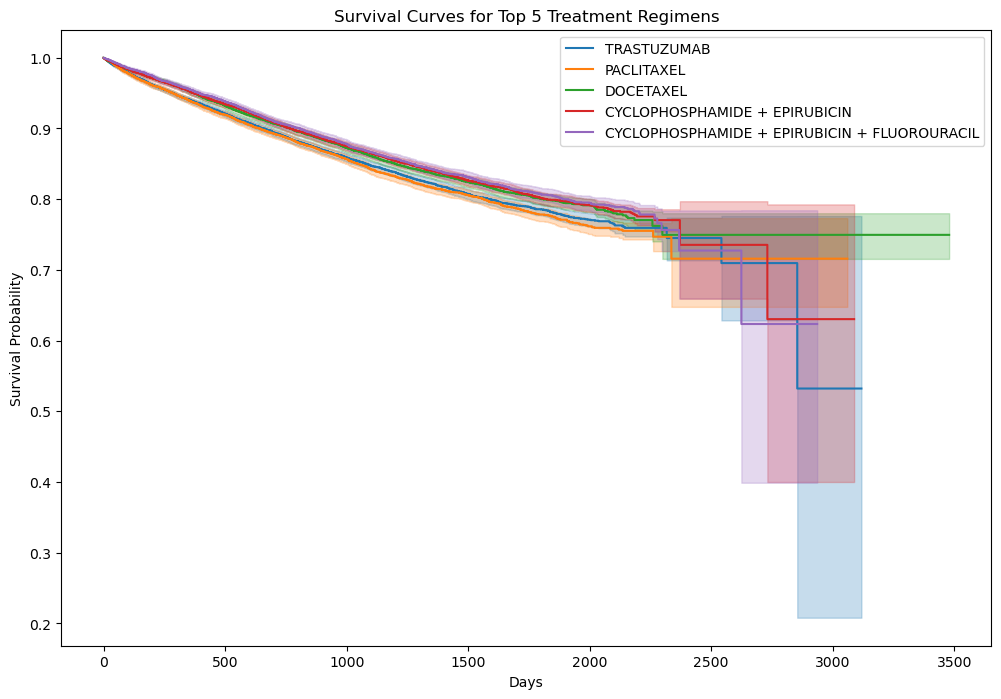

In [149]:
# Instantiate the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Plot survival curves for top 5 treatment regimens
plt.figure(figsize=(12, 8))

# Loop through the top 5 treatment regimens
for regimen in top_10_treatments[:5]:
    regimen_data = all_patients[all_patients['BENCHMARK_GROUP'] == regimen]
    
    # Fit the KaplanMeierFitter with the data
    kmf.fit(durations=regimen_data['TREATMENT_DURATION_DAYS'], 
            event_observed=regimen_data['VITALSTATUS'] == 'Dead', 
            label=regimen)
    
    # Plot the survival function
    kmf.plot_survival_function()

# Adding title and labels
plt.title('Survival Curves for Top 5 Treatment Regimens')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

1. Survival Probability: The y-axis represents the survival probability, which ranges from 0 to 1. 
    A survival probability of 1 indicates that all patients are surviving, while a value closer to 0 indicates 
    that more patients have died.
    
2. Treatment Regimens: The different lines represent the survival curves for different treatment regimens. Each line shows 
    the probability of survival over time for patients undergoing that specific treatment.
    
3. Confidence Intervals: The shaded areas around each survival curve represent the confidence intervals. 
    These intervals give an idea of the uncertainty around the survival estimates. Wider intervals indicate more 
    uncertainty.

In [151]:
# Merge the sim_sact_regimen_filtered_2 dataframe with sim_sact_cycle_filtered_2 dataframe using left join
merged_data_2 = sim_sact_regimen_filtered_2.merge(sim_sact_cycle_filtered_2, on=['MERGED_REGIMEN_ID'], how='left')

merged_data_2.head(3)

,PATIENTID,MERGED_REGIMEN_ID,INTENT_OF_TREATMENT,START_DATE_OF_REGIMEN,CHEMO_RADIATION,BENCHMARK_GROUP,LINK_NUMBER,MERGED_CYCLE_ID,CYCLE_NUMBER,START_DATE_OF_CYCLE,PERF_STATUS_START_OF_CYCLE
0,10282626,10038661,C,2017-09-18,NaN,CISPLATIN + GEMCITABINE,101568052,10006185.0,2.0,2017-09-18,1
1,10282626,10038661,C,2017-09-18,NaN,CISPLATIN + GEMCITABINE,101568052,10025473.0,11.0,2017-10-09,NaN
2,10291762,10038800,C,2020-03-08,NaN,CAPECITABINE + MITOMYCIN,101085235,10006310.0,1.0,2020-03-08,0


In [152]:
# Merge the sim_sact_regimen_filtered_2 dataframe with sim_sact_cycle_filtered_2 dataframe using left join
merged_data_3 = merged_data_2.merge(sim_sact_drug_detail_filtered_2, on=['MERGED_CYCLE_ID'], how='left')

merged_data_3.head(3)

,PATIENTID,MERGED_REGIMEN_ID,INTENT_OF_TREATMENT,START_DATE_OF_REGIMEN,CHEMO_RADIATION,BENCHMARK_GROUP,LINK_NUMBER,MERGED_CYCLE_ID,CYCLE_NUMBER,START_DATE_OF_CYCLE,PERF_STATUS_START_OF_CYCLE,MERGED_DRUG_DETAIL_ID,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP
0,10282626,10038661,C,2017-09-18,NaN,CISPLATIN + GEMCITABINE,101568052,10006185.0,2.0,2017-09-18,1,10006159.0,160.0,2.0,2017-09-18,ENZALUTAMIDE
1,10282626,10038661,C,2017-09-18,NaN,CISPLATIN + GEMCITABINE,101568052,10025473.0,11.0,2017-10-09,NaN,10025223.0,10.0,1.0,2017-10-09,NOT CHEMO
2,10282626,10038661,C,2017-09-18,NaN,CISPLATIN + GEMCITABINE,101568052,10025473.0,11.0,2017-10-09,NaN,10096142.0,500.0,2.0,2017-10-09,NOT CHEMO


In [154]:
# check for duplicates in the entire dataframe

print(merged_data_3.duplicated().sum())

0


In [156]:
# Drop rows where 'START_DATE_OF_CYCLE' is missing
merged_data_3 = merged_data_3.dropna(subset=['START_DATE_OF_CYCLE'])

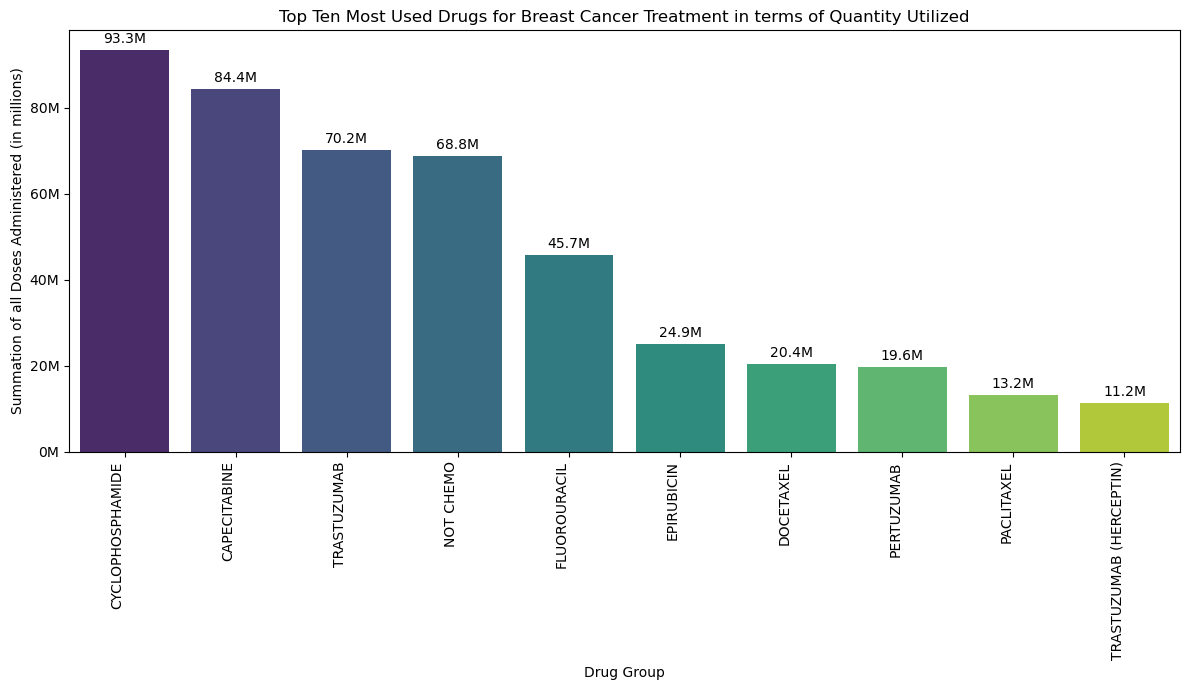

In [157]:
# Summarize the actual dose per drug
drug_dose_summary = merged_data_3.groupby(['DRUG_GROUP', 'ADMINISTRATION_ROUTE'])['ACTUAL_DOSE_PER_ADMINISTRATION'].sum().reset_index()

# Get the top 10 drug groups by total dose administered
top_drug_groups = drug_dose_summary.groupby('DRUG_GROUP')['ACTUAL_DOSE_PER_ADMINISTRATION'].sum().nlargest(10).index
filtered_drug_dose_summary = drug_dose_summary[drug_dose_summary['DRUG_GROUP'].isin(top_drug_groups)]

# Summarize the total dose administered by drug group
total_dose_summary = filtered_drug_dose_summary.groupby('DRUG_GROUP')['ACTUAL_DOSE_PER_ADMINISTRATION'].sum().reset_index()

# Sort the total dose summary by 'ACTUAL_DOSE_PER_ADMINISTRATION' in descending order
total_dose_summary = total_dose_summary.sort_values(by='ACTUAL_DOSE_PER_ADMINISTRATION', ascending=False)

# Plot 1: Total Dose Administered by Top 10 Drug Groups
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=total_dose_summary, x='DRUG_GROUP', y='ACTUAL_DOSE_PER_ADMINISTRATION', palette='viridis')
plt.title('Top Ten Most Used Drugs for Breast Cancer Treatment in terms of Quantity Utilized')
plt.xlabel('Drug Group')
plt.ylabel('Summation of all Doses Administered (in millions)')
plt.xticks(rotation=90, ha='right')

# Format y-axis labels to show millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

# Add text annotations on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/1e6:,.1f}M', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points', 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


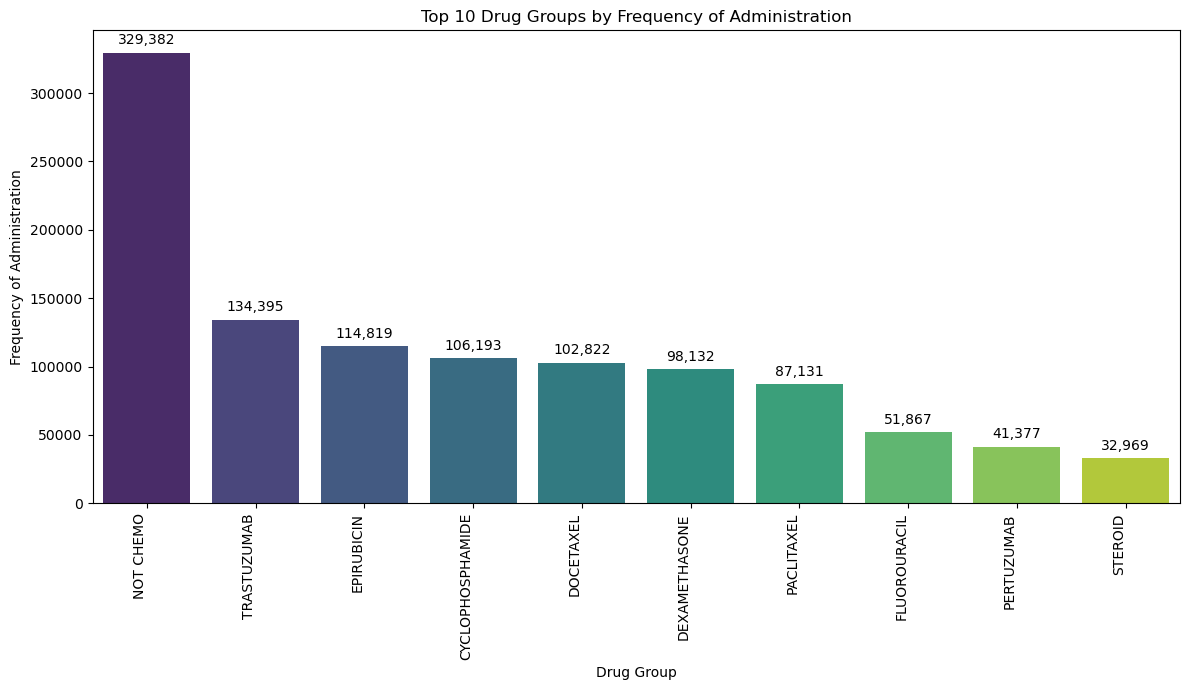

In [158]:
# Summarize the frequency of administration per drug
drug_frequency_summary = merged_data_3.groupby('DRUG_GROUP')['MERGED_DRUG_DETAIL_ID'].count().reset_index()

# Get the top 10 drug groups by frequency of administration
top_drug_groups_freq = drug_frequency_summary.nlargest(10, 'MERGED_DRUG_DETAIL_ID')

# Plot the data
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=top_drug_groups_freq, x='DRUG_GROUP', y='MERGED_DRUG_DETAIL_ID', palette='viridis')
plt.title('Top 10 Drug Groups by Frequency of Administration')
plt.xlabel('Drug Group')
plt.ylabel('Frequency of Administration')
plt.xticks(rotation=90, ha='right')

# Annotate the bars with the frequency values
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.tight_layout()
plt.show()

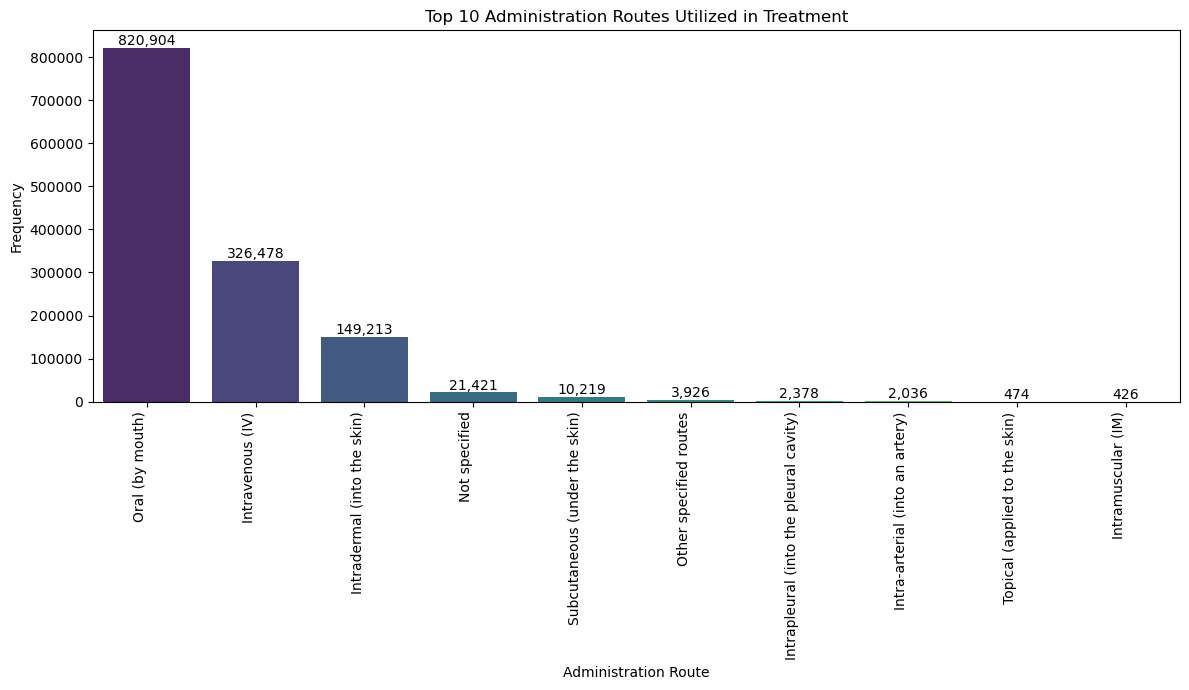

In [159]:
# Fill missing Administration route values with 0
merged_data_3['ADMINISTRATION_ROUTE'] = merged_data_3['ADMINISTRATION_ROUTE'].fillna(0)

# Mapping of administration codes to their descriptions
admin_route_mapping = {
    0: 'Not specified',
    1: 'Oral (by mouth)',
    2: 'Intravenous (IV)',
    3: 'Intramuscular (IM)',
    4: 'Subcutaneous (under the skin)',
    5: 'Intradermal (into the skin)',
    6: 'Intrathecal (into the spinal canal)',
    7: 'Inhalation (through the respiratory tract)',
    9: 'Topical (applied to the skin)',
    10: 'Intraperitoneal (into the peritoneal cavity)',
    11: 'Intra-arterial (into an artery)',
    12: 'Intravesical (into the bladder)',
    13: 'Intracavitary (into a body cavity)',
    14: 'Intrapleural (into the pleural cavity)',
    25: 'Rectal (through the rectum)',
    47: 'Nasal (through the nose)',
    98: 'Other specified routes',
    99: 'Not applicable or not administered'
}

# Summarize the frequency of administration routes
admin_route_summary = merged_data_3['ADMINISTRATION_ROUTE'].value_counts().reset_index()
admin_route_summary.columns = ['ADMINISTRATION_ROUTE', 'Frequency']

# Map the administration route codes to their descriptions
admin_route_summary['ADMINISTRATION_ROUTE'] = admin_route_summary['ADMINISTRATION_ROUTE'].map(admin_route_mapping)

# Get the top 10 administration routes by frequency
top_admin_routes = admin_route_summary.head(10)

# Plot the data
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=top_admin_routes, x='ADMINISTRATION_ROUTE', y='Frequency', palette='viridis')
plt.title('Top 10 Administration Routes Utilized in Treatment')
plt.xlabel('Administration Route')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')

# Annotate the bars with the frequency values
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [161]:
# Dropping rows with missing values in 'REGIMEN_MOD_TIME_DELAY' column
sim_sact_outcome_filtered_1 = sim_sact_outcome_filtered.dropna(subset=['REGIMEN_MOD_TIME_DELAY'])

In [162]:
# Check for missing items
print(sim_sact_outcome_filtered_1.isnull().sum())

MERGED_REGIMEN_ID                 0
DATE_OF_FINAL_TREATMENT       38629
REGIMEN_MOD_DOSE_REDUCTION     3153
REGIMEN_MOD_TIME_DELAY            0
REGIMEN_MOD_STOPPED_EARLY      3862
REGIMEN_OUTCOME_SUMMARY       75863
dtype: int64


In [163]:
# Dropping rows with missing values in 'REGIMEN_MOD_STOPPED_EARLY' column
sim_sact_outcome_filtered_1 = sim_sact_outcome_filtered_1.dropna(subset=['REGIMEN_MOD_STOPPED_EARLY'])

In [164]:
# Check for missing items
print(sim_sact_outcome_filtered_1.isnull().sum())

MERGED_REGIMEN_ID                 0
DATE_OF_FINAL_TREATMENT       36732
REGIMEN_MOD_DOSE_REDUCTION     2446
REGIMEN_MOD_TIME_DELAY            0
REGIMEN_MOD_STOPPED_EARLY         0
REGIMEN_OUTCOME_SUMMARY       72527
dtype: int64


In [165]:
# Dropping rows with missing values in 'REGIMEN_MOD_DOSE_REDUCTION' column
sim_sact_outcome_filtered_1 = sim_sact_outcome_filtered_1.dropna(subset=['REGIMEN_MOD_DOSE_REDUCTION'])

In [166]:
# Check for missing items
print(sim_sact_outcome_filtered_1.isnull().sum())

MERGED_REGIMEN_ID                 0
DATE_OF_FINAL_TREATMENT       35525
REGIMEN_MOD_DOSE_REDUCTION        0
REGIMEN_MOD_TIME_DELAY            0
REGIMEN_MOD_STOPPED_EARLY         0
REGIMEN_OUTCOME_SUMMARY       70485
dtype: int64


<Figure size 1000x600 with 0 Axes>

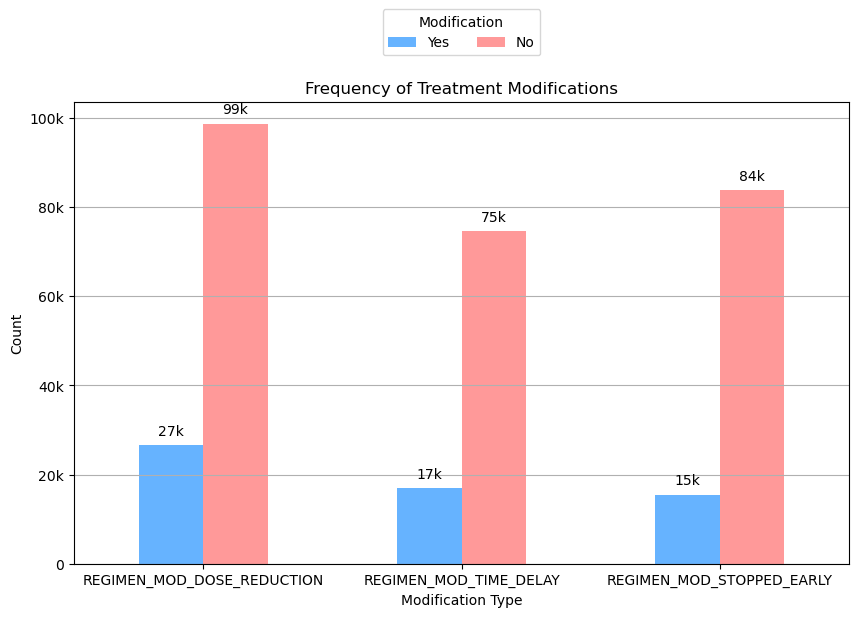

In [167]:
# Define the modification columns
modification_columns = ['REGIMEN_MOD_DOSE_REDUCTION', 'REGIMEN_MOD_TIME_DELAY', 'REGIMEN_MOD_STOPPED_EARLY']

# Replace 'Y' and 'N' with 'Yes' and 'No'
sim_sact_outcome_filtered[modification_columns] = sim_sact_outcome_filtered[modification_columns].replace({'Y': 'Yes', 'N': 'No'})

# Count frequencies of 'Yes' and 'No'
modifications = sim_sact_outcome_filtered[modification_columns].apply(lambda x: x.value_counts()[['Yes', 'No']]).transpose()

# Function to format numbers with 'k' for thousands
def format_thousands(x, pos):
    if x >= 1000:
        return f'{x*1e-3:.0f}k'
    return f'{x:.0f}'

# Plot the frequency of treatment modifications
plt.figure(figsize=(10, 6))
ax = modifications.plot(kind='bar', figsize=(10, 6), color=['#66b3ff', '#ff9999'])

# Apply the formatter to y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_thousands))

# Add the values on top of each bar
for p in ax.patches:
    ax.annotate(format_thousands(p.get_height(), None), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust the legend position
plt.legend(title='Modification', bbox_to_anchor=(0.5, 1.15), loc='center', ncol=2)
plt.title('Frequency of Treatment Modifications')
plt.xlabel('Modification Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

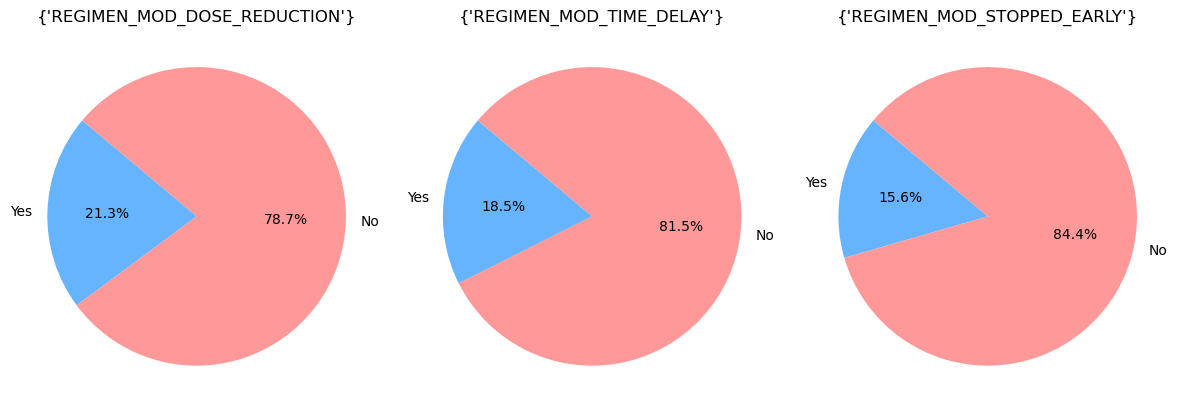

In [168]:
# Define the modification columns
modification_columns = ['REGIMEN_MOD_DOSE_REDUCTION', 'REGIMEN_MOD_TIME_DELAY', 'REGIMEN_MOD_STOPPED_EARLY']

# Replace 'Y' and 'N' with 'Yes' and 'No'
sim_sact_outcome_filtered[modification_columns] = sim_sact_outcome_filtered[modification_columns].replace({'Y': 'Yes', 'N': 'No'})

# Set up the figure with 3 subplots arranged horizontally
fig, axes = plt.subplots(1, 3, figsize=(12, 9))

# Plot pie charts for each modification type
for i, column in enumerate(modification_columns):
    # Calculate the counts of 'Yes' and 'No'
    modification_counts = sim_sact_outcome_filtered[column].value_counts()
    
    # Filter only 'Yes' and 'No'
    modification_counts = modification_counts.loc[['Yes', 'No']]
    
    # Plot the pie chart in the corresponding subplot
    axes[i].pie(modification_counts, labels=modification_counts.index, autopct='%1.1f%%', 
                colors=['#66b3ff', '#ff9999'], startangle=140)
    axes[i].set_title({column})

# Adjust the layout to make sure everything fits well
plt.tight_layout()
plt.show()


Regimen Outcome Summary Analysis
Next, let's analyze the REGIMEN_OUTCOME_SUMMARY to understand the outcomes of different treatment regimens.

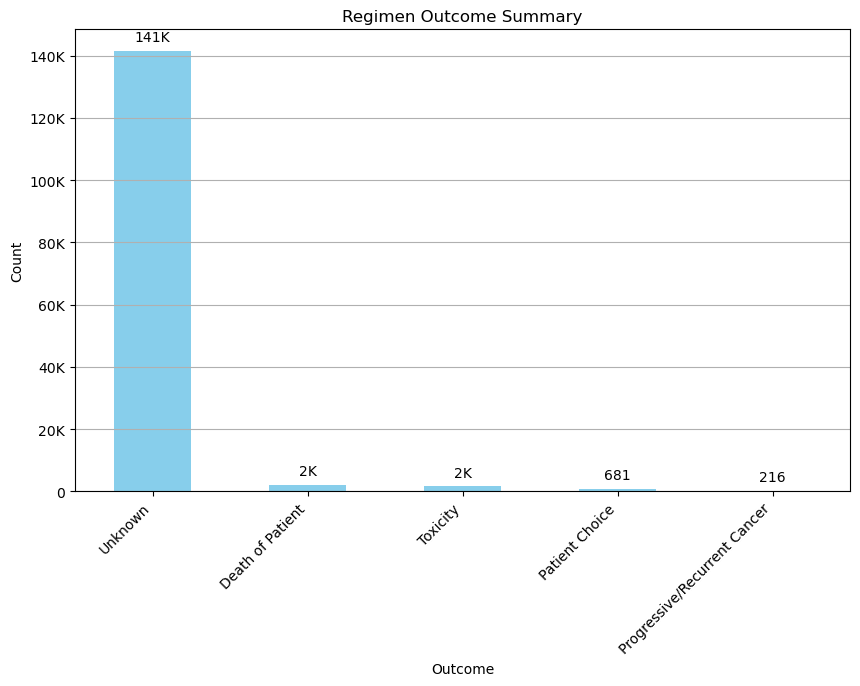

In [169]:
# Fill missing values with 0 in the REGIMEN_OUTCOME_SUMMARY column
sim_sact_outcome_filtered['REGIMEN_OUTCOME_SUMMARY'].fillna('0', inplace=True)

# Map the values according to the provided mapping
outcome_mapping = {
    '1': 'Progressive/Recurrent Cancer',
    '2': 'Toxicity',
    '3': 'Death of Patient',
    '4': 'Patient Choice',
    '5': 'Unknown',
    '0': 'Unknown',
    '7': 'Unknown'
}

sim_sact_outcome_filtered['REGIMEN_OUTCOME_SUMMARY'] = sim_sact_outcome_filtered['REGIMEN_OUTCOME_SUMMARY'].map(outcome_mapping)

# Count the outcomes in REGIMEN_OUTCOME_SUMMARY
outcome_counts = sim_sact_outcome_filtered['REGIMEN_OUTCOME_SUMMARY'].value_counts()

# Function to format numbers with 'K' for thousands
def format_thousands(x, pos):
    if x >= 1000:
        return f'{x*1e-3:.0f}K'
    return f'{x:.0f}'

# Plot the outcome summary
plt.figure(figsize=(10, 6))
ax = outcome_counts.plot(kind='bar', color='skyblue')

# Apply the formatter to y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_thousands))

# Add the values on top of each bar
for p in ax.patches:
    ax.annotate(format_thousands(p.get_height(), None), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Regimen Outcome Summary')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

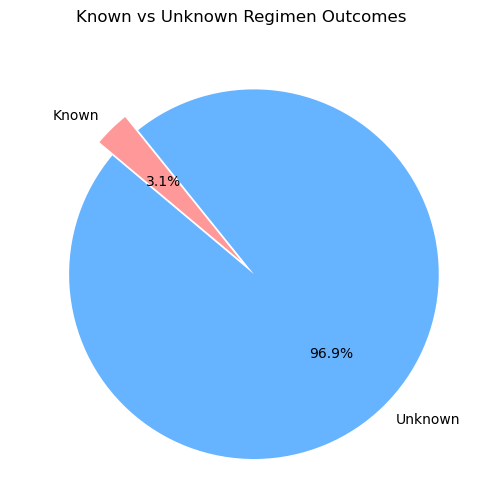

In [170]:
# Create a new column 'Outcome_Group' for Known and Unknown
sim_sact_outcome_filtered['Outcome_Group'] = sim_sact_outcome_filtered['REGIMEN_OUTCOME_SUMMARY'].apply(
    lambda x: 'Known' if x in ['Progressive/Recurrent Cancer', 'Toxicity', 'Death of Patient', 'Patient Choice'] else 'Unknown'
)

# Count the occurrences of Known and Unknown outcomes
outcome_group_counts = sim_sact_outcome_filtered['Outcome_Group'].value_counts()

# Plot the pie chart with the "Known" section exploded
plt.figure(figsize=(8, 6))
plt.pie(outcome_group_counts, labels=outcome_group_counts.index, autopct='%1.1f%%', 
        colors=['#66b3ff', '#ff9999'], startangle=140, explode=(0.1, 0))
plt.title('Known vs Unknown Regimen Outcomes')
plt.show()

# Visualizations of Treatment Modalities & Intents

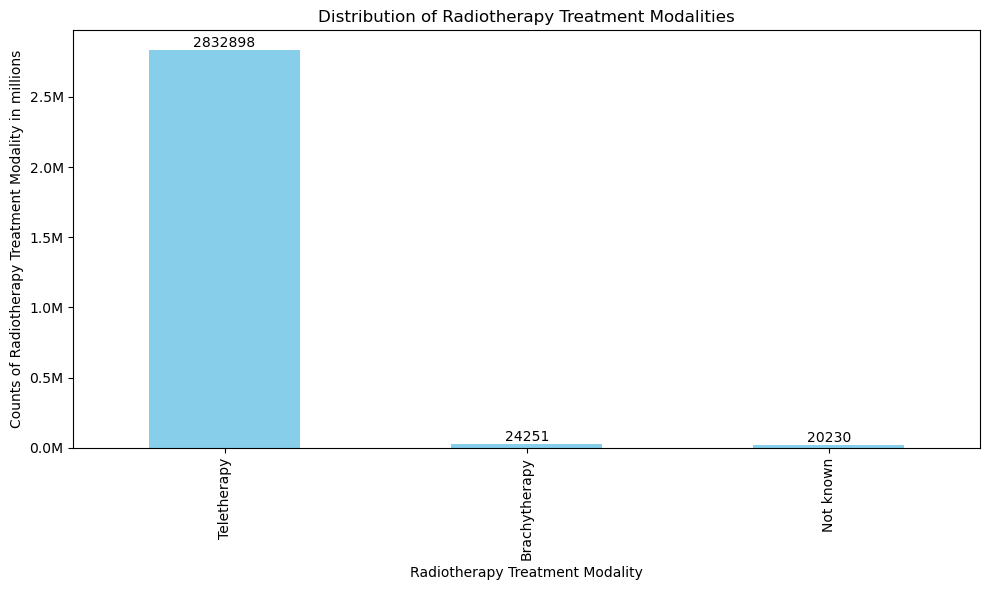

In [172]:
from matplotlib.ticker import FuncFormatter

# Fill missing RTTREATMENTMODALITY with '0'
sim_rtds_combined_filtered_2['RTTREATMENTMODALITY'] = sim_rtds_combined_filtered_2['RTTREATMENTMODALITY'].fillna(0)

# Replace the RTTREATMENTMODALITY values with their corresponding treatment names
sim_rtds_combined_filtered_2['RTTREATMENTMODALITY'] = sim_rtds_combined_filtered_2['RTTREATMENTMODALITY'].replace({
    5: 'Teletherapy',
    6: 'Brachytherapy',
    0: 'Not known'
})

# Bar chart for RTTREATMENTMODALITY
rttreatment_modality_counts = sim_rtds_combined_filtered_2['RTTREATMENTMODALITY'].value_counts()
plt.figure(figsize=(10, 6))
ax = rttreatment_modality_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Radiotherapy Treatment Modalities')
plt.xlabel('Radiotherapy Treatment Modality')
plt.ylabel('Counts of Radiotherapy Treatment Modality in millions')

# Add value labels on top of the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 5, str(int(i.get_height())), ha='center', va='bottom')

# Function to format the y-axis labels in millions
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(millions))

plt.tight_layout()
plt.show()


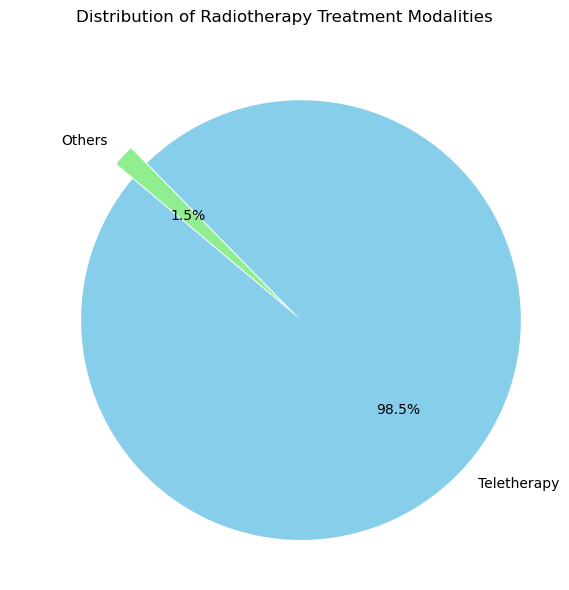

In [173]:
# Combine non-Teletherapy treatment modalities into 'Others'
sim_rtds_combined_filtered_2['RTTREATMENTMODALITY'] = sim_rtds_combined_filtered_2['RTTREATMENTMODALITY'].apply(lambda x: 'Others' if x != 'Teletherapy' else x)

# Pie chart for RTTREATMENTMODALITY
rttreatment_modality_counts = sim_rtds_combined_filtered_2['RTTREATMENTMODALITY'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 6))
explode = (0.1, 0)  # explode the "Others" slice
plt.pie(rttreatment_modality_counts, labels=rttreatment_modality_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=['skyblue', 'lightgreen'], explode=explode, wedgeprops={'edgecolor': 'none'})
plt.title('Distribution of Radiotherapy Treatment Modalities')

# Show the chart
plt.tight_layout()
plt.show()

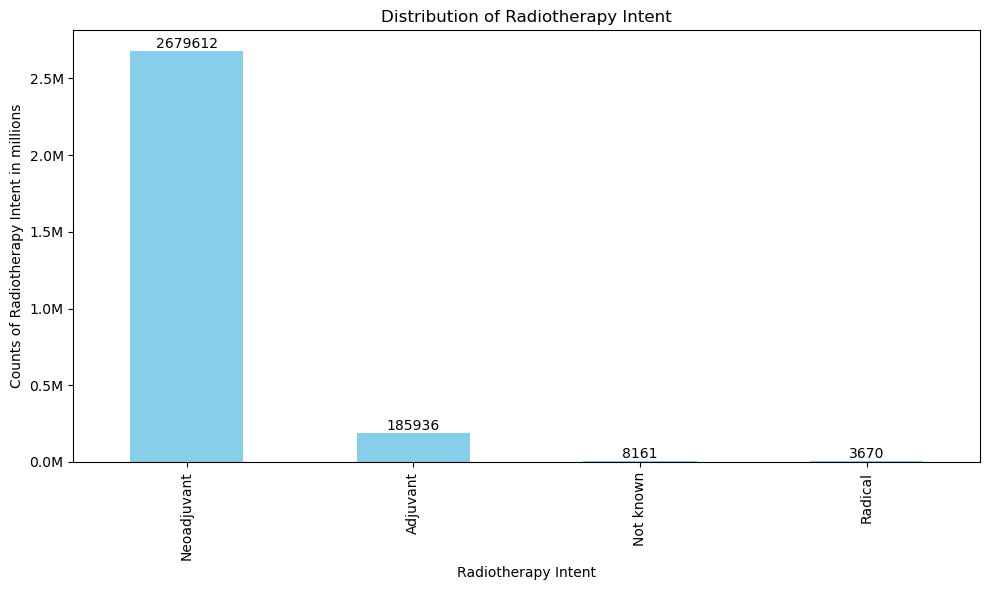

In [174]:
# Fill missing RADIOTHERAPYINTENT with '0'
sim_rtds_combined_filtered_2['RADIOTHERAPYINTENT'] = sim_rtds_combined_filtered_2['RADIOTHERAPYINTENT'].fillna(0)

# Replace the RADIOTHERAPYINTENT values with their corresponding treatment names
sim_rtds_combined_filtered_2['RADIOTHERAPYINTENT'] = sim_rtds_combined_filtered_2['RADIOTHERAPYINTENT'].replace({
    1: 'Adjuvant',
    2: 'Neoadjuvant',
    3: 'Radical',
    0: 'Not known'
})

# Bar chart for RADIOTHERAPYINTENT
radiotherapy_intent_counts = sim_rtds_combined_filtered_2['RADIOTHERAPYINTENT'].value_counts()
plt.figure(figsize=(10, 6))
ax = radiotherapy_intent_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Radiotherapy Intent')
plt.xlabel('Radiotherapy Intent')
plt.ylabel('Counts of Radiotherapy Intent in millions')

# Add value labels on top of the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 5, str(int(i.get_height())), ha='center', va='bottom')
    
# Function to format the y-axis labels in millions
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(millions))


plt.tight_layout()
plt.show()

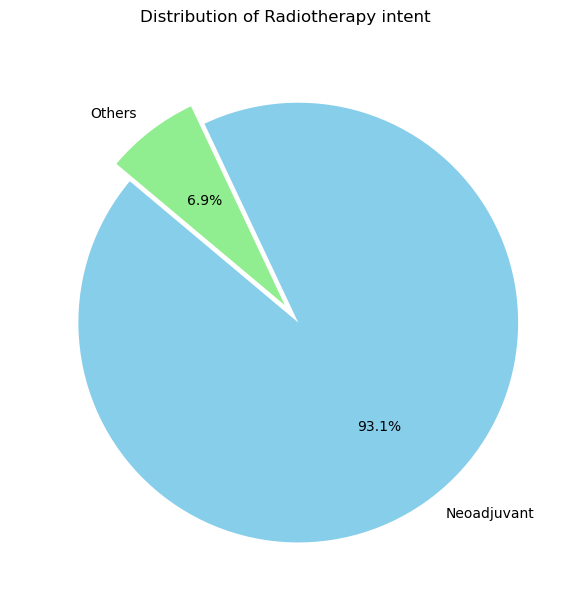

In [175]:
# Combine non-Neoadjuvant intent into 'Others'
sim_rtds_combined_filtered_2['RADIOTHERAPYINTENT'] = sim_rtds_combined_filtered_2['RADIOTHERAPYINTENT'].apply(lambda x: 'Others' if x != 'Neoadjuvant' else x)

# Pie chart for RADIOTHERAPYINTENT
radiotherapy_intent_counts = sim_rtds_combined_filtered_2['RADIOTHERAPYINTENT'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 6))
explode = (0.1, 0)  # explode the "Others" slice
plt.pie(radiotherapy_intent_counts, labels=radiotherapy_intent_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=['skyblue', 'lightgreen'], explode=explode, wedgeprops={'edgecolor': 'none'})
plt.title('Distribution of Radiotherapy intent')

# Show the chart
plt.tight_layout()
plt.show()

In [177]:
# Remove rows with missing RTACTUALFRACTIONS
sim_rtds_combined_filtered_4 = sim_rtds_combined_filtered_2.dropna(subset=['RTACTUALFRACTIONS'])

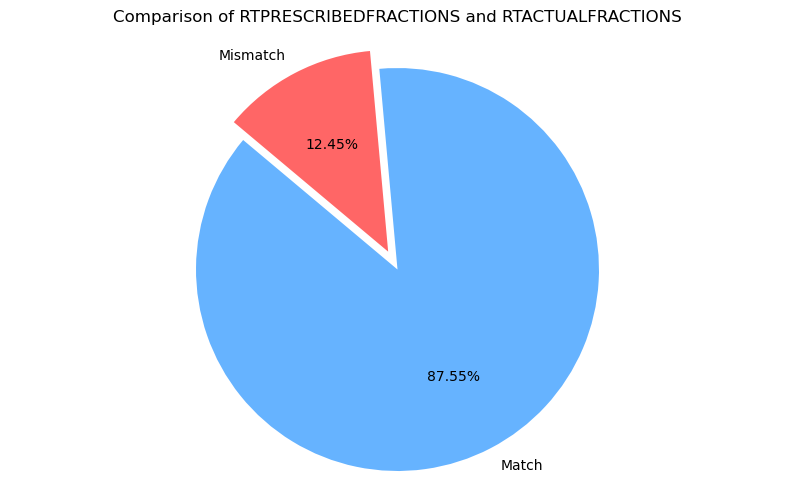

In [178]:
# Calculate match and mismatch percentages
match_percentage = (sim_rtds_combined_filtered_4['RTPRESCRIBEDFRACTIONS'] == sim_rtds_combined_filtered_4['RTACTUALFRACTIONS']).mean() * 100
match_percentage_rounded = round(match_percentage, 2)
mismatch_percentage_rounded = round(100 - match_percentage_rounded, 2)

# Labels and sizes for the pie chart
labels = ['Match', 'Mismatch']
sizes = [match_percentage_rounded, mismatch_percentage_rounded]

# Explode the mismatch section
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Mismatch')

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', startangle=140, colors=['#66b3ff','#ff6666'])
plt.title('Comparison of RTPRESCRIBEDFRACTIONS and RTACTUALFRACTIONS')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [179]:
# Remove rows with missing RTACTUALDOSE
sim_rtds_combined_filtered_8 = sim_rtds_combined_filtered_2.dropna(subset=['RTACTUALDOSE'])

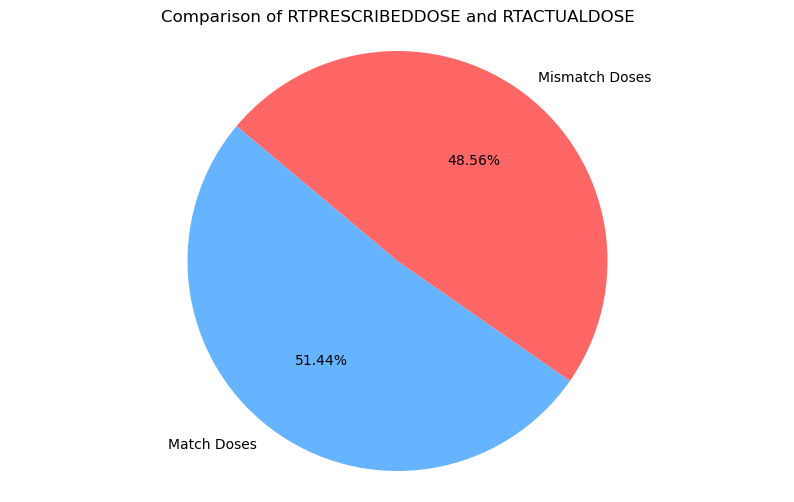

In [180]:
# Calculate match and mismatch percentages
match_percentage_1 = (sim_rtds_combined_filtered_8['RTPRESCRIBEDDOSE'] == sim_rtds_combined_filtered_8['RTACTUALDOSE']).mean() * 100
match_percentage_1_rounded = round(match_percentage_1, 2)
mismatch_percentage_1_rounded = round(100 - match_percentage_1_rounded, 2)

# Labels and sizes for the pie chart
labels = ['Match Doses', 'Mismatch Doses']
sizes = [match_percentage_1_rounded, mismatch_percentage_1_rounded]

# Explode the mismatch section
#explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Mismatch')

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=['#66b3ff','#ff6666'])
plt.title('Comparison of RTPRESCRIBEDDOSE and RTACTUALDOSE')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Prediction Model for Survival

In [186]:
# Drop the columns not needed and read the first few rows of the dataframe

sim_rtds_combined_filtered_3 = sim_rtds_combined_filtered[[
    'PATIENTID', 'PRESCRIPTIONID', 'RTTREATMENTMODALITY', 'RADIOTHERAPYINTENT', 'RTPRESCRIBEDDOSE', 'RTPRESCRIBEDFRACTIONS', 'RTACTUALDOSE',
    'RTACTUALFRACTIONS', 'RADIOTHERAPYEPISODEID', 'LINKCODE', 'RADIOTHERAPYBEAMTYPE', 'RADIOTHERAPYBEAMENERGY'   
]]

sim_rtds_combined_filtered_3.head(3)

,PATIENTID,PRESCRIPTIONID,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYEPISODEID,LINKCODE,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY
0,20115896,20105117,5.0,1.0,30.0,10.0,27.0,10.0,1320017,LCH,T1,6.0
1,20115896,20105117,5.0,1.0,30.0,10.0,27.0,10.0,1320017,LCH,T1,6.0
2,20116066,20105139,5.0,1.0,8.0,1.0,8.0,1.0,1639114,LCF,T1,6.0


In [187]:
# Remove duplicates from the 'sim_rtds_combined_filtered' dataframe
sim_rtds_combined_filtered_3 = sim_rtds_combined_filtered_3.drop_duplicates()

In [188]:
# Drop the columns not needed and read the first few rows of the dataframe

sim_av_patient_filtered_3 = sim_av_patient_filtered[['PATIENTID', 'GENDER', 'ETHNICITY', 'VITALSTATUS', 'VITALSTATUSDATE']]

sim_av_patient_filtered_3.head(3)

,PATIENTID,GENDER,ETHNICITY,VITALSTATUS,VITALSTATUSDATE
273710,10273711,1,X,A,2022-07-05
275817,10275818,1,A,D,2021-10-20
276181,10276182,1,A,D,2020-07-18


In [189]:
# Merge the sim_rtds_combined_filtered_3 dataframe with sim_av_patient_filtered_3 dataframe using left join
merged = sim_rtds_combined_filtered_3.merge(sim_av_patient_filtered_3, on=['PATIENTID'], how='left')

merged.head(3)

,PATIENTID,PRESCRIPTIONID,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYEPISODEID,LINKCODE,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,VITALSTATUSDATE
0,20115896,20105117,5.0,1.0,30.0,10.0,27.0,10.0,1320017,LCH,T1,6.0,1,A,A,2022-07-05
1,20116066,20105139,5.0,1.0,8.0,1.0,8.0,1.0,1639114,LCF,T1,6.0,1,A,A,2022-07-05
2,20118677,20105511,5.0,1.0,8.0,1.0,8.0,1.0,1739799,LOM,T1,6.0,2,A,A,2022-07-05


In [190]:
# Drop the columns not needed and read the first few rows of the dataframe

sim_av_tumour_filtered_3 = sim_av_tumour_filtered[[
    'TUMOURID', 'PATIENTID', 'DIAGNOSISDATEBEST', 'SITE_ICD10_O2', 'MORPH_ICD10_O2', 'BEHAVIOUR_ICD10_O2', 'STAGE_BEST', 'GRADE',
    'AGE'
]]

sim_av_tumour_filtered_3.head(3)

,TUMOURID,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
503240,11340118,10300617,2019-11-02,C504,8520,3,3A,G3,46
503242,11623395,10300637,2018-06-05,C504,8500,3,?,G1,87
503243,10644390,10300641,2019-01-26,C508,8140,3,1A,G2,87


In [191]:
# Identify indices where 'STAGE_BEST' is '?'
rows_to_drop = sim_av_tumour_filtered_3[sim_av_tumour_filtered_3['STAGE_BEST'] == '?'].index

# Drop those rows
sim_av_tumour_filtered_3.drop(rows_to_drop, inplace=True)

In [193]:
# Merge the merge dataframe with sim_av_tumour_filtered_3 dataframe using left join
merged_1 = merged.merge(sim_av_tumour_filtered_3, on=['PATIENTID'], how='left')

merged_1.head(3)

,PATIENTID,PRESCRIPTIONID,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYEPISODEID,LINKCODE,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,20115896,20105117,5.0,1.0,30.0,10.0,27.0,10.0,1320017,LCH,T1,6.0,1,A,A,2022-07-05,10100594.0,2018-06-08,C502,8010.0,3.0,1A,G3,70.0
1,20116066,20105139,5.0,1.0,8.0,1.0,8.0,1.0,1639114,LCF,T1,6.0,1,A,A,2022-07-05,11564495.0,2018-07-16,C504,8500.0,3.0,1A,G1,76.0
2,20116066,20105139,5.0,1.0,8.0,1.0,8.0,1.0,1639114,LCF,T1,6.0,1,A,A,2022-07-05,11542234.0,2018-08-17,C508,8520.0,3.0,2B,G2,67.0


In [194]:
# Check the shape
merged_1.shape

(560167, 24)

In [195]:
# Remove all rows with missing values in place
merged_1.dropna(inplace=True)

In [196]:
# Check the shape
merged_1.shape

(494082, 24)

In [197]:
# Mapping dictionary for ETHNICITY codes
ethnicity_mapping = {
    '0': 'White',
    '8': 'Other',
    'A': 'White',
    'B': 'White',
    'C': 'White',
    'CA': 'White',  
    'CH': 'Asian',
    'CP': 'Asian',
    'D': 'Mixed',
    'E': 'Mixed',
    'F': 'Mixed',
    'G': 'Mixed',
    'H': 'Asian',
    'J': 'Asian',
    'K': 'Asian',
    'L': 'Asian',
    'M': 'Black',
    'N': 'Black',
    'P': 'Black',
    'R': 'Asian',
    'S': 'Other',
    'X': 'Unknown',  
    'Z': 'Unknown'
}

# Replace codes in the ETHNICITY column using the mapping
merged_1['ETHNICITY'] = merged_1['ETHNICITY'].replace(ethnicity_mapping)

# Display the first few rows to confirm the changes
merged_1.head(3)

,PATIENTID,PRESCRIPTIONID,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYEPISODEID,LINKCODE,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,VITALSTATUSDATE
0,20115896,20105117,5.0,1.0,30.0,10.0,27.0,10.0,1320017,LCH,T1,6.0,1,White,A,2022-07-05
1,20116066,20105139,5.0,1.0,8.0,1.0,8.0,1.0,1639114,LCF,T1,6.0,1,White,A,2022-07-05
2,20118677,20105511,5.0,1.0,8.0,1.0,8.0,1.0,1739799,LOM,T1,6.0,2,White,A,2022-07-05


In [198]:
# Get unique values in the 'GENDER' column
unique_vital = sim_av_patient_filtered['VITALSTATUS'].unique()

# Display the unique values
print(unique_vital)

['A' 'D' 'D5' 'X5' 'D4' 'X4' 'X2']


In [228]:
# Get unique values in the 'RTTREATMENTMODALITY' column
unique_modality = merged_1['RTTREATMENTMODALITY'].unique()

# Display the unique modality
print(unique_modality)

[5. 6.]


In [230]:
# Define the mapping dictionaries
treatment_modality = {
    5: 'Teletherapy',
    6: 'Brachytherapy'
}



# Map the codes to descriptions in the DataFrame
merged_1['RTTREATMENTMODALITY'] = merged_1['RTTREATMENTMODALITY'].map(treatment_modality)

# Display the first few rows to confirm the changes
merged_1.head(3)

,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,Teletherapy,1.0,30.0,10.0,27.0,10.0,T1,6.0,Male,White,A,C502,8010,3,1A,G3,70.0
1,Teletherapy,1.0,8.0,1.0,8.0,1.0,T1,6.0,Male,White,A,C504,8500,3,1A,G1,76.0
2,Teletherapy,1.0,8.0,1.0,8.0,1.0,T1,6.0,Male,White,A,C508,8520,3,2B,G2,67.0


In [231]:
# Get unique values in the 'RADIOTHERAPYINTENT' column
radiotherapy_intent = merged_1['RADIOTHERAPYINTENT'].unique()

# Display the radiotherapy intent
print(radiotherapy_intent)

[1. 2. 3.]


In [232]:
# Define the mapping dictionaries
radiotherapy_intent = {
    1: 'Adjuvant',
    2: 'Neoadjuvant',
    3: 'Radical'
}



# Map the codes to descriptions in the DataFrame
merged_1['RADIOTHERAPYINTENT'] = merged_1['RADIOTHERAPYINTENT'].map(radiotherapy_intent)

# Display the first few rows to confirm the changes
merged_1.head(3)

,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,Teletherapy,Adjuvant,30.0,10.0,27.0,10.0,T1,6.0,Male,White,A,C502,8010,3,1A,G3,70.0
1,Teletherapy,Adjuvant,8.0,1.0,8.0,1.0,T1,6.0,Male,White,A,C504,8500,3,1A,G1,76.0
2,Teletherapy,Adjuvant,8.0,1.0,8.0,1.0,T1,6.0,Male,White,A,C508,8520,3,2B,G2,67.0


In [199]:
# Filter the dataframe to keep only rows where VITALSTATUS is 'A' or 'D'
merged_1 = merged_1[merged_1['VITALSTATUS'].isin(['A', 'D'])]

# Display the first few rows to verify the changes
merged_1.head(3)

,PATIENTID,PRESCRIPTIONID,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYEPISODEID,LINKCODE,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,20115896,20105117,5.0,1.0,30.0,10.0,27.0,10.0,1320017,LCH,T1,6.0,1,A,A,2022-07-05,10100594.0,2018-06-08,C502,8010.0,3.0,1A,G3,70.0
1,20116066,20105139,5.0,1.0,8.0,1.0,8.0,1.0,1639114,LCF,T1,6.0,1,A,A,2022-07-05,11564495.0,2018-07-16,C504,8500.0,3.0,1A,G1,76.0
2,20116066,20105139,5.0,1.0,8.0,1.0,8.0,1.0,1639114,LCF,T1,6.0,1,A,A,2022-07-05,11542234.0,2018-08-17,C508,8520.0,3.0,2B,G2,67.0


In [201]:
# Check the shape
merged_1.shape

(493485, 24)

In [236]:
# Define the mapping dictionaries
vital_status = {
    'A': 'Alive',
    'D': 'Dead'
}



# Map the codes to descriptions in the DataFrame
merged_1['VITALSTATUS'] = merged_1['VITALSTATUS'].map(vital_status)

# Display the first few rows to confirm the changes
merged_1.head(2)

,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,Teletherapy,Adjuvant,30.0,10.0,27.0,10.0,T1,6.0,Male,White,Alive,C502,8010,3,1A,G3,70.0
1,Teletherapy,Adjuvant,8.0,1.0,8.0,1.0,T1,6.0,Male,White,Alive,C504,8500,3,1A,G1,76.0


In [237]:
merged_3 = merged_1

In [202]:
# Check the 'VITALSTATUS_counts' 0 & 1 ratio

VITALSTATUS_counts = merged_1['VITALSTATUS'].value_counts()

VITALSTATUS_counts

A    413713
D     79772
Name: VITALSTATUS, dtype: int64

In [203]:
# Columns to drop
columns_to_drop = [
    'PATIENTID', 
    'PRESCRIPTIONID', 
    'RADIOTHERAPYEPISODEID', 
    'LINKCODE', 
    'VITALSTATUSDATE', 
    'TUMOURID', 
    'DIAGNOSISDATEBEST', 
]

# Drop the specified columns
merged_1 = merged_1.drop(columns=columns_to_drop)

In [204]:
# Check the head row
merged_1.head(3)

,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,5.0,1.0,30.0,10.0,27.0,10.0,T1,6.0,1,A,A,C502,8010.0,3.0,1A,G3,70.0
1,5.0,1.0,8.0,1.0,8.0,1.0,T1,6.0,1,A,A,C504,8500.0,3.0,1A,G1,76.0
2,5.0,1.0,8.0,1.0,8.0,1.0,T1,6.0,1,A,A,C508,8520.0,3.0,2B,G2,67.0


In [205]:
# Check the shape
merged_1.shape

(493485, 17)

In [206]:
# Mapping dictionary for ETHNICITY codes
ethnicity_mapping = {
    '0': 'White',
    '8': 'Other',
    'A': 'White',
    'B': 'White',
    'C': 'White',
    'CA': 'White',  
    'CH': 'Asian',
    'CP': 'Asian',
    'D': 'Mixed',
    'E': 'Mixed',
    'F': 'Mixed',
    'G': 'Mixed',
    'H': 'Asian',
    'J': 'Asian',
    'K': 'Asian',
    'L': 'Asian',
    'M': 'Black',
    'N': 'Black',
    'P': 'Black',
    'R': 'Asian',
    'S': 'Other',
    'X': 'Unknown',  
    'Z': 'Unknown'
}

# Replace codes in the ETHNICITY column using the mapping
merged_1['ETHNICITY'] = merged_1['ETHNICITY'].replace(ethnicity_mapping)

# Display the first few rows to confirm the changes
merged_1.head(3)

,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,5.0,1.0,30.0,10.0,27.0,10.0,T1,6.0,1,White,A,C502,8010.0,3.0,1A,G3,70.0
1,5.0,1.0,8.0,1.0,8.0,1.0,T1,6.0,1,White,A,C504,8500.0,3.0,1A,G1,76.0
2,5.0,1.0,8.0,1.0,8.0,1.0,T1,6.0,1,White,A,C508,8520.0,3.0,2B,G2,67.0


In [210]:
# Convert both columns to integer type
merged_1[['MORPH_ICD10_O2', 'BEHAVIOUR_ICD10_O2']] = merged_1[['MORPH_ICD10_O2', 'BEHAVIOUR_ICD10_O2']].astype(int)

In [211]:
# Display the first few rows to confirm the changes
merged_1.head(3)

,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,5.0,1.0,30.0,10.0,27.0,10.0,T1,6.0,1,White,A,C502,8010,3,1A,G3,70.0
1,5.0,1.0,8.0,1.0,8.0,1.0,T1,6.0,1,White,A,C504,8500,3,1A,G1,76.0
2,5.0,1.0,8.0,1.0,8.0,1.0,T1,6.0,1,White,A,C508,8520,3,2B,G2,67.0


In [214]:
# Define the mapping dictionaries
gender_mapping_1 = {
    1: 'Male',
    2: 'Female'
}



# Map the codes to descriptions in the DataFrame
merged_1['GENDER'] = merged_1['GENDER'].map(gender_mapping_1)

# Display the first few rows to confirm the changes
merged_1.head(3)

,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTPRESCRIBEDDOSE,RTPRESCRIBEDFRACTIONS,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,5.0,1.0,30.0,10.0,27.0,10.0,T1,6.0,Male,White,A,C502,8010,3,1A,G3,70.0
1,5.0,1.0,8.0,1.0,8.0,1.0,T1,6.0,Male,White,A,C504,8500,3,1A,G1,76.0
2,5.0,1.0,8.0,1.0,8.0,1.0,T1,6.0,Male,White,A,C508,8520,3,2B,G2,67.0


In [215]:
merged_2 = merged_1

In [238]:
# Columns to drop
columns_to_drop_1 = [
    'RTPRESCRIBEDDOSE', 
    'RTPRESCRIBEDFRACTIONS', 
]

# Drop the specified columns
merged_3 = merged_3.drop(columns=columns_to_drop_1)

In [239]:
merged_3.head(2)

,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,Teletherapy,Adjuvant,27.0,10.0,T1,6.0,Male,White,Alive,C502,8010,3,1A,G3,70.0
1,Teletherapy,Adjuvant,8.0,1.0,T1,6.0,Male,White,Alive,C504,8500,3,1A,G1,76.0


In [240]:
# Get unique values in the 'BEHAVIOUR_ICD10_O2' column
behaviour_icd10_02 = merged_3['BEHAVIOUR_ICD10_O2'].unique()

# Display the behaviour_icd10_02
print(behaviour_icd10_02)

[3 5 9 0 1 2]


In [241]:
# Mapping dictionary for BEHAVIOUR_ICD10_O2 codes
behaviour_icd10_02_mapping = {
    0: 'Benign',
    1: 'Uncertain',
    2: 'Insitu',
    3: 'Malignant',
    5: 'Microinvasive',
    6: 'Malignant',
    9: 'Malignant' 
    
}

# Replace codes in the BEHAVIOUR_ICD10_O2 column using the mapping
merged_3['BEHAVIOUR_ICD10_O2'] = merged_3['BEHAVIOUR_ICD10_O2'].replace(behaviour_icd10_02_mapping)

# Display the first few rows to confirm the changes
merged_3.head(3)

,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,Teletherapy,Adjuvant,27.0,10.0,T1,6.0,Male,White,Alive,C502,8010,Malignant,1A,G3,70.0
1,Teletherapy,Adjuvant,8.0,1.0,T1,6.0,Male,White,Alive,C504,8500,Malignant,1A,G1,76.0
2,Teletherapy,Adjuvant,8.0,1.0,T1,6.0,Male,White,Alive,C508,8520,Malignant,2B,G2,67.0


In [242]:
# Get unique values in the 'GRADE' column
grade = merged_3['GRADE'].unique()

# Display the grade
print(grade)

['G3' 'G1' 'G2' 'GX' 'GH' 'G4' 'GL' 'GI' 'G']


In [243]:
# Mapping dictionary for GRADE codes
grade_mapping = {
    'G': 'Borderline malignancy',
    'G1': 'Well differentiated',
    'G2': 'Moderately differentiated',
    'G3': 'Poorly differentiated',
    'G4': 'Undifferentiated',
    'GH': 'High',  
    'GI': 'Intermediate',
    'GL': 'Low',
    'GX': 'Uncertain'
}

# Replace codes in the ETHNICITY column using the mapping
merged_3['GRADE'] = merged_3['GRADE'].replace(grade_mapping)

# Display the first few rows to confirm the changes
merged_3.head(3)

,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,Teletherapy,Adjuvant,27.0,10.0,T1,6.0,Male,White,Alive,C502,8010,Malignant,1A,Poorly differentiated,70.0
1,Teletherapy,Adjuvant,8.0,1.0,T1,6.0,Male,White,Alive,C504,8500,Malignant,1A,Well differentiated,76.0
2,Teletherapy,Adjuvant,8.0,1.0,T1,6.0,Male,White,Alive,C508,8520,Malignant,2B,Moderately differentiated,67.0


In [244]:
# Get unique values in the 'GRADE' column
radiotherapybeamtype = merged_3['RADIOTHERAPYBEAMTYPE'].unique()

# Display the grade
print(radiotherapybeamtype)

['T1' 'T7' 'T2' 'T3' 'T4' 'T8' 'T6']


In [245]:
# Mapping dictionary for RADIOTHERAPYBEAMTYPE codes
radiotherapybeamtype_mapping = {
    'T1': 'Photons',
    'T2': 'Electrons',
    'T3': 'Other',
    'T4': 'Photon and Electron',
    'T6': 'Electron and Other',
    'T7': 'Photon Electron and Other',  
    'T8': 'Proton Only'
}

# Replace codes in the ETHNICITY column using the mapping
merged_3['RADIOTHERAPYBEAMTYPE'] = merged_3['RADIOTHERAPYBEAMTYPE'].replace(radiotherapybeamtype_mapping)

# Display the first few rows to confirm the changes
merged_3.head(3)

,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,Teletherapy,Adjuvant,27.0,10.0,Photons,6.0,Male,White,Alive,C502,8010,Malignant,1A,Poorly differentiated,70.0
1,Teletherapy,Adjuvant,8.0,1.0,Photons,6.0,Male,White,Alive,C504,8500,Malignant,1A,Well differentiated,76.0
2,Teletherapy,Adjuvant,8.0,1.0,Photons,6.0,Male,White,Alive,C508,8520,Malignant,2B,Moderately differentiated,67.0


In [247]:
# Convert age column to integer type
merged_3[['AGE']] = merged_3[['AGE']].astype(int)

In [248]:
merged_3.head(2)

,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,Teletherapy,Adjuvant,27.0,10.0,Photons,6.0,Male,White,Alive,C502,8010,Malignant,1A,Poorly differentiated,70
1,Teletherapy,Adjuvant,8.0,1.0,Photons,6.0,Male,White,Alive,C504,8500,Malignant,1A,Well differentiated,76


In [249]:
# Get unique values in the 'STAGE_BEST' column
stage_best = merged_3['STAGE_BEST'].unique()

# Display the stage_best
print(stage_best)

['1A' '2B' '2A' '4' '3A' '0' '3C' '3B' '1B' 'U' '3' '1' '2' '2A1' '4B'
 '4A' '4C' '1C' '1C2' '1A1' '1A2' '1A3' 'A' '2C']


In [253]:
# Mapping dictionary for STAGE_BEST codes
stage_best_mapping = {
     0: 'Stage 0',
     1: 'Stage 1',
     2: 'Stage 2',
     3: 'Stage 3',
     4: 'Stage 4',
    'A': 'RaiBinet stage',
    '1A': 'Stage 1',
    '1A1': 'Stage 1',  
    '1A2': 'Stage 1',
    '1A3': 'Stage 1',
    '1B': 'Stage 1',
    '1C': 'Stage 1',
    '1C2': 'Stage 1',
    '2A': 'Stage 2',
    '2A1': 'Stage 2',
    '2B': 'Stage 2',
    '2C': 'Stage 2',  
    '3A': 'Stage 3',
    '3B': 'Stage 3',
    '3C': 'Stage 3',
    '4A': 'Stage 4',
    '4B': 'Stage 4',
    '4C': 'Stage 4',
    'U': 'Unstageable'  
    
}

# Replace codes in the STAGE_BEST column using the mapping
merged_3['STAGE_BEST'] = merged_3['STAGE_BEST'].replace(stage_best_mapping)

# Display the first few rows to confirm the changes
merged_3.head(2)

,RTTREATMENTMODALITY,RADIOTHERAPYINTENT,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYBEAMTYPE,RADIOTHERAPYBEAMENERGY,GENDER,ETHNICITY,VITALSTATUS,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE
0,Teletherapy,Adjuvant,27.0,10.0,Photons,6.0,Male,White,Alive,C502,8010,Malignant,Stage 1,Poorly differentiated,70
1,Teletherapy,Adjuvant,8.0,1.0,Photons,6.0,Male,White,Alive,C504,8500,Malignant,Stage 1,Well differentiated,76


In [217]:
# List of categorical columns to encode for merged_1
categorical_columns = ['RADIOTHERAPYBEAMTYPE', 'GENDER', 'ETHNICITY', 'SITE_ICD10_O2', 'MORPH_ICD10_O2', 'BEHAVIOUR_ICD10_O2', 'STAGE_BEST', 'GRADE']

In [254]:
# List of categorical columns to encode for merged_3
categorical_columns_3 = ['RTTREATMENTMODALITY', 'RADIOTHERAPYINTENT', 'RADIOTHERAPYBEAMTYPE', 'GENDER', 'ETHNICITY', 'SITE_ICD10_O2', 'MORPH_ICD10_O2', 'BEHAVIOUR_ICD10_O2', 'STAGE_BEST', 'GRADE']

In [255]:
# Perform one-hot encoding
merged_3 = pd.get_dummies(merged_3, columns=categorical_columns_3)

# Convert boolean columns to integers (0 and 1)
boolean_columns = merged_3.select_dtypes(include='bool').columns
merged_3[boolean_columns] = merged_3[boolean_columns].astype(int)

# Display the first few rows to confirm the changes
merged_3.head(2)

,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYBEAMENERGY,VITALSTATUS,AGE,RTTREATMENTMODALITY_Brachytherapy,RTTREATMENTMODALITY_Teletherapy,RADIOTHERAPYINTENT_Adjuvant,RADIOTHERAPYINTENT_Neoadjuvant,RADIOTHERAPYINTENT_Radical,RADIOTHERAPYBEAMTYPE_Electron and Other,RADIOTHERAPYBEAMTYPE_Electrons,RADIOTHERAPYBEAMTYPE_Other,RADIOTHERAPYBEAMTYPE_Photon Electron and Other,RADIOTHERAPYBEAMTYPE_Photon and Electron,RADIOTHERAPYBEAMTYPE_Photons,RADIOTHERAPYBEAMTYPE_Proton Only,GENDER_Female,GENDER_Male,ETHNICITY_Asian,ETHNICITY_Black,ETHNICITY_Mixed,ETHNICITY_Other,ETHNICITY_Unknown,ETHNICITY_White,SITE_ICD10_O2_C500,SITE_ICD10_O2_C501,SITE_ICD10_O2_C502,SITE_ICD10_O2_C503,SITE_ICD10_O2_C504,SITE_ICD10_O2_C505,SITE_ICD10_O2_C506,SITE_ICD10_O2_C508,SITE_ICD10_O2_C509,MORPH_ICD10_O2_8000,MORPH_ICD10_O2_8001,MORPH_ICD10_O2_8010,MORPH_ICD10_O2_8012,MORPH_ICD10_O2_8020,MORPH_ICD10_O2_8022,MORPH_ICD10_O2_8032,MORPH_ICD10_O2_8033,MORPH_ICD10_O2_8041,MORPH_ICD10_O2_8070,MORPH_ICD10_O2_8071,MORPH_ICD10_O2_8077,MORPH_ICD10_O2_8090,MORPH_ICD10_O2_8130,MORPH_ICD10_O2_8140,MORPH_ICD10_O2_8160,MORPH_ICD10_O2_8162,MORPH_ICD10_O2_8200,MORPH_ICD10_O2_8201,MORPH_ICD10_O2_8210,MORPH_ICD10_O2_8211,MORPH_ICD10_O2_8230,MORPH_ICD10_O2_8240,MORPH_ICD10_O2_8246,MORPH_ICD10_O2_8260,MORPH_ICD10_O2_8263,MORPH_ICD10_O2_8310,MORPH_ICD10_O2_8315,MORPH_ICD10_O2_8323,MORPH_ICD10_O2_8330,MORPH_ICD10_O2_8340,MORPH_ICD10_O2_8380,MORPH_ICD10_O2_8401,MORPH_ICD10_O2_8430,MORPH_ICD10_O2_8440,MORPH_ICD10_O2_8441,MORPH_ICD10_O2_8461,MORPH_ICD10_O2_8462,MORPH_ICD10_O2_8470,MORPH_ICD10_O2_8472,MORPH_ICD10_O2_8480,MORPH_ICD10_O2_8481,MORPH_ICD10_O2_8490,MORPH_ICD10_O2_8500,MORPH_ICD10_O2_8501,MORPH_ICD10_O2_8502,MORPH_ICD10_O2_8503,MORPH_ICD10_O2_8504,MORPH_ICD10_O2_8510,MORPH_ICD10_O2_8520,MORPH_ICD10_O2_8521,MORPH_ICD10_O2_8522,MORPH_ICD10_O2_8530,MORPH_ICD10_O2_8540,MORPH_ICD10_O2_8541,MORPH_ICD10_O2_8543,MORPH_ICD10_O2_8550,MORPH_ICD10_O2_8560,MORPH_ICD10_O2_8570,MORPH_ICD10_O2_8572,MORPH_ICD10_O2_8573,MORPH_ICD10_O2_8580,MORPH_ICD10_O2_8620,MORPH_ICD10_O2_8742,MORPH_ICD10_O2_8743,MORPH_ICD10_O2_8800,MORPH_ICD10_O2_8801,MORPH_ICD10_O2_8802,MORPH_ICD10_O2_8810,MORPH_ICD10_O2_8811,MORPH_ICD10_O2_8850,MORPH_ICD10_O2_8890,MORPH_ICD10_O2_8982,MORPH_ICD10_O2_8990,MORPH_ICD10_O2_9020,MORPH_ICD10_O2_9120,MORPH_ICD10_O2_9180,MORPH_ICD10_O2_9182,MORPH_ICD10_O2_9380,MORPH_ICD10_O2_9440,MORPH_ICD10_O2_9451,MORPH_ICD10_O2_9510,MORPH_ICD10_O2_9530,MORPH_ICD10_O2_9540,MORPH_ICD10_O2_9561,MORPH_ICD10_O2_9590,MORPH_ICD10_O2_9591,MORPH_ICD10_O2_9691,MORPH_ICD10_O2_9714,MORPH_ICD10_O2_9950,MORPH_ICD10_O2_9960,BEHAVIOUR_ICD10_O2_Benign,BEHAVIOUR_ICD10_O2_Insitu,BEHAVIOUR_ICD10_O2_Malignant,BEHAVIOUR_ICD10_O2_Microinvasive,BEHAVIOUR_ICD10_O2_Uncertain,STAGE_BEST_0,STAGE_BEST_1,STAGE_BEST_2,STAGE_BEST_3,STAGE_BEST_4,STAGE_BEST_RaiBinet stage,STAGE_BEST_Stage 1,STAGE_BEST_Stage 2,STAGE_BEST_Stage 3,STAGE_BEST_Stage 4,STAGE_BEST_Unstageable,GRADE_Borderline malignancy,GRADE_High,GRADE_Intermediate,GRADE_Low,GRADE_Moderately differentiated,GRADE_Poorly differentiated,GRADE_Uncertain,GRADE_Undifferentiated,GRADE_Well differentiated
0,27.0,10.0,6.0,Alive,70,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,8.0,1.0,6.0,Alive,76,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [219]:
# Create a dictionary to map the values
category_mapping = {'A': 0, 'D': 1}
# A: Alive, D: Dead

# Replace the values in the 'VITALSTATUS' column
merged_2['VITALSTATUS'] = merged_2['VITALSTATUS'].replace(category_mapping)

In [256]:
# Create a dictionary to map the values
category_mapping = {'Alive': 0, 'Dead': 1}

# Replace the values in the 'VITALSTATUS' column
merged_3['VITALSTATUS'] = merged_3['VITALSTATUS'].replace(category_mapping)

In [225]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = merged_2[merged_2['VITALSTATUS'] == 0]
minority_class = merged_2[merged_2['VITALSTATUS'] == 1]

# Sample the minority class to match the number of samples in the majority class (upsampling)
minority_upsampled = resample(minority_class,
                              replace=True,   # With replacement to duplicate samples
                              n_samples=len(majority_class),  # Number of samples to match majority class
                              random_state=42)  # Set random seed for reproducibility

# Combine the upsampled minority class with the majority class to create the balanced dataset
bal_data = pd.concat([majority_class, minority_upsampled])

# Shuffle the data to avoid any ordering biases
bal_data = bal_data.sample(frac=1, random_state=42)

# Separate features (X) and target (y)
x_bal = bal_data.drop(['VITALSTATUS'], axis=1)
y_bal = bal_data['VITALSTATUS']

In [257]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = merged_3[merged_3['VITALSTATUS'] == 0]
minority_class = merged_3[merged_3['VITALSTATUS'] == 1]

# Sample the minority class to match the number of samples in the majority class (upsampling)
minority_upsampled = resample(minority_class,
                              replace=True,   # With replacement to duplicate samples
                              n_samples=len(majority_class),  # Number of samples to match majority class
                              random_state=42)  # Set random seed for reproducibility

# Combine the upsampled minority class with the majority class to create the balanced dataset
bal_data = pd.concat([majority_class, minority_upsampled])

# Shuffle the data to avoid any ordering biases
bal_data = bal_data.sample(frac=1, random_state=42)

# Separate features (X) and target (y)
x_bal = bal_data.drop(['VITALSTATUS'], axis=1)
y_bal = bal_data['VITALSTATUS']

In [226]:
# Building 2 Models for merged_1- 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data into training and testing sets
x_bal_train, x_bal_test, y_bal_train, y_bal_test = train_test_split(x_bal, y_bal, test_size=0.2, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
x_bal_train_scaled = scaler.fit_transform(x_bal_train)

# Transform the testing data using the scaler fitted on the training data
x_bal_test_scaled = scaler.transform(x_bal_test)

# Train and evaluate different models

models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

for name, model in models.items():
    model.fit(x_bal_train_scaled, y_bal_train)
    
    y_bal_pred_train = model.predict(x_bal_train_scaled)
    y_bal_pred_test = model.predict(x_bal_test_scaled)
    
    train_accuracy = accuracy_score(y_bal_train, y_bal_pred_train)
    test_accuracy = accuracy_score(y_bal_test, y_bal_pred_test)
    
    print(f"{name} Train Accuracy: {train_accuracy:.4f}")
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")
    print()

DecisionTree Train Accuracy: 0.9689
DecisionTree Test Accuracy: 0.9509

LogisticRegression Train Accuracy: 0.7367
LogisticRegression Test Accuracy: 0.7374



In [325]:
# Building 2 Models for merged_3- 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data into training and testing sets
x_bal_train, x_bal_test, y_bal_train, y_bal_test = train_test_split(x_bal, y_bal, test_size=0.2, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
x_bal_train_scaled = scaler.fit_transform(x_bal_train)

# Transform the testing data using the scaler fitted on the training data
x_bal_test_scaled = scaler.transform(x_bal_test)

# Train and evaluate different models

models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

for name, model in models.items():
    model.fit(x_bal_train_scaled, y_bal_train)
    
    y_bal_pred_train = model.predict(x_bal_train_scaled)
    y_bal_pred_test = model.predict(x_bal_test_scaled)
    
    train_accuracy = accuracy_score(y_bal_train, y_bal_pred_train)
    test_accuracy = accuracy_score(y_bal_test, y_bal_pred_test)
    
    print(f"{name} Train Accuracy: {train_accuracy:.4f}")
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")
    print()

DecisionTree Train Accuracy: 0.9594
DecisionTree Test Accuracy: 0.9386

LogisticRegression Train Accuracy: 0.7317
LogisticRegression Test Accuracy: 0.7324



In [259]:
merged_3.shape

(493485, 150)

In [227]:
# Carrying out cross-validation on the models after outliers removal - CV = 5 for merged_1


# Train and evaluate different models

models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

for name, model in models.items():
    model.fit(x_bal_train_scaled, y_bal_train)

    # Perform cross-validation with k=5
    cv_accuracy = cross_val_score(model, x_bal_train_scaled, y_bal_train, cv=5, scoring='accuracy')
    mean_cv_accuracy = np.mean(cv_accuracy)
    
    print(f"{name} Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")
    print()

DecisionTree Cross-Validation Accuracy: 0.9418

LogisticRegression Cross-Validation Accuracy: 0.7367



In [260]:
# Carrying out cross-validation on the models after outliers removal - CV = 5 for merged_3


# Train and evaluate different models

models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

for name, model in models.items():
    model.fit(x_bal_train_scaled, y_bal_train)

    # Perform cross-validation with k=5
    cv_accuracy = cross_val_score(model, x_bal_train_scaled, y_bal_train, cv=5, scoring='accuracy')
    mean_cv_accuracy = np.mean(cv_accuracy)
    
    print(f"{name} Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")
    print()

DecisionTree Cross-Validation Accuracy: 0.9294

LogisticRegression Cross-Validation Accuracy: 0.7316



In [326]:
# for merged_3

import joblib

# Convert them to DataFrames with column names
x_balanced_1_train = pd.DataFrame(x_bal_train)
x_balanced_1_test = pd.DataFrame(x_bal_test)

# Select the features 
selected_features = [
    'RTACTUALDOSE', 'RTACTUALFRACTIONS', 'RADIOTHERAPYBEAMENERGY', 'AGE',
    'RTTREATMENTMODALITY_Brachytherapy', 'RTTREATMENTMODALITY_Teletherapy', 'RADIOTHERAPYINTENT_Adjuvant', 'RADIOTHERAPYINTENT_Neoadjuvant', 'RADIOTHERAPYINTENT_Radical',
    'RADIOTHERAPYBEAMTYPE_Electron and Other', 'RADIOTHERAPYBEAMTYPE_Electrons', 'RADIOTHERAPYBEAMTYPE_Other', 'RADIOTHERAPYBEAMTYPE_Photon Electron and Other', 'RADIOTHERAPYBEAMTYPE_Photon and Electron',
    'RADIOTHERAPYBEAMTYPE_Photons', 'RADIOTHERAPYBEAMTYPE_Proton Only', 'GENDER_Female', 'GENDER_Male', 'ETHNICITY_Asian',
    'ETHNICITY_Black', 'ETHNICITY_Mixed', 'ETHNICITY_Other', 'ETHNICITY_Unknown', 'ETHNICITY_White',
    'SITE_ICD10_O2_C500', 'SITE_ICD10_O2_C501', 'SITE_ICD10_O2_C502', 'SITE_ICD10_O2_C503', 'SITE_ICD10_O2_C504',
    'SITE_ICD10_O2_C505', 'SITE_ICD10_O2_C506', 'SITE_ICD10_O2_C508', 'SITE_ICD10_O2_C509', 'MORPH_ICD10_O2_8000',
    'MORPH_ICD10_O2_8001', 'MORPH_ICD10_O2_8010', 'MORPH_ICD10_O2_8012', 'MORPH_ICD10_O2_8020', 'MORPH_ICD10_O2_8022',
    'MORPH_ICD10_O2_8032', 'MORPH_ICD10_O2_8033', 'MORPH_ICD10_O2_8041', 'MORPH_ICD10_O2_8070', 'MORPH_ICD10_O2_8071',
    'MORPH_ICD10_O2_8077', 'MORPH_ICD10_O2_8090', 'MORPH_ICD10_O2_8130', 'MORPH_ICD10_O2_8140', 'MORPH_ICD10_O2_8160',
    'MORPH_ICD10_O2_8162', 'MORPH_ICD10_O2_8200', 'MORPH_ICD10_O2_8201', 'MORPH_ICD10_O2_8210', 'MORPH_ICD10_O2_8211',
    'MORPH_ICD10_O2_8230', 'MORPH_ICD10_O2_8240', 'MORPH_ICD10_O2_8246', 'MORPH_ICD10_O2_8260', 'MORPH_ICD10_O2_8263',
    'MORPH_ICD10_O2_8310', 'MORPH_ICD10_O2_8315', 'MORPH_ICD10_O2_8323', 'MORPH_ICD10_O2_8330', 'MORPH_ICD10_O2_8340',
    'MORPH_ICD10_O2_8380', 'MORPH_ICD10_O2_8401', 'MORPH_ICD10_O2_8430', 'MORPH_ICD10_O2_8440', 'MORPH_ICD10_O2_8441',
    'MORPH_ICD10_O2_8461', 'MORPH_ICD10_O2_8462', 'MORPH_ICD10_O2_8470', 'MORPH_ICD10_O2_8472', 'MORPH_ICD10_O2_8480',
    'MORPH_ICD10_O2_8481', 'MORPH_ICD10_O2_8490', 'MORPH_ICD10_O2_8500', 'MORPH_ICD10_O2_8501', 'MORPH_ICD10_O2_8502',
    'MORPH_ICD10_O2_8503', 'MORPH_ICD10_O2_8504', 'MORPH_ICD10_O2_8510', 'MORPH_ICD10_O2_8520', 'MORPH_ICD10_O2_8521',
    'MORPH_ICD10_O2_8522', 'MORPH_ICD10_O2_8530', 'MORPH_ICD10_O2_8540', 'MORPH_ICD10_O2_8541', 'MORPH_ICD10_O2_8543',
    'MORPH_ICD10_O2_8550', 'MORPH_ICD10_O2_8560', 'MORPH_ICD10_O2_8570', 'MORPH_ICD10_O2_8572', 'MORPH_ICD10_O2_8573',
    'MORPH_ICD10_O2_8580', 'MORPH_ICD10_O2_8620', 'MORPH_ICD10_O2_8742', 'MORPH_ICD10_O2_8743', 'MORPH_ICD10_O2_8800',
    'MORPH_ICD10_O2_8801', 'MORPH_ICD10_O2_8802', 'MORPH_ICD10_O2_8810', 'MORPH_ICD10_O2_8811', 'MORPH_ICD10_O2_8850',
    'MORPH_ICD10_O2_8890', 'MORPH_ICD10_O2_8982', 'MORPH_ICD10_O2_8990', 'MORPH_ICD10_O2_9020', 'MORPH_ICD10_O2_9120',
    'MORPH_ICD10_O2_9180', 'MORPH_ICD10_O2_9182', 'MORPH_ICD10_O2_9380', 'MORPH_ICD10_O2_9440', 'MORPH_ICD10_O2_9451',
    'MORPH_ICD10_O2_9510', 'MORPH_ICD10_O2_9530', 'MORPH_ICD10_O2_9540', 'MORPH_ICD10_O2_9561', 'MORPH_ICD10_O2_9590',
    'MORPH_ICD10_O2_9591', 'MORPH_ICD10_O2_9691', 'MORPH_ICD10_O2_9714', 'MORPH_ICD10_O2_9950', 'MORPH_ICD10_O2_9960',
    'BEHAVIOUR_ICD10_O2_Benign', 'BEHAVIOUR_ICD10_O2_Insitu', 'BEHAVIOUR_ICD10_O2_Malignant', 'BEHAVIOUR_ICD10_O2_Microinvasive', 'BEHAVIOUR_ICD10_O2_Uncertain',
    'STAGE_BEST_0', 'STAGE_BEST_1', 'STAGE_BEST_2', 'STAGE_BEST_3', 'STAGE_BEST_4',
    'STAGE_BEST_RaiBinet stage', 'STAGE_BEST_Stage 1', 'STAGE_BEST_Stage 2', 'STAGE_BEST_Stage 3', 'STAGE_BEST_Stage 4',
    'STAGE_BEST_Unstageable', 'GRADE_Borderline malignancy', 'GRADE_High', 'GRADE_Intermediate', 'GRADE_Low',
    'GRADE_Moderately differentiated', 'GRADE_Poorly differentiated', 'GRADE_Uncertain', 'GRADE_Undifferentiated', 'GRADE_Well differentiated'
]

x_train_optimal = x_balanced_1_train[selected_features]
x_test_optimal = x_balanced_1_test[selected_features]

# Scale the data using a new StandardScaler fit on the training set with the optimal features
scaler_5 = StandardScaler()
x_train_optimal_scaled = scaler_5.fit_transform(x_train_optimal)
x_test_optimal_scaled = scaler_5.transform(x_test_optimal)

# Save the StandardScaler object to a file using joblib
joblib.dump(scaler_5, 'scaler_5.pkl')

# with open('scaler_30.pkl', 'wb') as file:
#     pickle.dump(scaler_30, file)

# Define your Decision Tree model with any specific parameters if needed
model = DecisionTreeClassifier()  

# Fit the model with the training data
model.fit(x_train_optimal_scaled, y_bal_train)

# Save the model to a joblib file
joblib.dump(model, 'decision_tree_model_5.joblib')
# Make predictions on the test set
y_pred = model.predict(x_test_optimal_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_bal_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9386594636404288


In [296]:
import sklearn
import sys

# Check if scikit-learn version is 1.3.1
required_version = '1.3.1'
if sklearn.__version__ != required_version:
    raise ImportError(f"scikit-learn version {required_version} is required, but version {sklearn.__version__} is installed.")

# Import necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import joblib

# Your existing code
x_train_optimal = x_balanced_1_train[selected_features]
x_test_optimal = x_balanced_1_test[selected_features]

# Scale the data using a new StandardScaler fit on the training set with the optimal features
scaler_3 = StandardScaler()
x_train_optimal_scaled = scaler_3.fit_transform(x_train_optimal)
x_test_optimal_scaled = scaler_3.transform(x_test_optimal)

# Save the StandardScaler object to a file using joblib
joblib.dump(scaler_3, 'scaler_3.pkl')

# Define your Decision Tree model with any specific parameters if needed
model = DecisionTreeClassifier()

# Fit the model with the training data
model.fit(x_train_optimal_scaled, y_bal_train)

# Save the model to a joblib file
joblib.dump(model, 'decision_tree_model_3.joblib')

# Make predictions on the test set
y_pred = model.predict(x_test_optimal_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_bal_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9386352924114426


In [263]:
# Filter the dataframe to get rows where VITALSTATUS is 1
vital_status_3 = merged_3[merged_3['VITALSTATUS'] == 1]

# Print the first five rows of the filtered dataframe
vital_status_3.head(3)

,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYBEAMENERGY,VITALSTATUS,AGE,RTTREATMENTMODALITY_Brachytherapy,RTTREATMENTMODALITY_Teletherapy,RADIOTHERAPYINTENT_Adjuvant,RADIOTHERAPYINTENT_Neoadjuvant,RADIOTHERAPYINTENT_Radical,RADIOTHERAPYBEAMTYPE_Electron and Other,RADIOTHERAPYBEAMTYPE_Electrons,RADIOTHERAPYBEAMTYPE_Other,RADIOTHERAPYBEAMTYPE_Photon Electron and Other,RADIOTHERAPYBEAMTYPE_Photon and Electron,RADIOTHERAPYBEAMTYPE_Photons,RADIOTHERAPYBEAMTYPE_Proton Only,GENDER_Female,GENDER_Male,ETHNICITY_Asian,ETHNICITY_Black,ETHNICITY_Mixed,ETHNICITY_Other,ETHNICITY_Unknown,ETHNICITY_White,SITE_ICD10_O2_C500,SITE_ICD10_O2_C501,SITE_ICD10_O2_C502,SITE_ICD10_O2_C503,SITE_ICD10_O2_C504,SITE_ICD10_O2_C505,SITE_ICD10_O2_C506,SITE_ICD10_O2_C508,SITE_ICD10_O2_C509,MORPH_ICD10_O2_8000,MORPH_ICD10_O2_8001,MORPH_ICD10_O2_8010,MORPH_ICD10_O2_8012,MORPH_ICD10_O2_8020,MORPH_ICD10_O2_8022,MORPH_ICD10_O2_8032,MORPH_ICD10_O2_8033,MORPH_ICD10_O2_8041,MORPH_ICD10_O2_8070,MORPH_ICD10_O2_8071,MORPH_ICD10_O2_8077,MORPH_ICD10_O2_8090,MORPH_ICD10_O2_8130,MORPH_ICD10_O2_8140,MORPH_ICD10_O2_8160,MORPH_ICD10_O2_8162,MORPH_ICD10_O2_8200,MORPH_ICD10_O2_8201,MORPH_ICD10_O2_8210,MORPH_ICD10_O2_8211,MORPH_ICD10_O2_8230,MORPH_ICD10_O2_8240,MORPH_ICD10_O2_8246,MORPH_ICD10_O2_8260,MORPH_ICD10_O2_8263,MORPH_ICD10_O2_8310,MORPH_ICD10_O2_8315,MORPH_ICD10_O2_8323,MORPH_ICD10_O2_8330,MORPH_ICD10_O2_8340,MORPH_ICD10_O2_8380,MORPH_ICD10_O2_8401,MORPH_ICD10_O2_8430,MORPH_ICD10_O2_8440,MORPH_ICD10_O2_8441,MORPH_ICD10_O2_8461,MORPH_ICD10_O2_8462,MORPH_ICD10_O2_8470,MORPH_ICD10_O2_8472,MORPH_ICD10_O2_8480,MORPH_ICD10_O2_8481,MORPH_ICD10_O2_8490,MORPH_ICD10_O2_8500,MORPH_ICD10_O2_8501,MORPH_ICD10_O2_8502,MORPH_ICD10_O2_8503,MORPH_ICD10_O2_8504,MORPH_ICD10_O2_8510,MORPH_ICD10_O2_8520,MORPH_ICD10_O2_8521,MORPH_ICD10_O2_8522,MORPH_ICD10_O2_8530,MORPH_ICD10_O2_8540,MORPH_ICD10_O2_8541,MORPH_ICD10_O2_8543,MORPH_ICD10_O2_8550,MORPH_ICD10_O2_8560,MORPH_ICD10_O2_8570,MORPH_ICD10_O2_8572,MORPH_ICD10_O2_8573,MORPH_ICD10_O2_8580,MORPH_ICD10_O2_8620,MORPH_ICD10_O2_8742,MORPH_ICD10_O2_8743,MORPH_ICD10_O2_8800,MORPH_ICD10_O2_8801,MORPH_ICD10_O2_8802,MORPH_ICD10_O2_8810,MORPH_ICD10_O2_8811,MORPH_ICD10_O2_8850,MORPH_ICD10_O2_8890,MORPH_ICD10_O2_8982,MORPH_ICD10_O2_8990,MORPH_ICD10_O2_9020,MORPH_ICD10_O2_9120,MORPH_ICD10_O2_9180,MORPH_ICD10_O2_9182,MORPH_ICD10_O2_9380,MORPH_ICD10_O2_9440,MORPH_ICD10_O2_9451,MORPH_ICD10_O2_9510,MORPH_ICD10_O2_9530,MORPH_ICD10_O2_9540,MORPH_ICD10_O2_9561,MORPH_ICD10_O2_9590,MORPH_ICD10_O2_9591,MORPH_ICD10_O2_9691,MORPH_ICD10_O2_9714,MORPH_ICD10_O2_9950,MORPH_ICD10_O2_9960,BEHAVIOUR_ICD10_O2_Benign,BEHAVIOUR_ICD10_O2_Insitu,BEHAVIOUR_ICD10_O2_Malignant,BEHAVIOUR_ICD10_O2_Microinvasive,BEHAVIOUR_ICD10_O2_Uncertain,STAGE_BEST_0,STAGE_BEST_1,STAGE_BEST_2,STAGE_BEST_3,STAGE_BEST_4,STAGE_BEST_RaiBinet stage,STAGE_BEST_Stage 1,STAGE_BEST_Stage 2,STAGE_BEST_Stage 3,STAGE_BEST_Stage 4,STAGE_BEST_Unstageable,GRADE_Borderline malignancy,GRADE_High,GRADE_Intermediate,GRADE_Low,GRADE_Moderately differentiated,GRADE_Poorly differentiated,GRADE_Uncertain,GRADE_Undifferentiated,GRADE_Well differentiated
10,8.0,1.0,6.0,1,58,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
26,30.0,2.0,6.0,1,52,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
93,26.0,14.0,6.0,1,83,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [264]:
# Filter the dataframe to get rows where VITALSTATUS is 1
vital_status_3 = merged_3[merged_3['VITALSTATUS'] == 0]

# Print the first five rows of the filtered dataframe
vital_status_3.head(3)

,RTACTUALDOSE,RTACTUALFRACTIONS,RADIOTHERAPYBEAMENERGY,VITALSTATUS,AGE,RTTREATMENTMODALITY_Brachytherapy,RTTREATMENTMODALITY_Teletherapy,RADIOTHERAPYINTENT_Adjuvant,RADIOTHERAPYINTENT_Neoadjuvant,RADIOTHERAPYINTENT_Radical,RADIOTHERAPYBEAMTYPE_Electron and Other,RADIOTHERAPYBEAMTYPE_Electrons,RADIOTHERAPYBEAMTYPE_Other,RADIOTHERAPYBEAMTYPE_Photon Electron and Other,RADIOTHERAPYBEAMTYPE_Photon and Electron,RADIOTHERAPYBEAMTYPE_Photons,RADIOTHERAPYBEAMTYPE_Proton Only,GENDER_Female,GENDER_Male,ETHNICITY_Asian,ETHNICITY_Black,ETHNICITY_Mixed,ETHNICITY_Other,ETHNICITY_Unknown,ETHNICITY_White,SITE_ICD10_O2_C500,SITE_ICD10_O2_C501,SITE_ICD10_O2_C502,SITE_ICD10_O2_C503,SITE_ICD10_O2_C504,SITE_ICD10_O2_C505,SITE_ICD10_O2_C506,SITE_ICD10_O2_C508,SITE_ICD10_O2_C509,MORPH_ICD10_O2_8000,MORPH_ICD10_O2_8001,MORPH_ICD10_O2_8010,MORPH_ICD10_O2_8012,MORPH_ICD10_O2_8020,MORPH_ICD10_O2_8022,MORPH_ICD10_O2_8032,MORPH_ICD10_O2_8033,MORPH_ICD10_O2_8041,MORPH_ICD10_O2_8070,MORPH_ICD10_O2_8071,MORPH_ICD10_O2_8077,MORPH_ICD10_O2_8090,MORPH_ICD10_O2_8130,MORPH_ICD10_O2_8140,MORPH_ICD10_O2_8160,MORPH_ICD10_O2_8162,MORPH_ICD10_O2_8200,MORPH_ICD10_O2_8201,MORPH_ICD10_O2_8210,MORPH_ICD10_O2_8211,MORPH_ICD10_O2_8230,MORPH_ICD10_O2_8240,MORPH_ICD10_O2_8246,MORPH_ICD10_O2_8260,MORPH_ICD10_O2_8263,MORPH_ICD10_O2_8310,MORPH_ICD10_O2_8315,MORPH_ICD10_O2_8323,MORPH_ICD10_O2_8330,MORPH_ICD10_O2_8340,MORPH_ICD10_O2_8380,MORPH_ICD10_O2_8401,MORPH_ICD10_O2_8430,MORPH_ICD10_O2_8440,MORPH_ICD10_O2_8441,MORPH_ICD10_O2_8461,MORPH_ICD10_O2_8462,MORPH_ICD10_O2_8470,MORPH_ICD10_O2_8472,MORPH_ICD10_O2_8480,MORPH_ICD10_O2_8481,MORPH_ICD10_O2_8490,MORPH_ICD10_O2_8500,MORPH_ICD10_O2_8501,MORPH_ICD10_O2_8502,MORPH_ICD10_O2_8503,MORPH_ICD10_O2_8504,MORPH_ICD10_O2_8510,MORPH_ICD10_O2_8520,MORPH_ICD10_O2_8521,MORPH_ICD10_O2_8522,MORPH_ICD10_O2_8530,MORPH_ICD10_O2_8540,MORPH_ICD10_O2_8541,MORPH_ICD10_O2_8543,MORPH_ICD10_O2_8550,MORPH_ICD10_O2_8560,MORPH_ICD10_O2_8570,MORPH_ICD10_O2_8572,MORPH_ICD10_O2_8573,MORPH_ICD10_O2_8580,MORPH_ICD10_O2_8620,MORPH_ICD10_O2_8742,MORPH_ICD10_O2_8743,MORPH_ICD10_O2_8800,MORPH_ICD10_O2_8801,MORPH_ICD10_O2_8802,MORPH_ICD10_O2_8810,MORPH_ICD10_O2_8811,MORPH_ICD10_O2_8850,MORPH_ICD10_O2_8890,MORPH_ICD10_O2_8982,MORPH_ICD10_O2_8990,MORPH_ICD10_O2_9020,MORPH_ICD10_O2_9120,MORPH_ICD10_O2_9180,MORPH_ICD10_O2_9182,MORPH_ICD10_O2_9380,MORPH_ICD10_O2_9440,MORPH_ICD10_O2_9451,MORPH_ICD10_O2_9510,MORPH_ICD10_O2_9530,MORPH_ICD10_O2_9540,MORPH_ICD10_O2_9561,MORPH_ICD10_O2_9590,MORPH_ICD10_O2_9591,MORPH_ICD10_O2_9691,MORPH_ICD10_O2_9714,MORPH_ICD10_O2_9950,MORPH_ICD10_O2_9960,BEHAVIOUR_ICD10_O2_Benign,BEHAVIOUR_ICD10_O2_Insitu,BEHAVIOUR_ICD10_O2_Malignant,BEHAVIOUR_ICD10_O2_Microinvasive,BEHAVIOUR_ICD10_O2_Uncertain,STAGE_BEST_0,STAGE_BEST_1,STAGE_BEST_2,STAGE_BEST_3,STAGE_BEST_4,STAGE_BEST_RaiBinet stage,STAGE_BEST_Stage 1,STAGE_BEST_Stage 2,STAGE_BEST_Stage 3,STAGE_BEST_Stage 4,STAGE_BEST_Unstageable,GRADE_Borderline malignancy,GRADE_High,GRADE_Intermediate,GRADE_Low,GRADE_Moderately differentiated,GRADE_Poorly differentiated,GRADE_Uncertain,GRADE_Undifferentiated,GRADE_Well differentiated
0,27.0,10.0,6.0,0,70,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,8.0,1.0,6.0,0,76,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,8.0,1.0,6.0,0,67,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [266]:
vital_status_3.shape

(413713, 150)

In [292]:
# Load the pre-trained Randomforest model and scaler
loaded_model = joblib.load('decision_tree_model_3.joblib')
scaler_1 = joblib.load('scaler_3.pkl')  

# Get the input data from the user using the input function
input_data = input("Enter the values of the features separated by commas: ")

if input_data:
    # Convert the input data into a list of floats
    user_inputs = list(map(float, input_data.split(',')))

    # Create a DataFrame for the user inputs
    user_input_df = pd.DataFrame([user_inputs], columns=selected_features)

    # Scale the user input data using the loaded scaler
    user_input_scaled = scaler_1.transform(user_input_df)

    # Make a prediction on the input data using the loaded model
    prediction = loaded_model.predict(user_input_scaled)
    
    # Get the probabilities using predict_proba
    #prediction_proba = loaded_model.predict_proba(user_input_scaled)

    # Display the prediction result
    if prediction[0] == 1:
        print("This Patient is predicted to die")
        #print(f"Probability of this prediction: {prediction_proba[0][1]:.2f}")
    else:
        print("This Patient is predicted to survive")
        #print(f"Probability of this prediction: {prediction_proba[0][0]:.2f}")
    
else:
    print("No input data provided.")

Enter the values of the features separated by commas: 27.0, 10.0, 6.0, 0, 70, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0
This Patient is predicted to survive


In [331]:
x_bal.to_csv('x_bal.csv', index=False)

In [334]:
y_bal.to_csv('y_bal.csv', index=False)